<a href="https://colab.research.google.com/github/wambugudan/Data-Science-Projects/blob/main/Student_Dropout_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dissertation Project Data Analysis and Model Building

### Loading the dataset from google drive

In [ ]:
# install the required library
!pip install gdown

# Downloading the datafile from google drive
!gdown --id 1WoxYD2K8jHb_rcuwCEmvQm3eiQG9a1ZD

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WoxYD2K8jHb_rcuwCEmvQm3eiQG9a1ZD
To: /content/data.csv
100% 496k/496k [00:00<00:00, 44.9MB/s]


In [ ]:
# Loading the datafile as a dataframe using the pandas library
import pandas as pd
dropout_df = pd.read_csv('data.csv')

In [ ]:
# Preview the dataframe
dropout_df

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         12  ...                                    0   
1                          3  ...                                    0   
2                         37  ...                                    0   
3                         37  ...                                    0   
4                         38  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

Key observations

*   The dataset contains 4424 records with 37 features.
*   The objective is to buils a model to predict the "Target" column in the dataset




In [ ]:
# Getting detailed information of the dataset columns
dropout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Key findings:

*   All the columns are numerical except the target column.
*   The target column contains categorical data.
*   Non of the columns contains missing values.






In [ ]:
# Getting the statistical details for the numerical columns
dropout_df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%                        1.000000                1.000000   
50%                        1.000000                1.000000   
75%                        1.000000                1.000000   
max                        1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     4424.000000  4424.000000             4424.000000   
mean                       132.613314     1.873192               19.561935   
std                         13.188332     6.914514               15.603186   
min                         95.000000     1.000000                1.000000   
25%                        125.000000     1.000000                2.000000   
50%                        133.100000     1.000000               19.000000   
75%                        140.000000     1.000000               37.000000   
max                        190.000000   109.000000               44.000000   

       Father's qualification  ...  \
count             4424.000000  ...   
mean                22.275316  ...   
std                 15.343108  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                           

Key findings:

*   No error values detected in the columns



## Exploratory Data Analysis and Visualization

In [ ]:
# Importing the required libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Embending the charts in the notebook
%matplotlib inline

In [ ]:
# Configuring the charts' Aesthetics
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# Visualizing the Target column distribution
fig = px.histogram(dropout_df, x='Target', title='Targets Distribution')
fig.update_layout(bargap=0.1)
fig.show()

## Findings
*   There are three categories in the Target column
*   In this project, we do not need the "Enrolled" class. Therefore, we drop all rows in this class.



In [ ]:
# Remove all rows where Target class equals "Enrolled"

dropout_df = dropout_df[dropout_df.Target != 'Enrolled']


In [ ]:
# Visualizing the Target column distribution after droping "Enrolled" class
fig = px.histogram(dropout_df, x='Target', title='Targets Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(dropout_df, x='Target', color = 'Gender', color_discrete_sequence=['#065b92', '#f68c4e'], title='Target Distribution on Gender')
fig.update_layout(bargap=0.1)
fig.show()

0 - female
1 - male

Key findings:
*   There is equal gender distribution on the gropout variable
*   Ther is More Female who graduate graduate than males






In [ ]:
fig = px.histogram(dropout_df, x='Target', color = 'Tuition fees up to date', color_discrete_sequence=['#065b92', '#f68c4e'], title='Target Distribution on Tution Fees Status')
fig.update_layout(bargap=0.1)
fig.show()

## Findings
*   The graduate class has the majority of student fees upto date.
*   Most Students whose fees are not upto date, dropout.



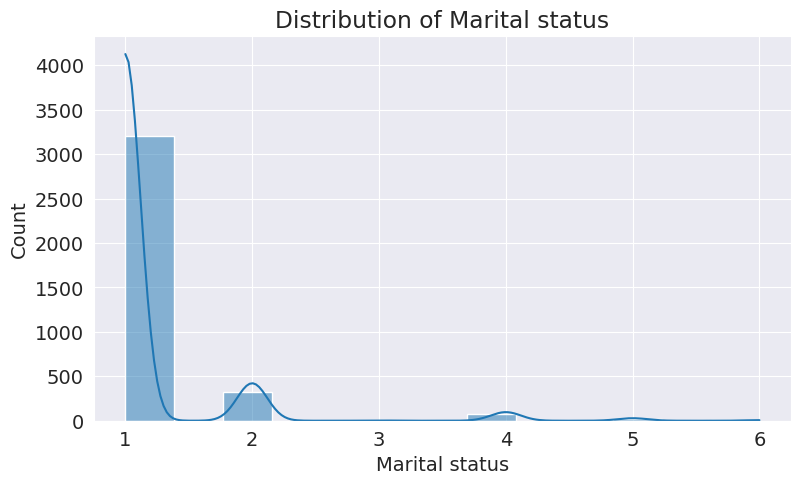

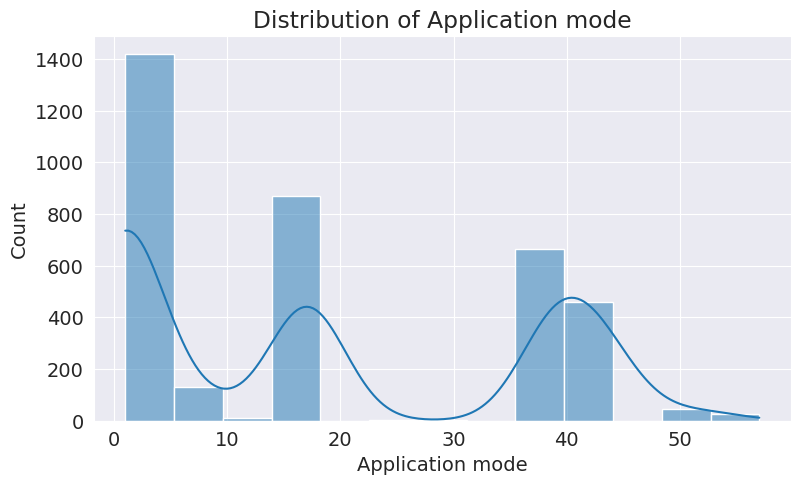

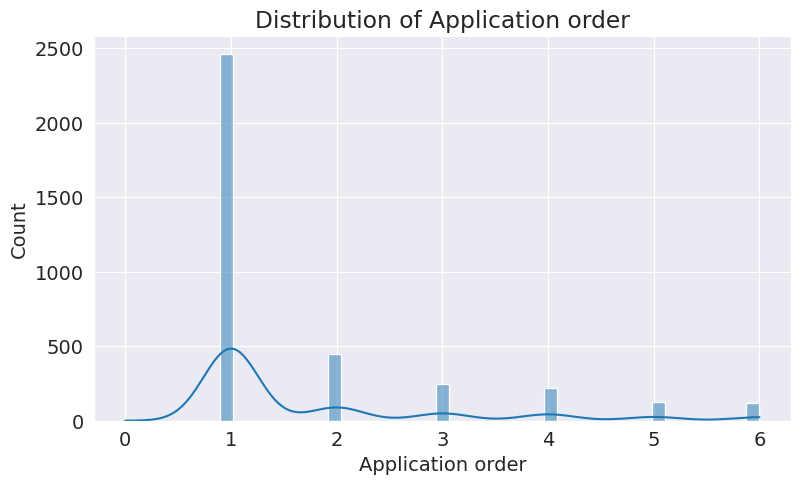

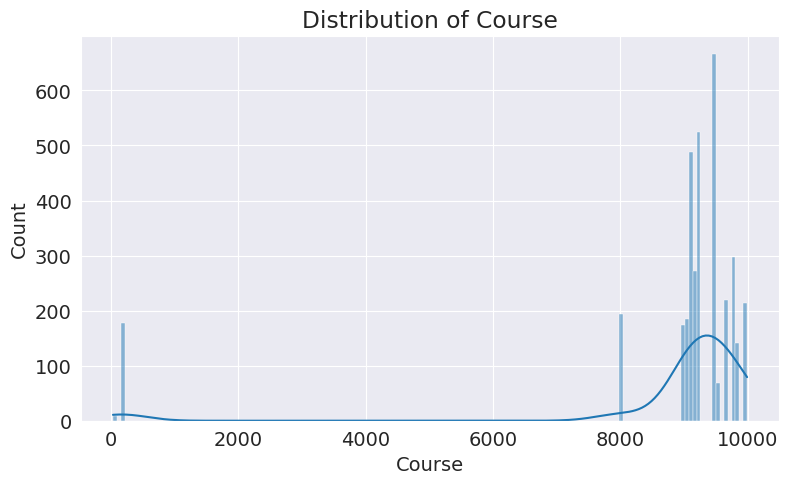

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



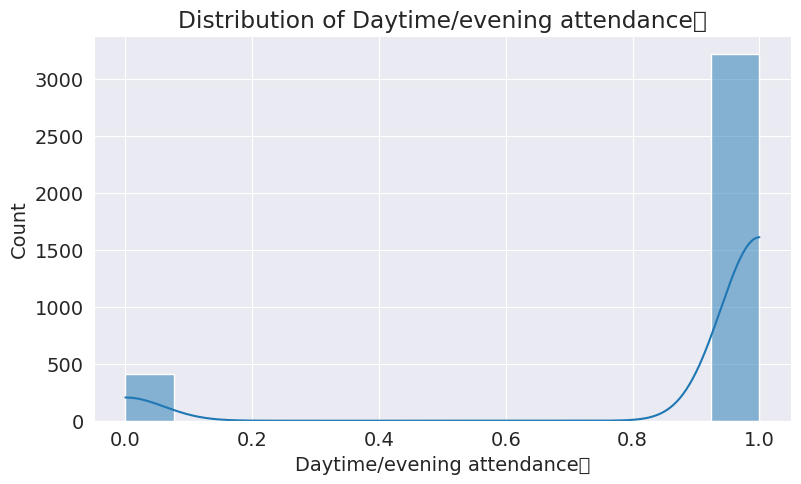

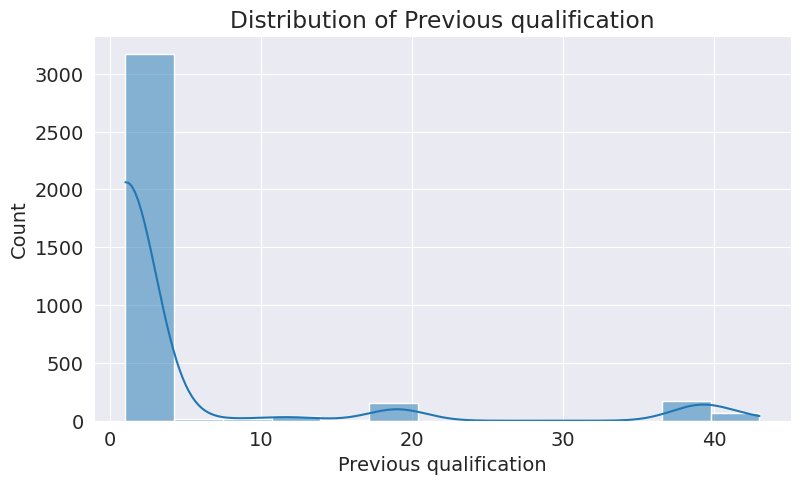

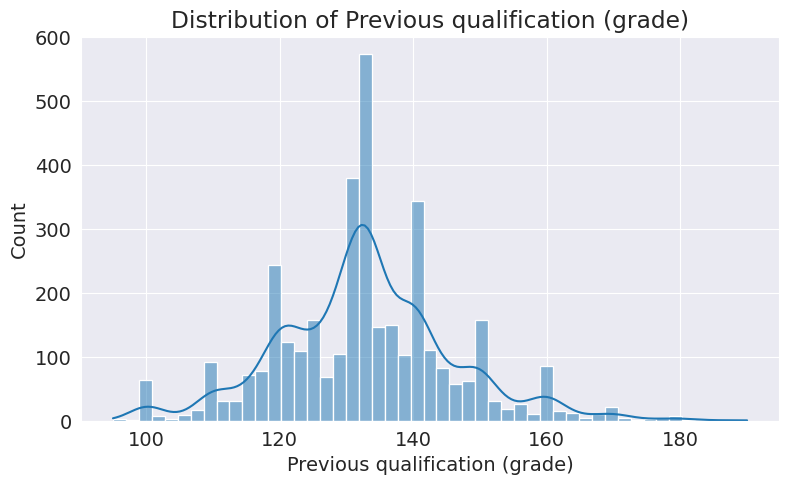

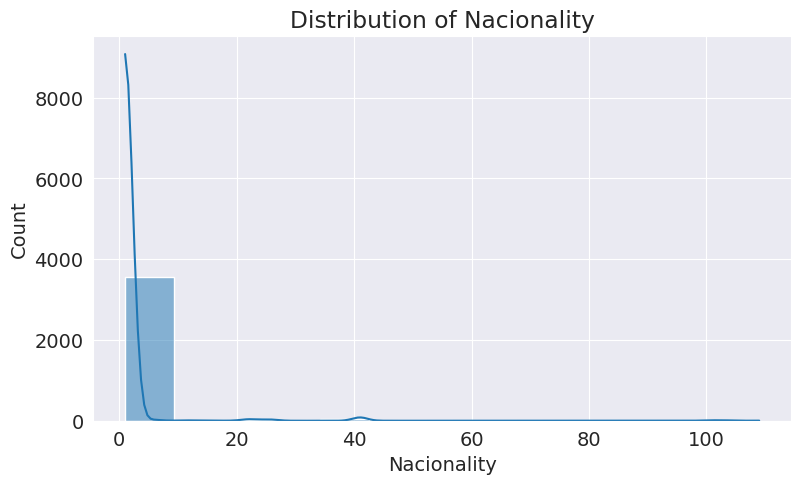

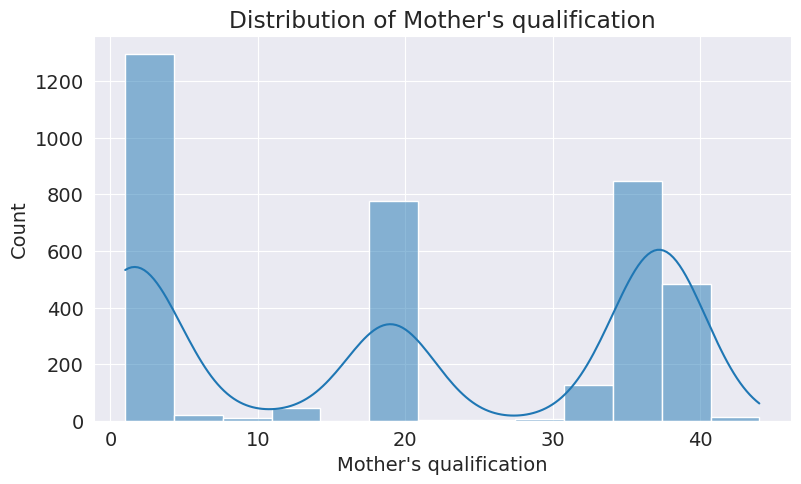

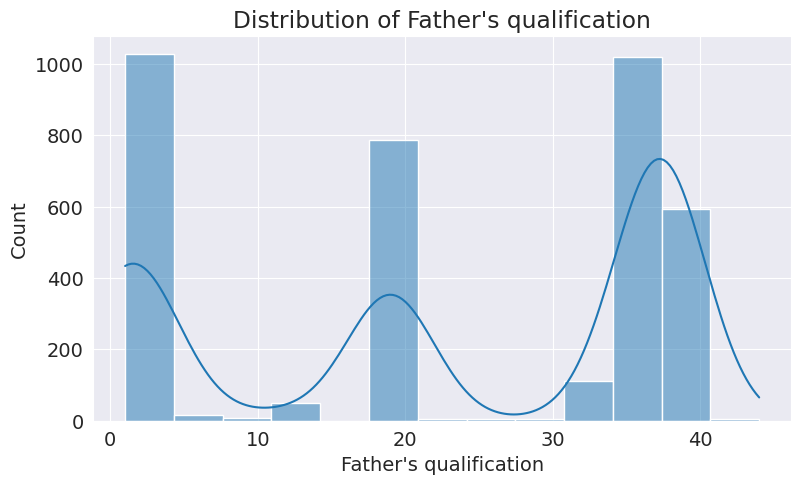

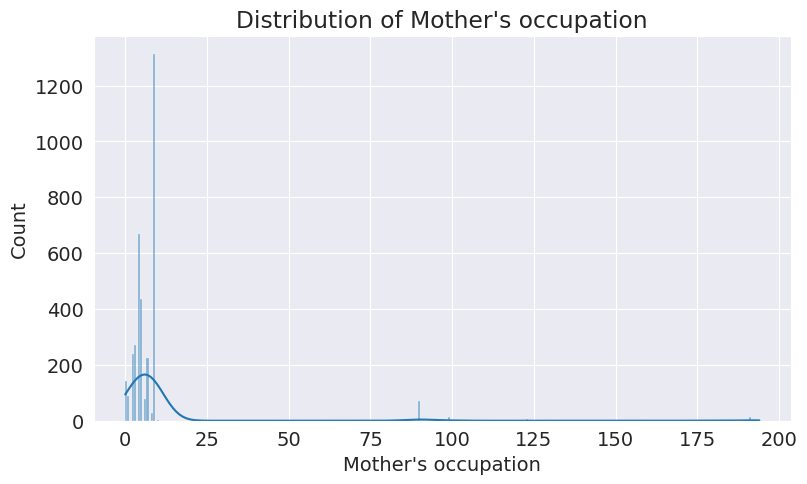

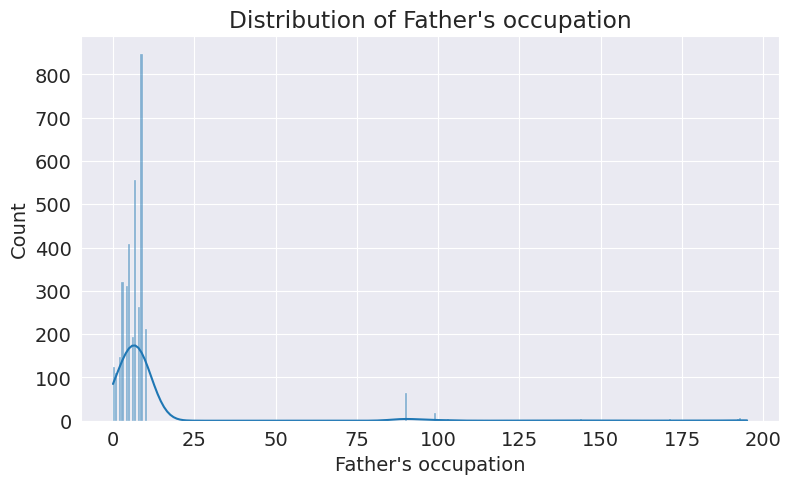

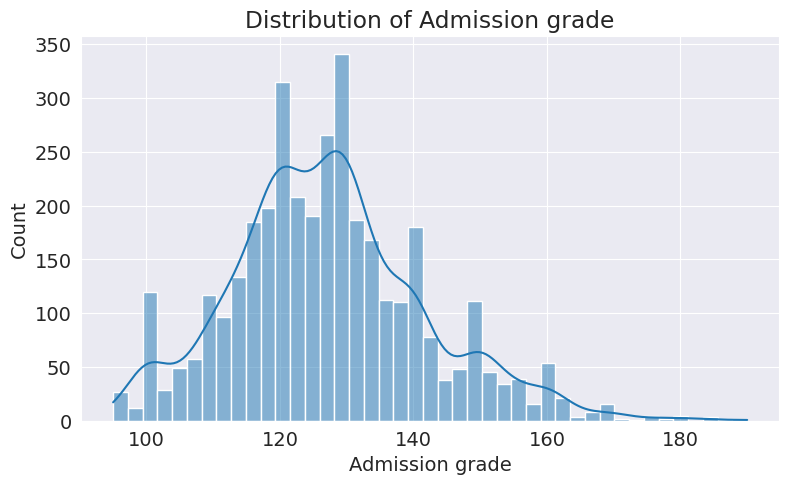

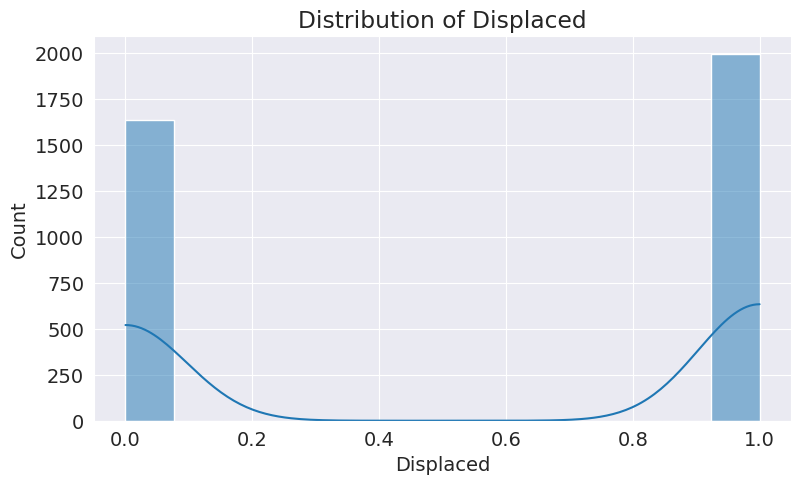

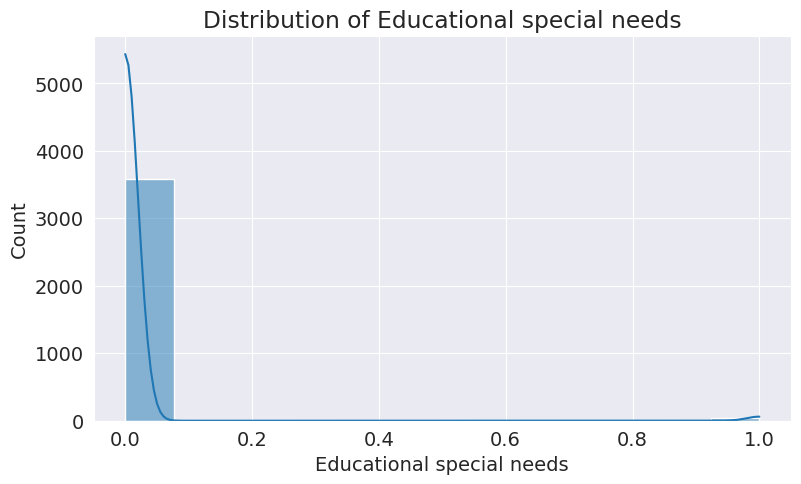

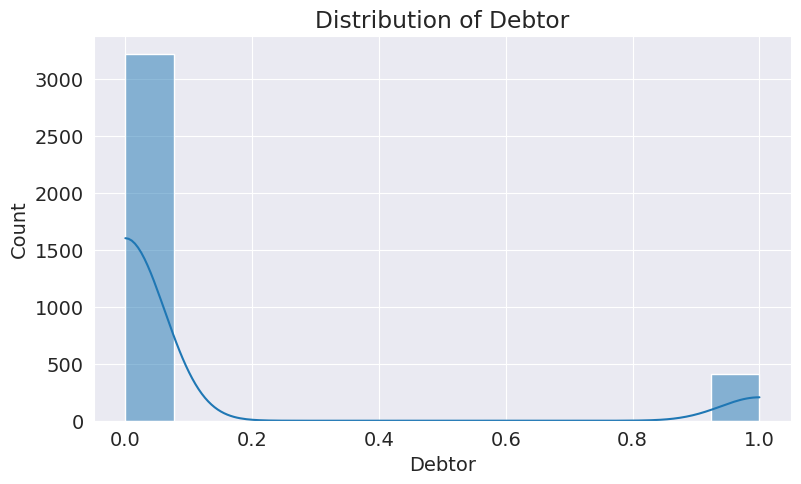

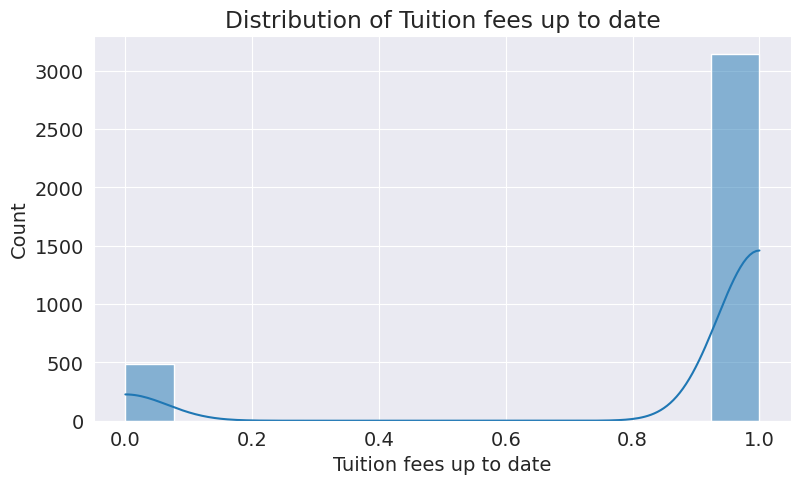

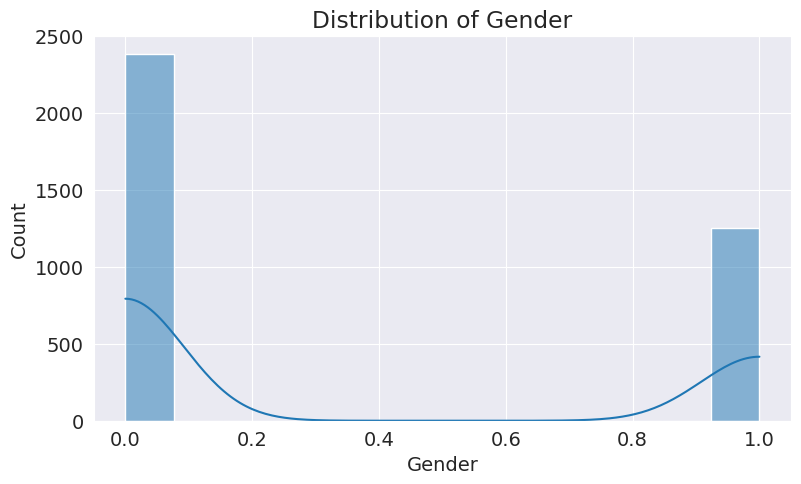

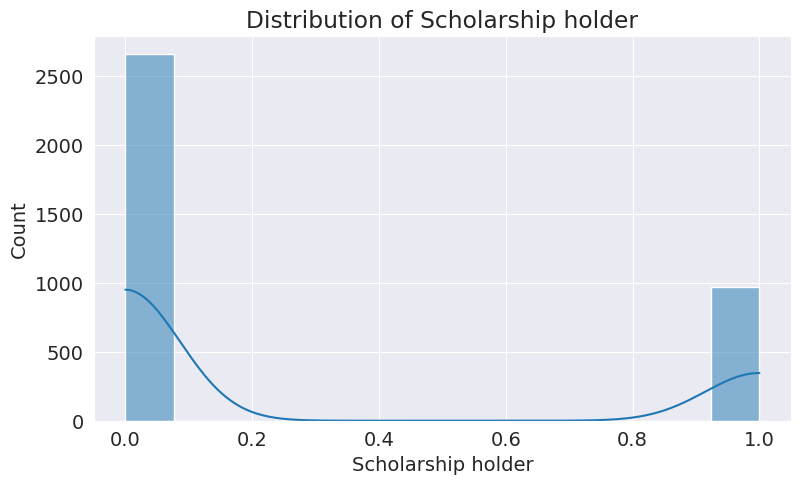

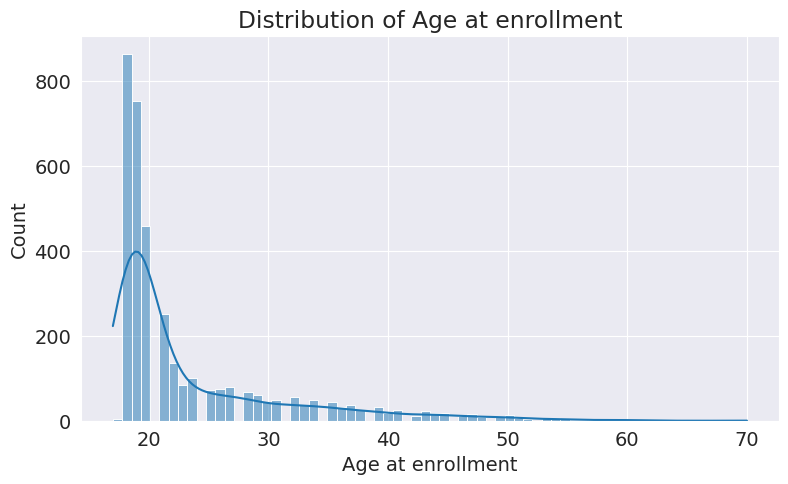

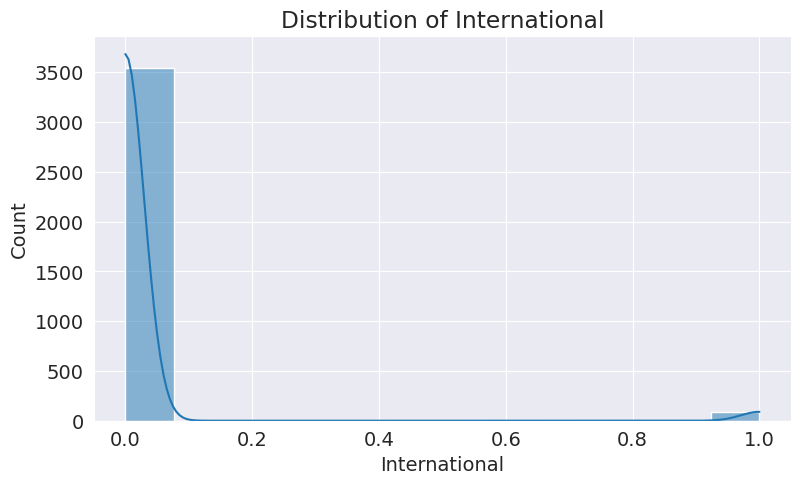

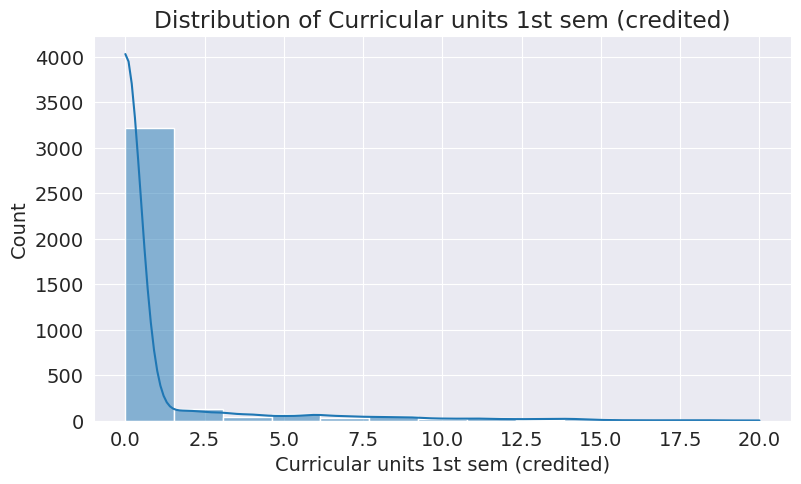

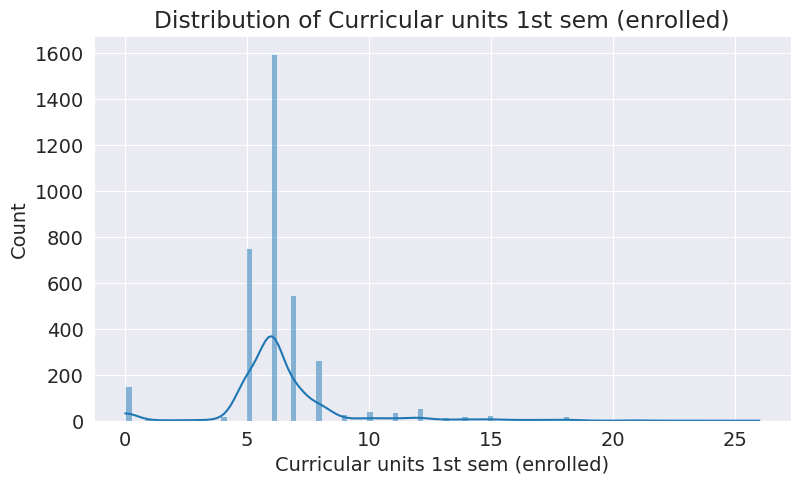

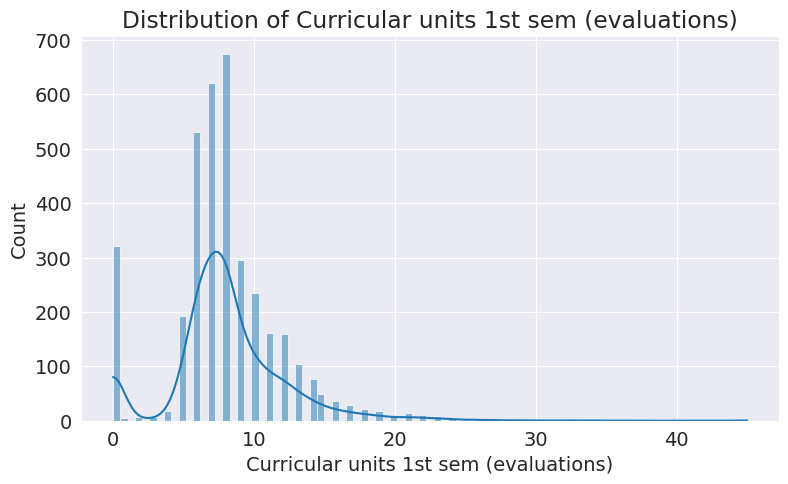

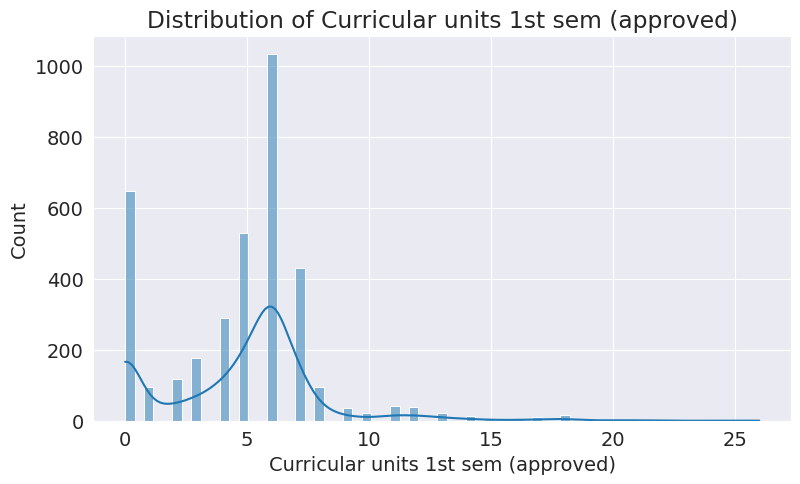

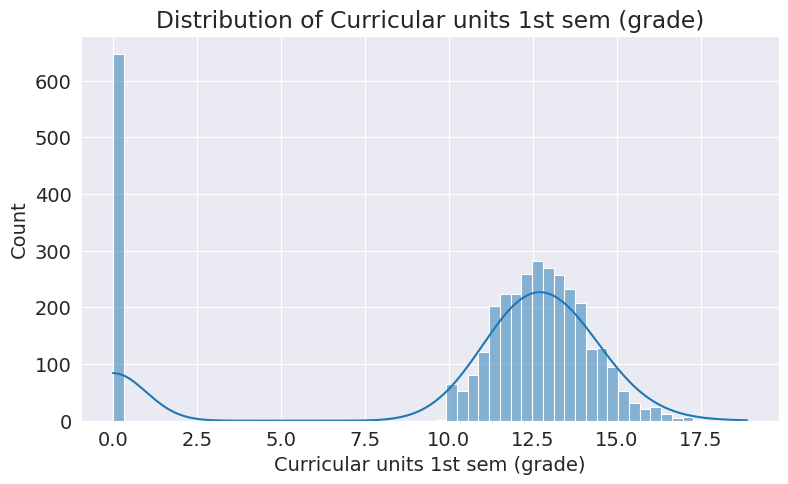

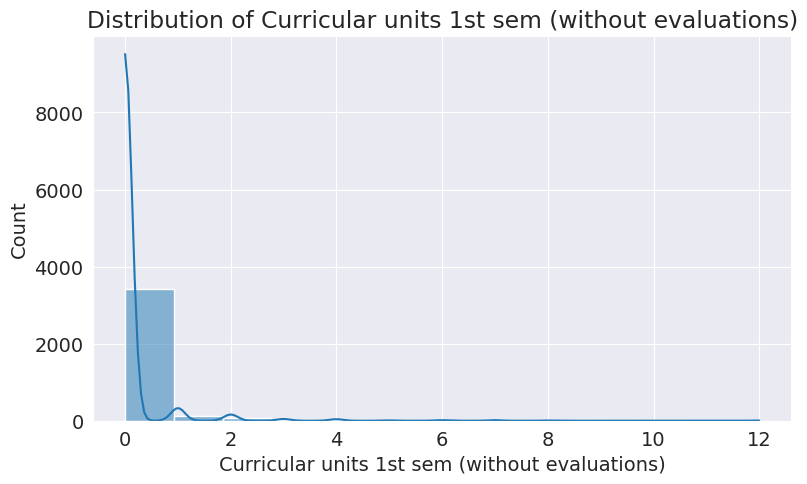

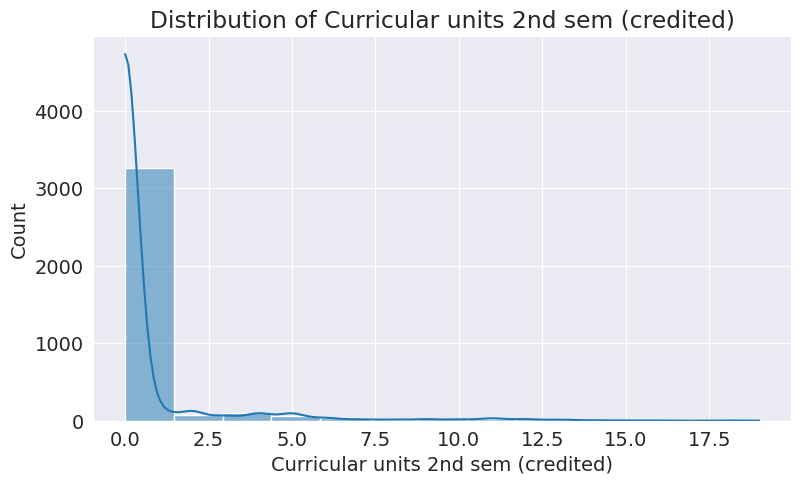

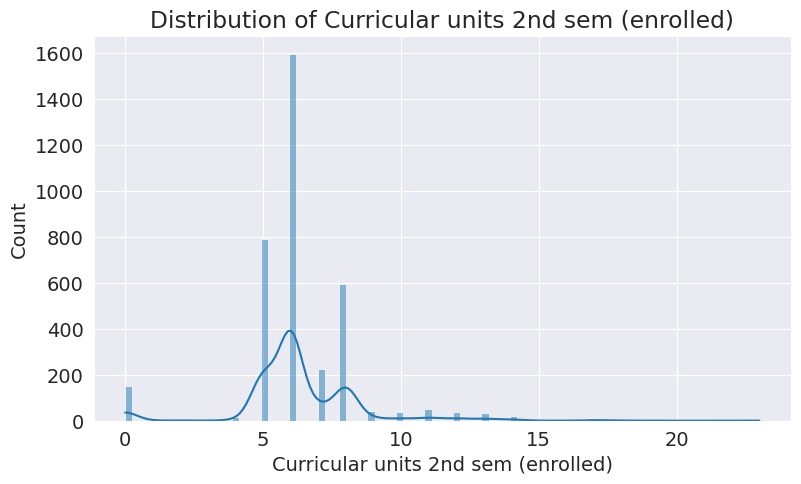

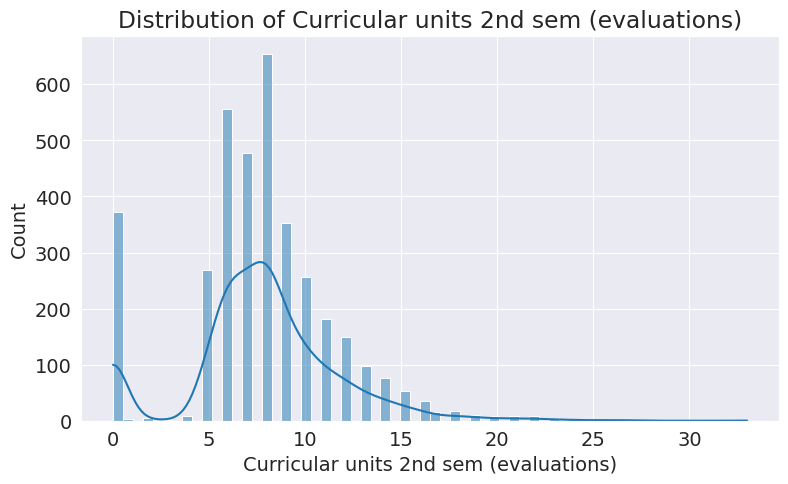

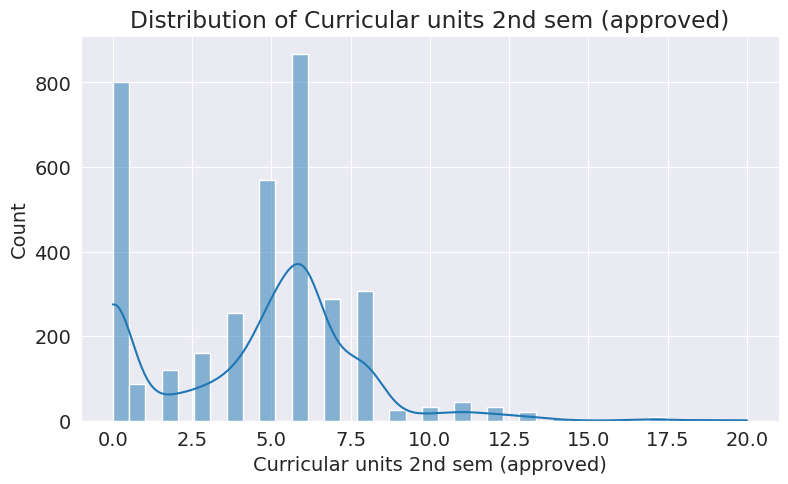

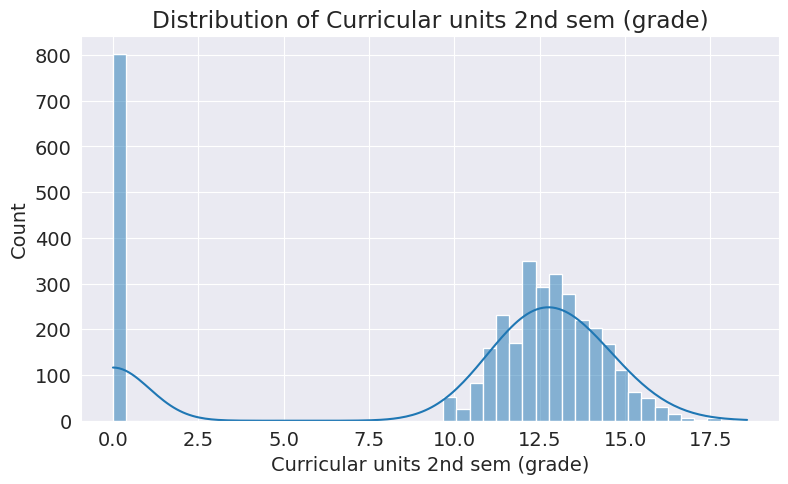

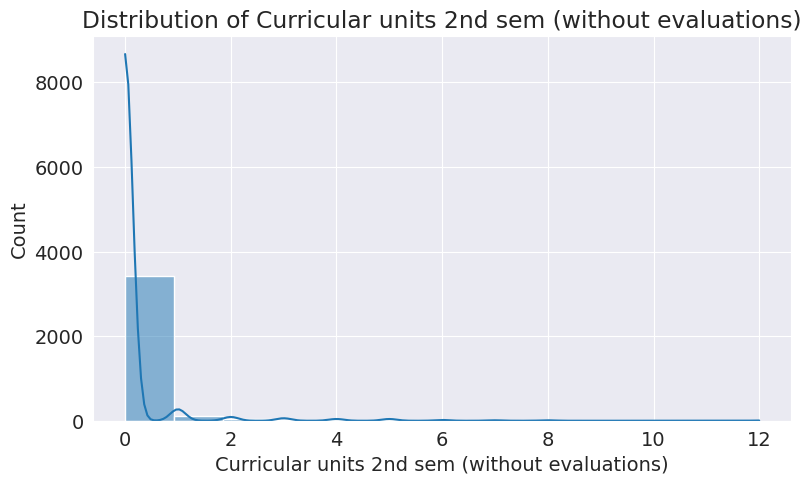

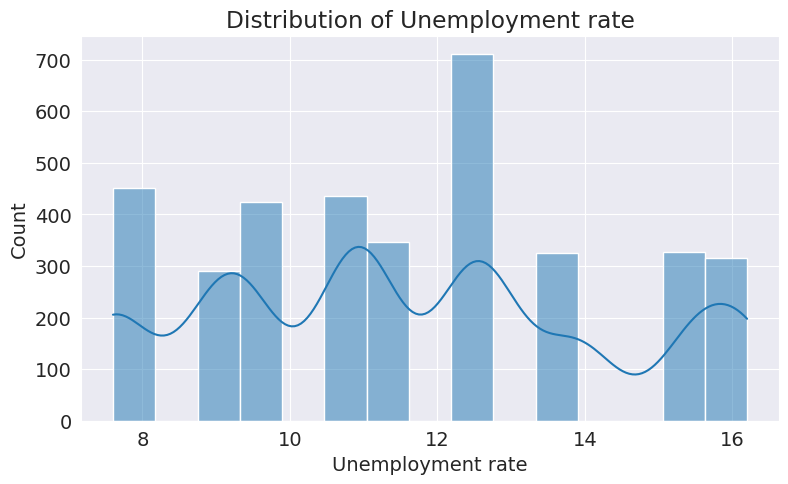

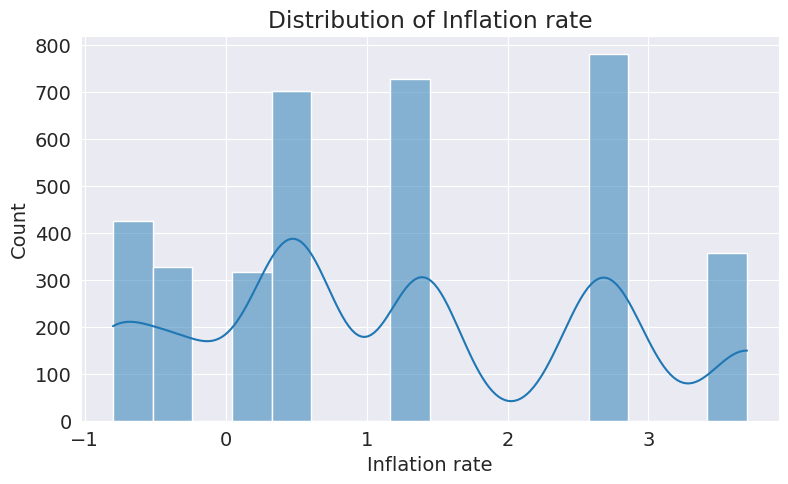

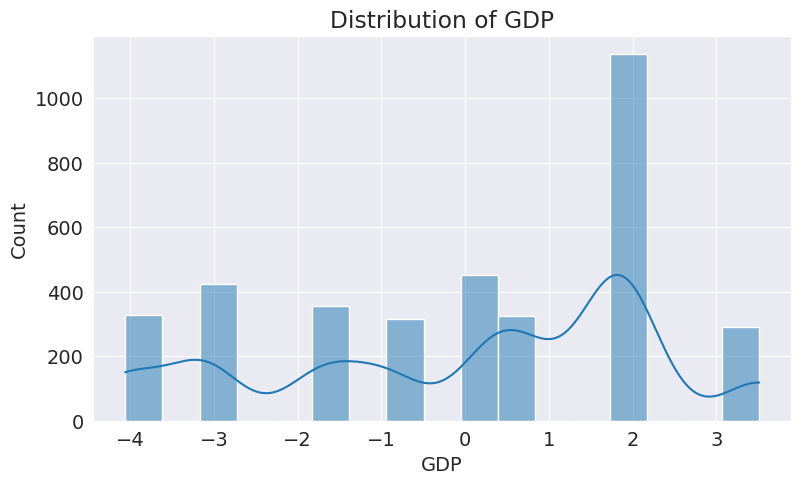

In [ ]:
# Visualize the distribution of numerical features
numerical_features = dropout_df.select_dtypes(include=['number']).columns

for feature in numerical_features:
  plt.figure()
  sns.histplot(dropout_df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()


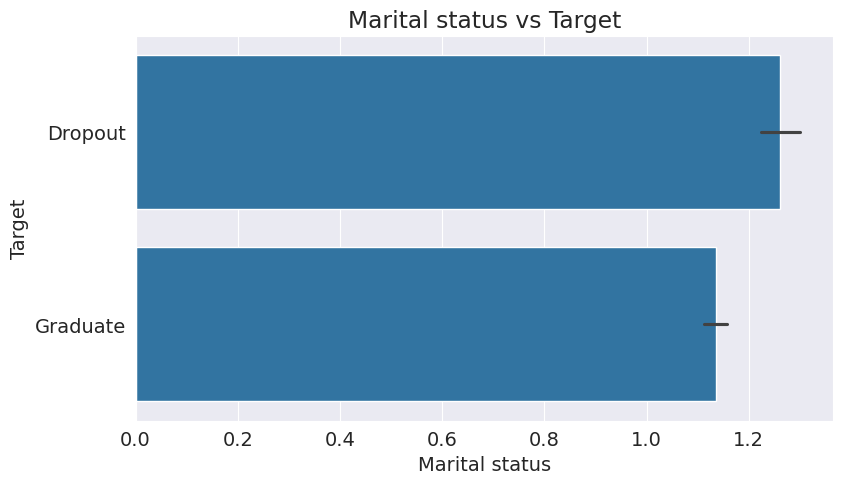

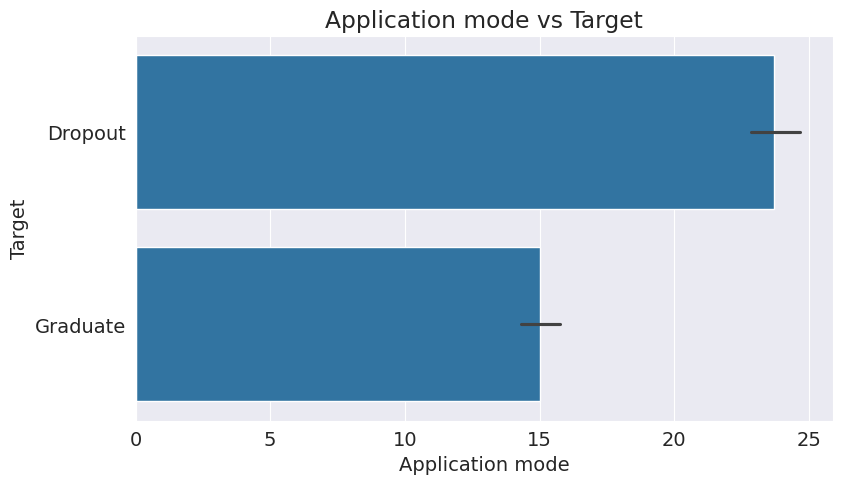

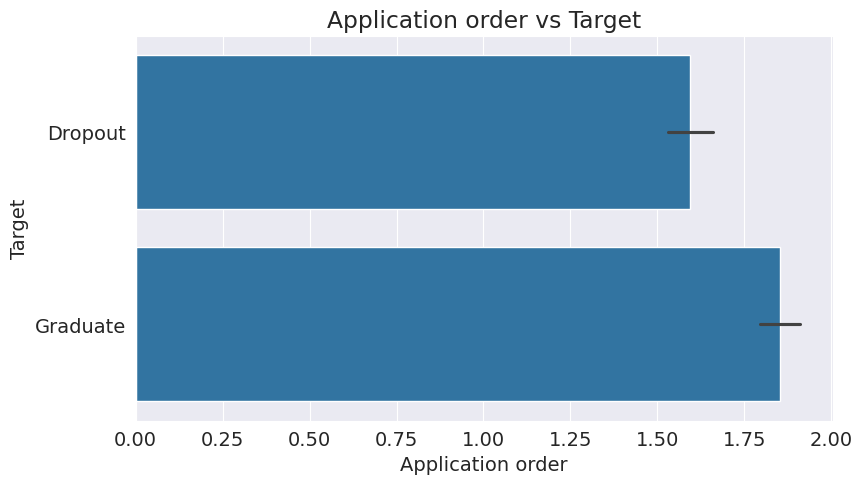

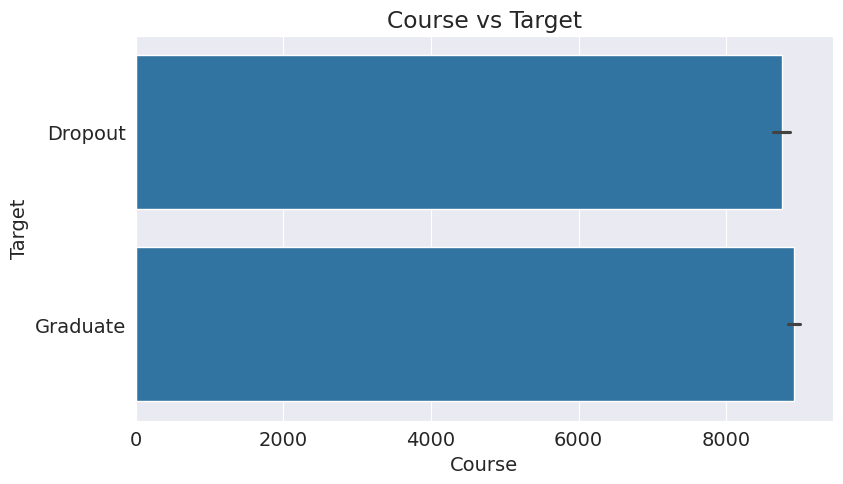

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



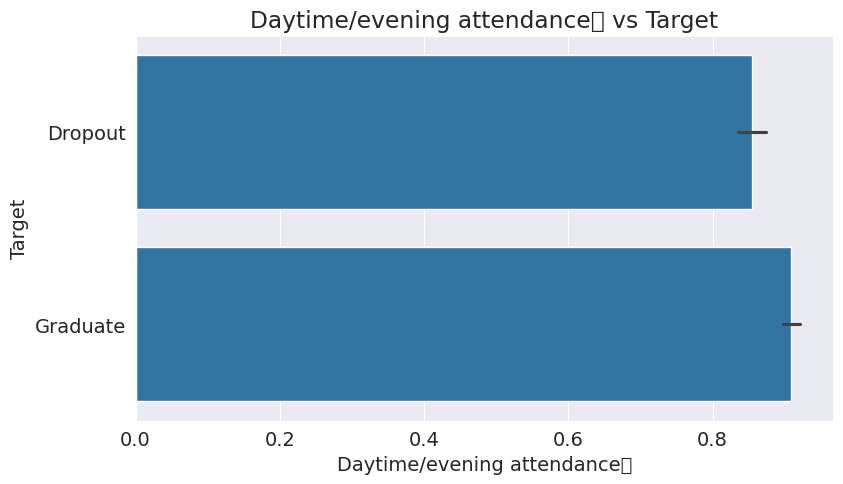

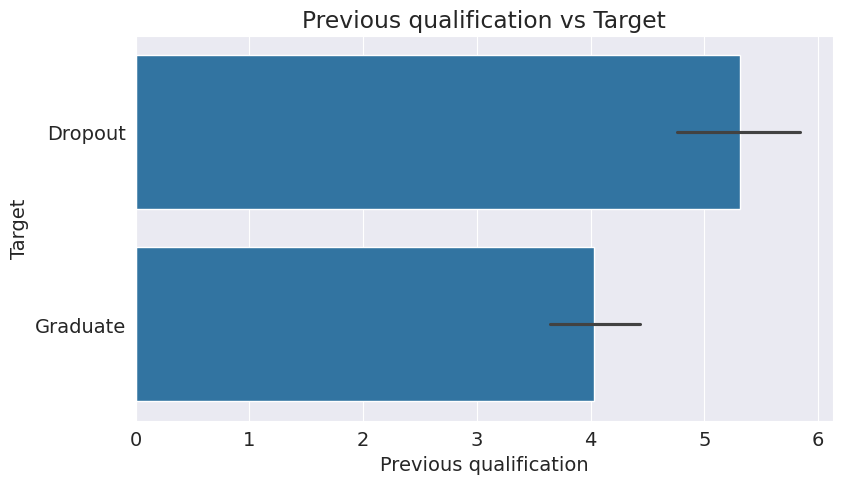

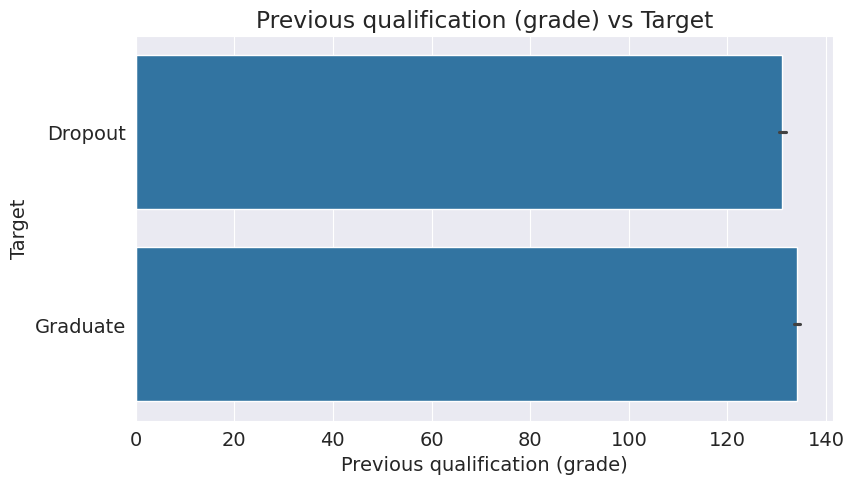

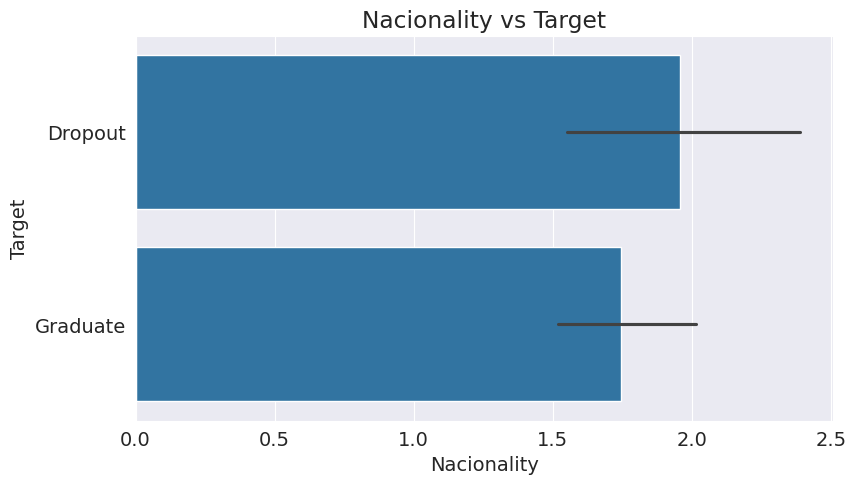

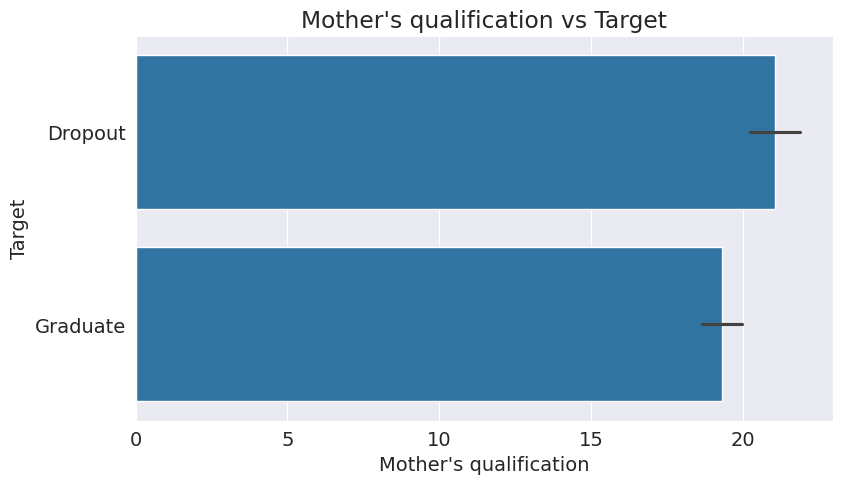

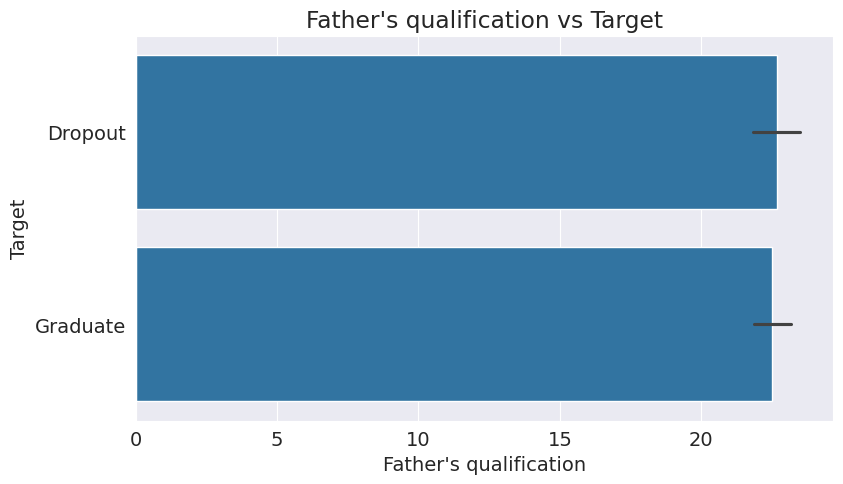

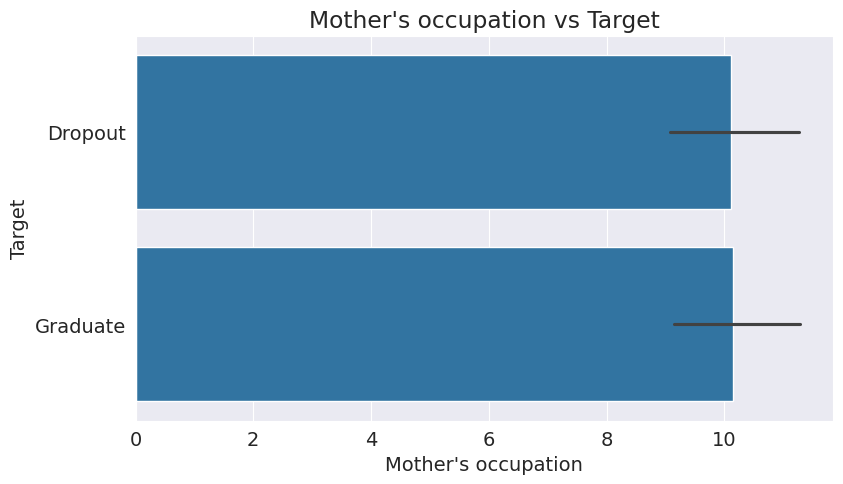

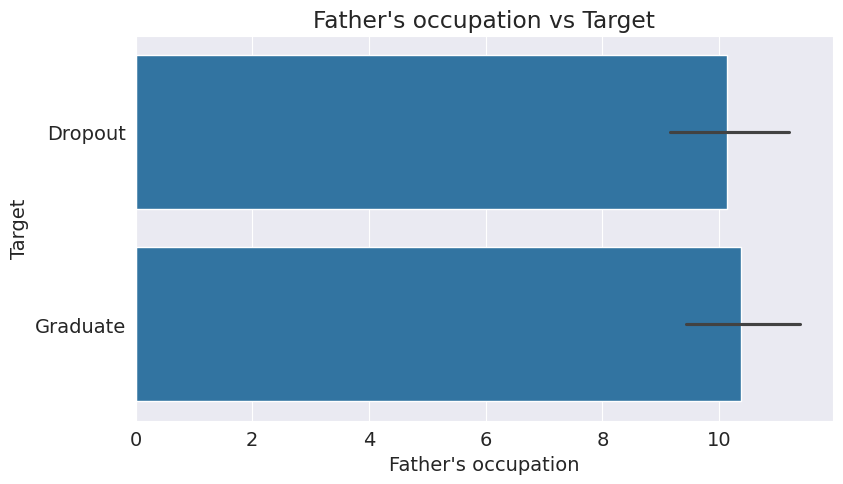

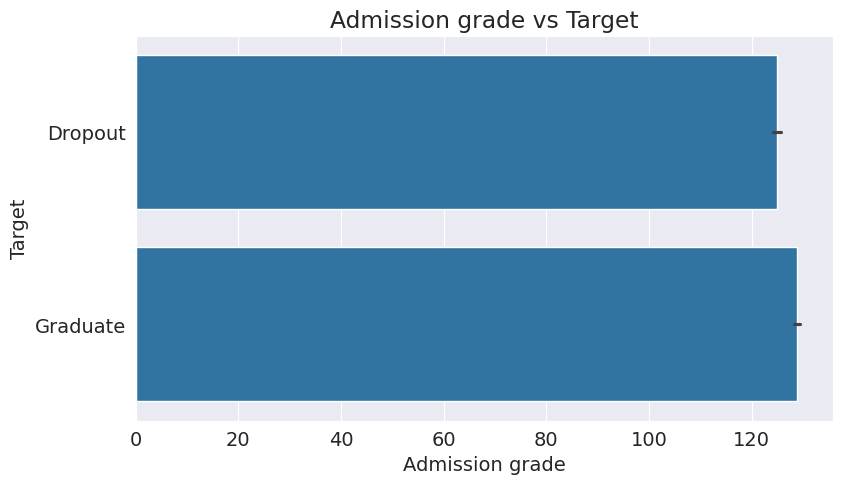

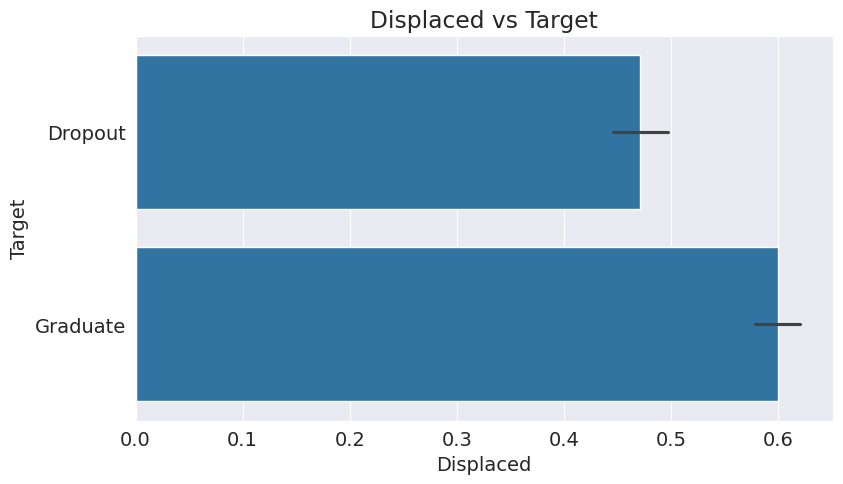

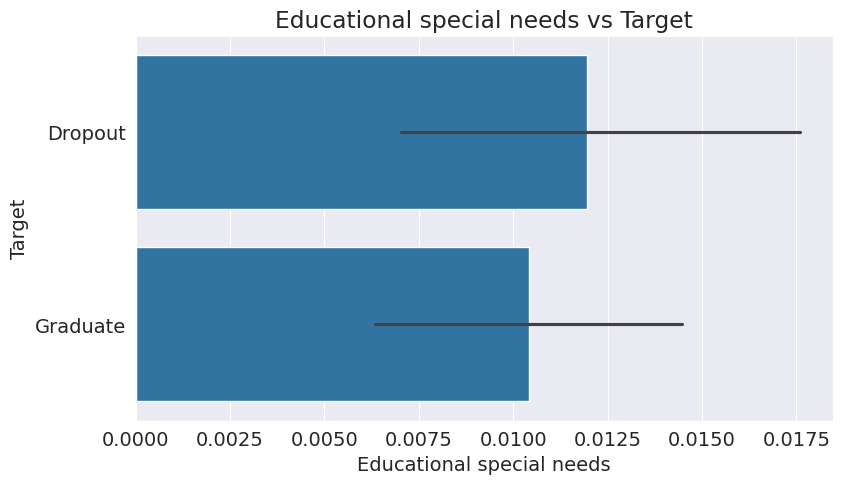

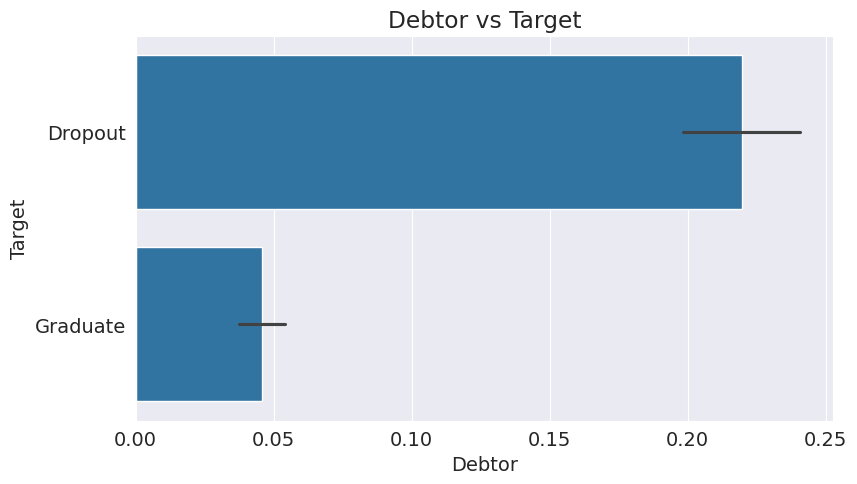

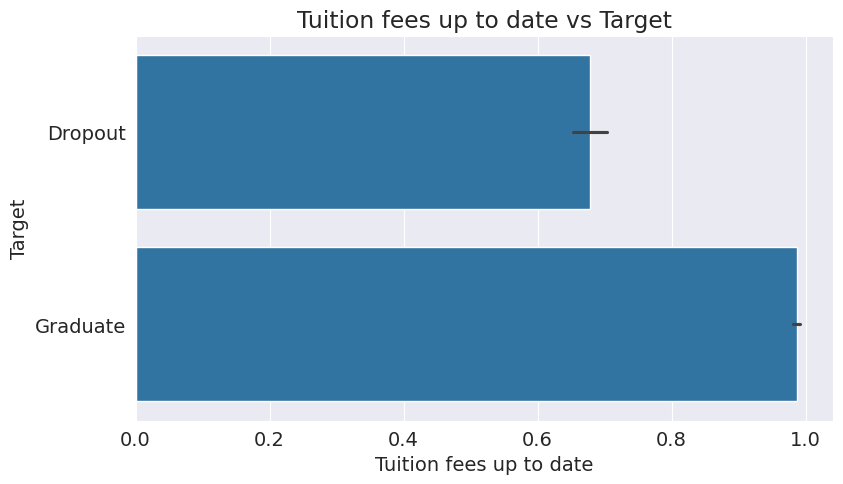

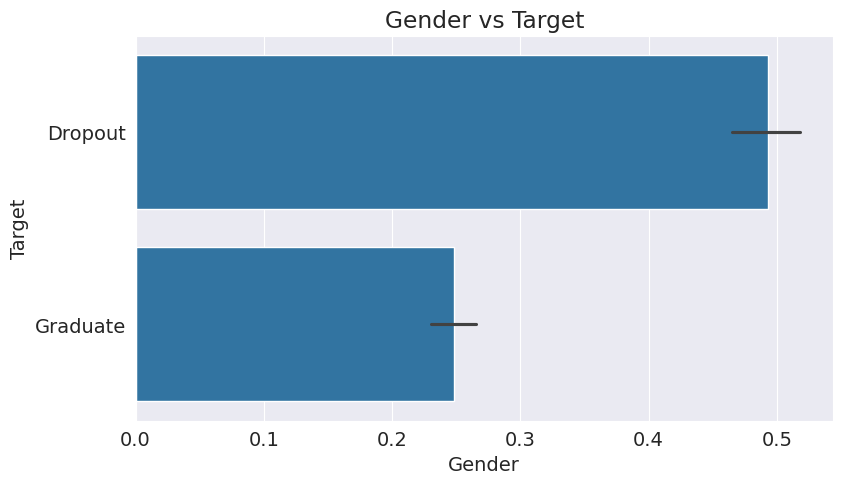

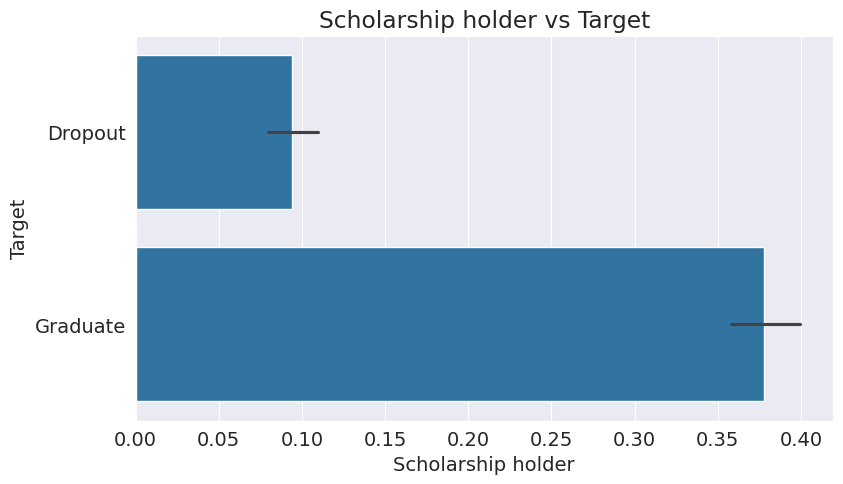

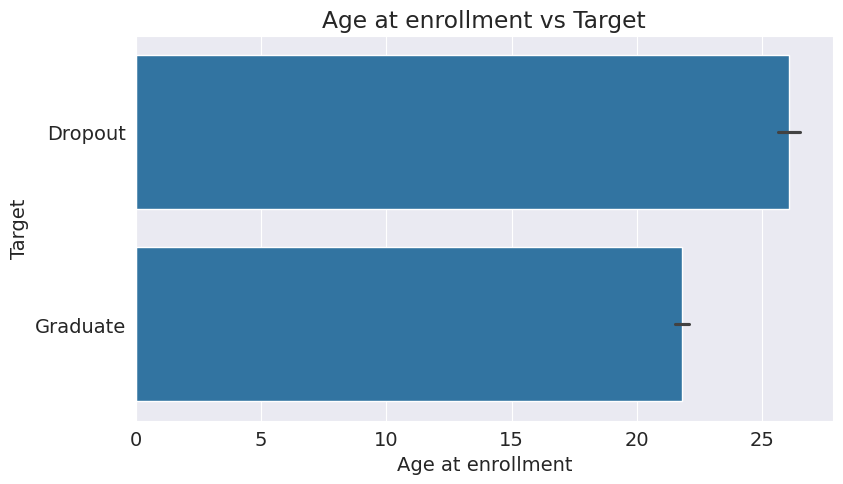

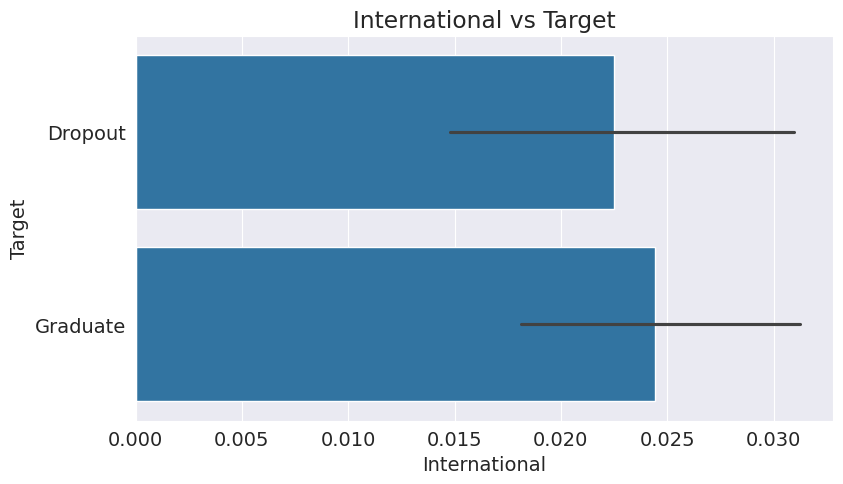

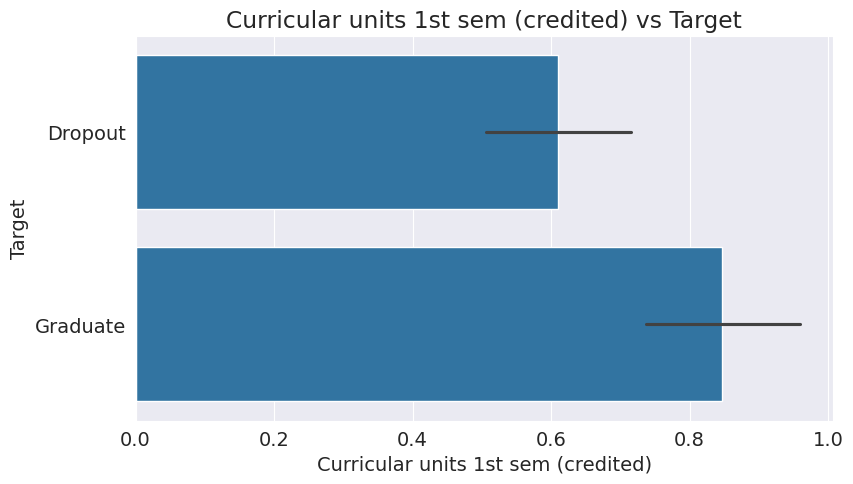

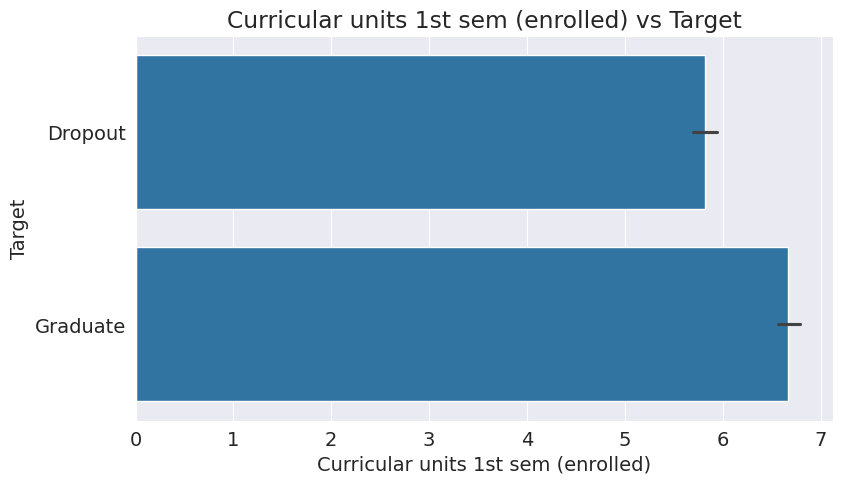

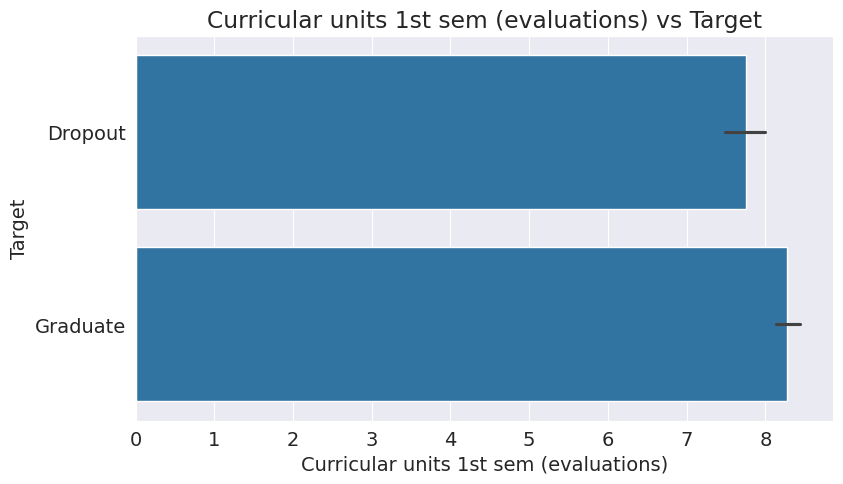

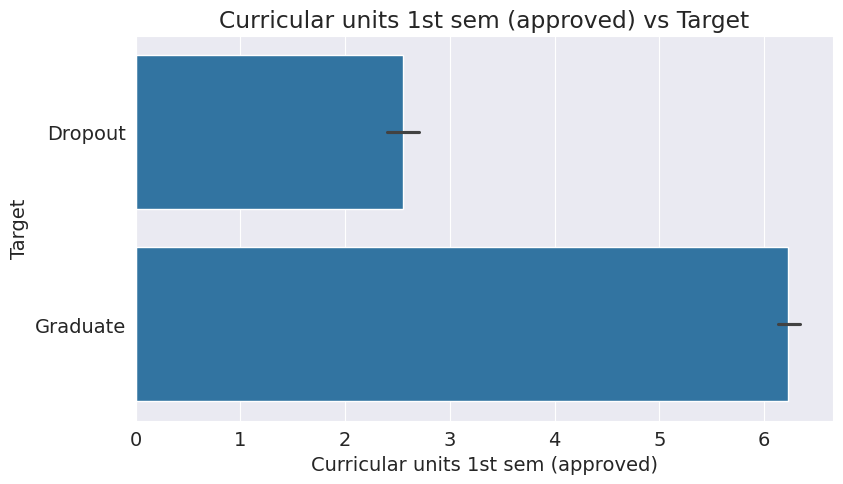

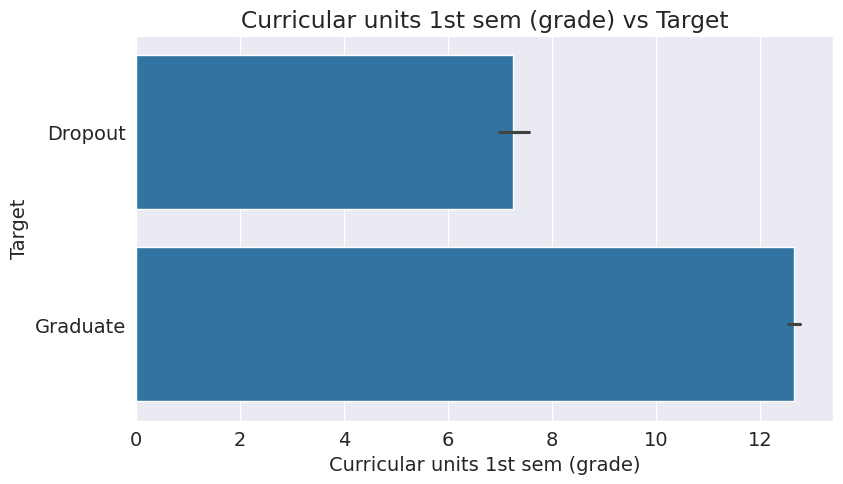

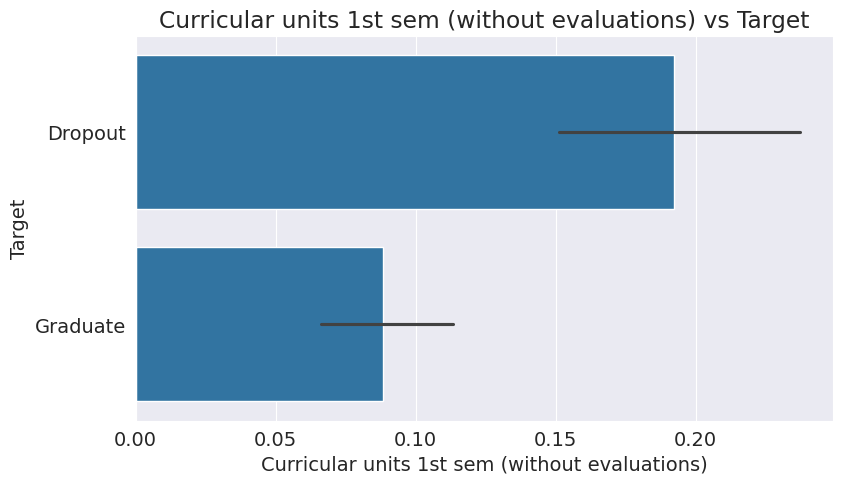

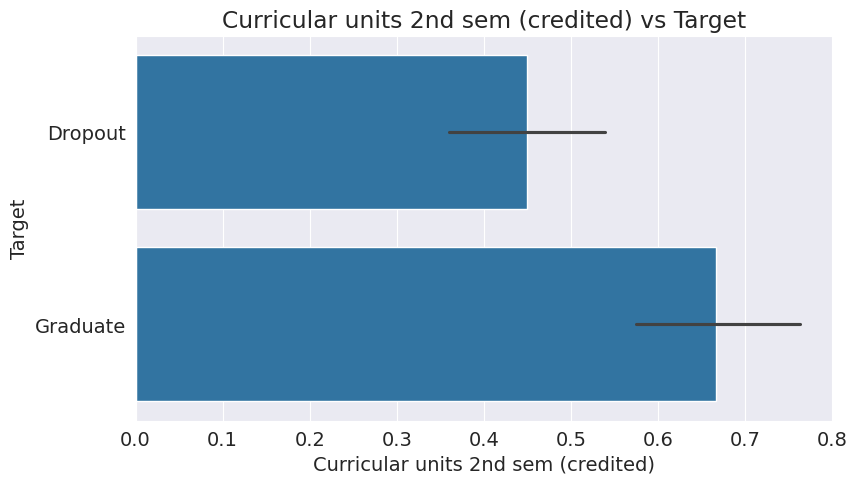

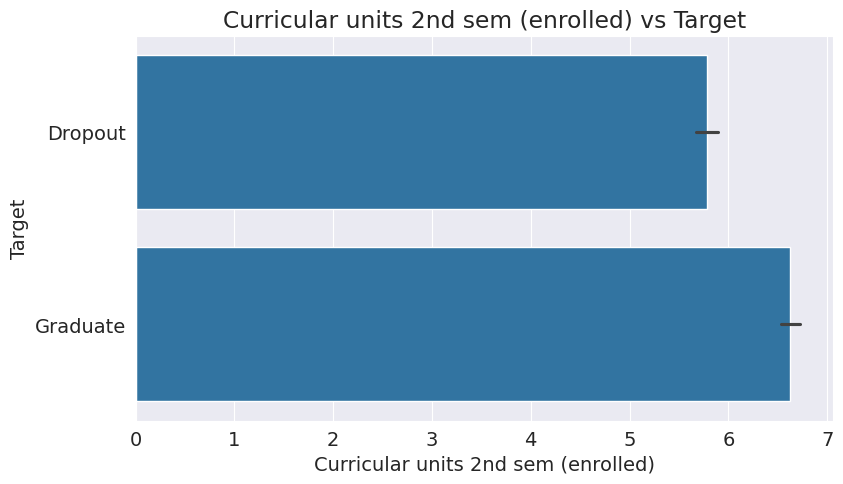

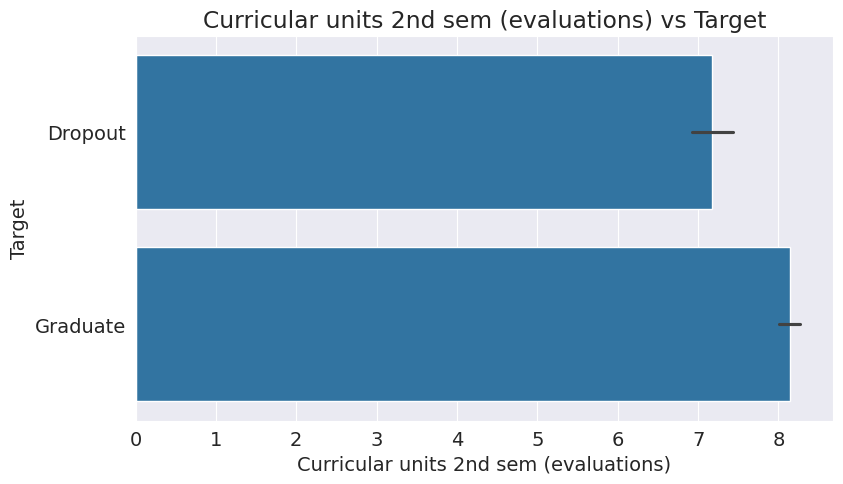

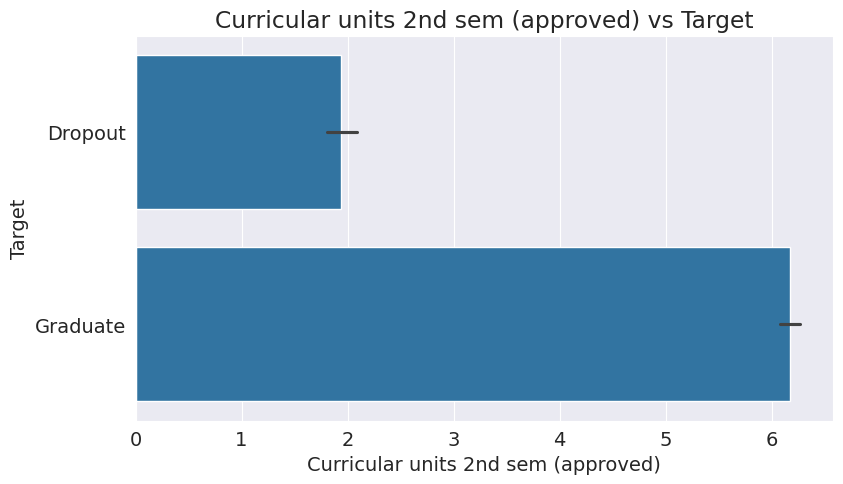

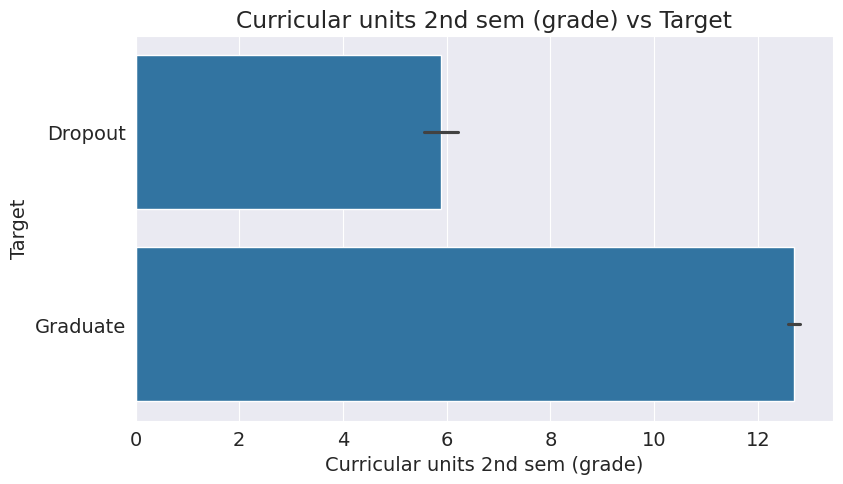

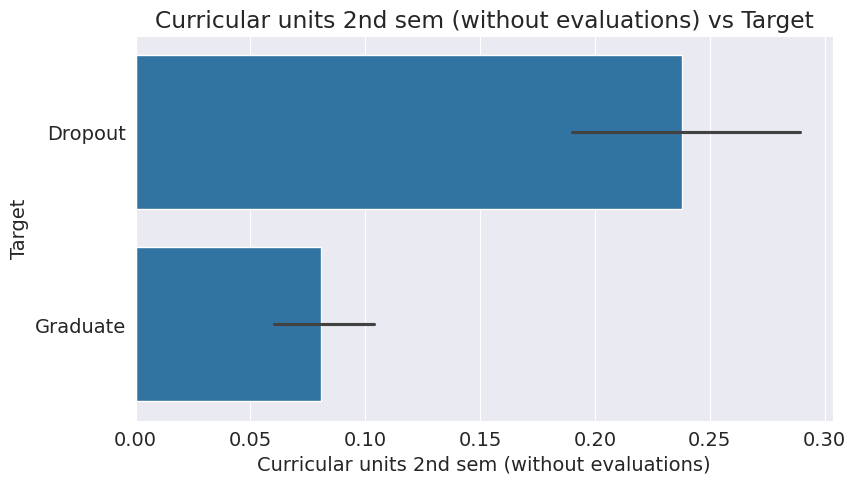

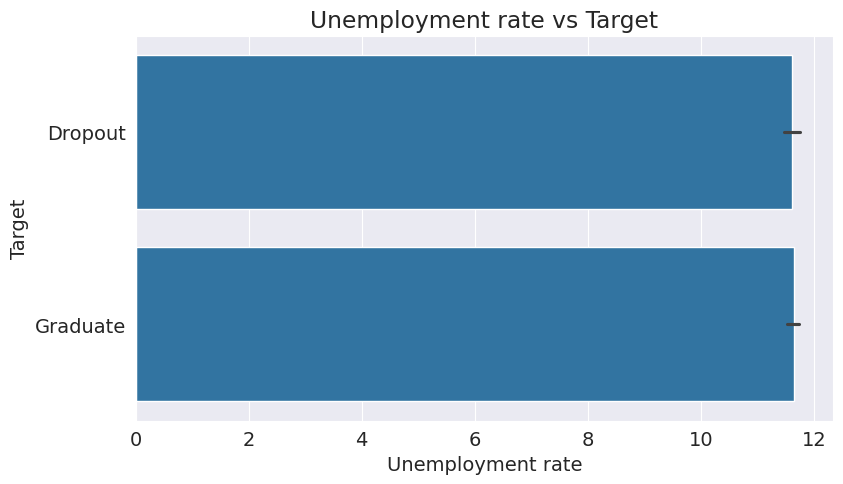

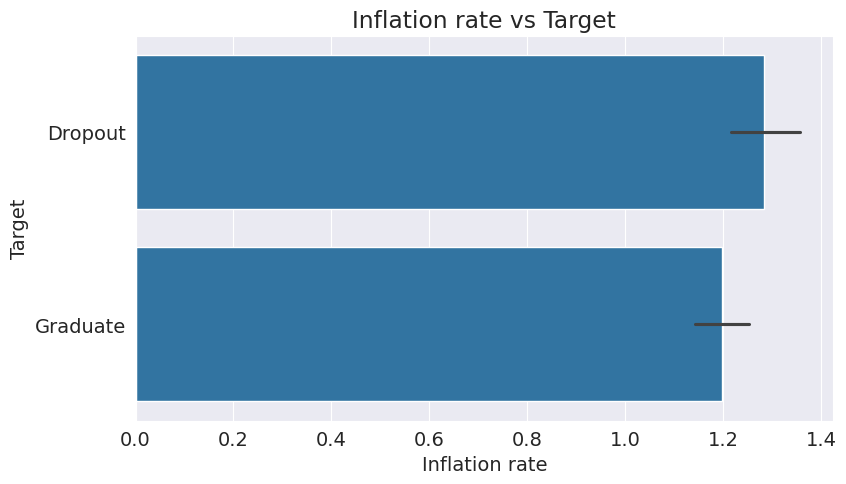

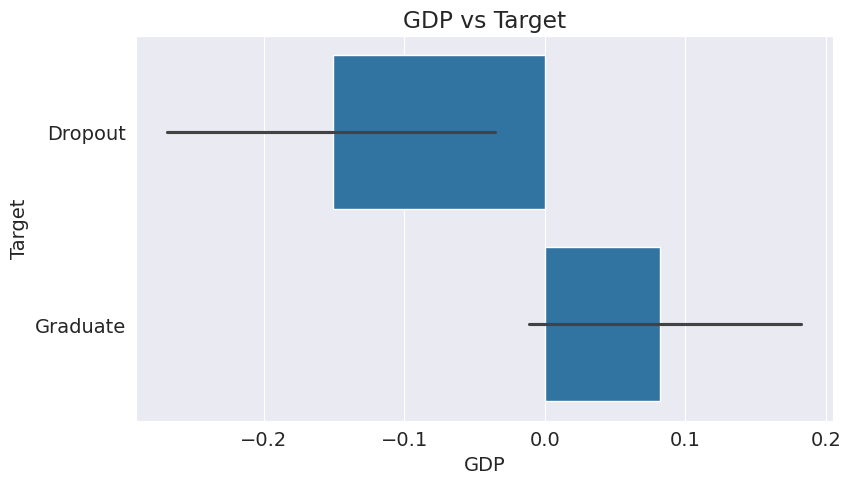

In [ ]:
# Visualize the relationship between numerical features and the target variable
for feature in numerical_features:
  plt.figure()
  sns.barplot(x=feature, y='Target', data=dropout_df)
  plt.title(f'{feature} vs Target')
  plt.show()

In [ ]:
for feature in numerical_features:
  fig = px.histogram(dropout_df, x= feature, color = 'Target', color_discrete_sequence=['#f68c4e', '#065b92'], title=f'Target Distribution on {feature}')
  fig.update_layout(bargap=0.1)
  fig.show()

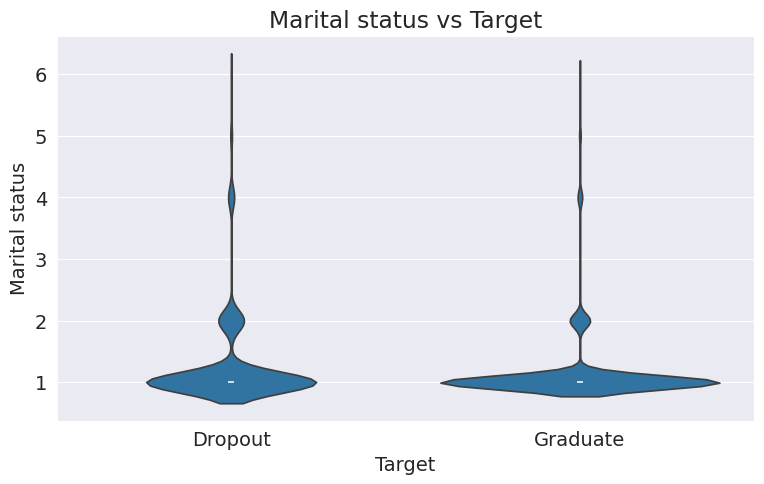

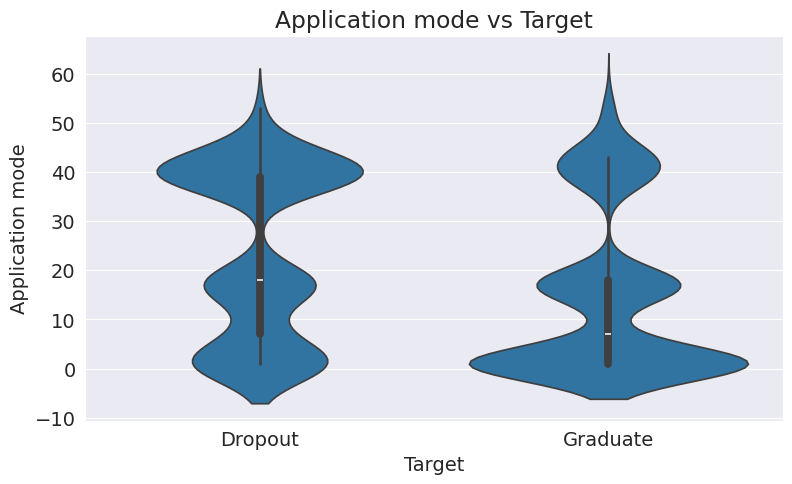

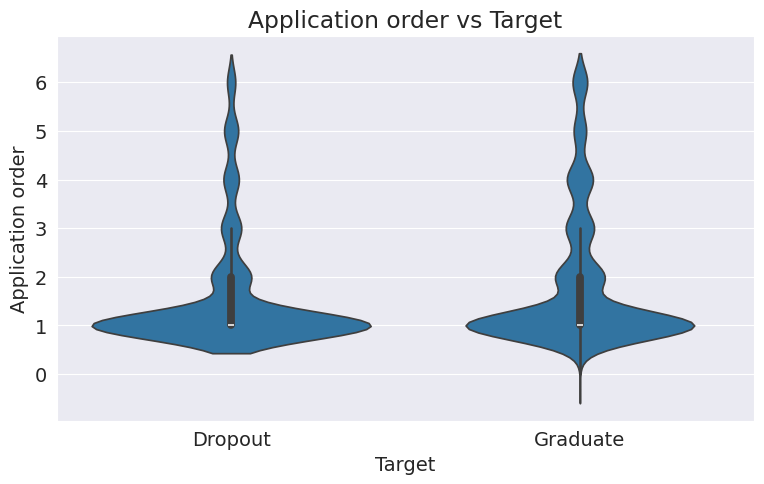

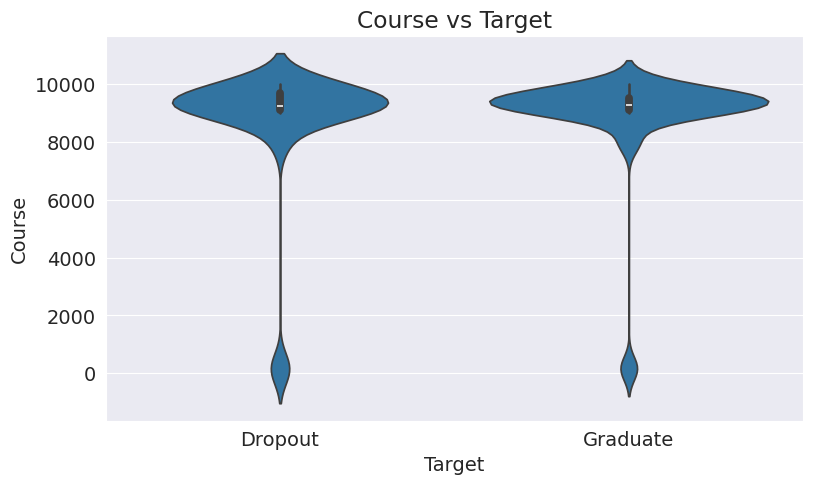

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



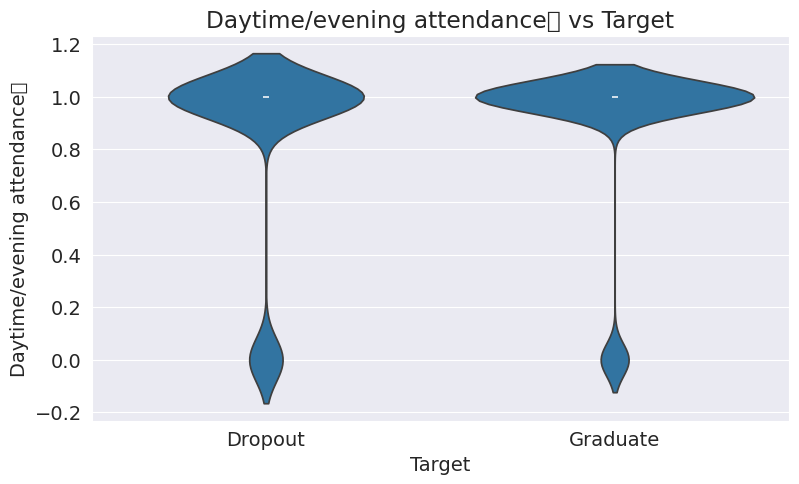

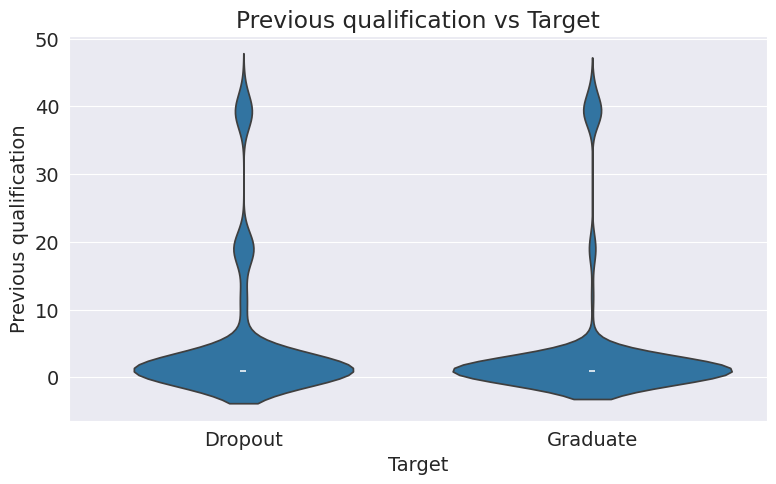

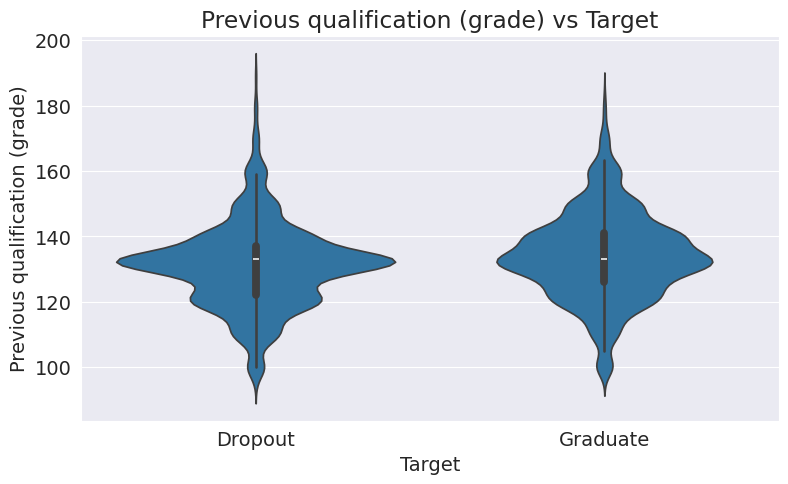

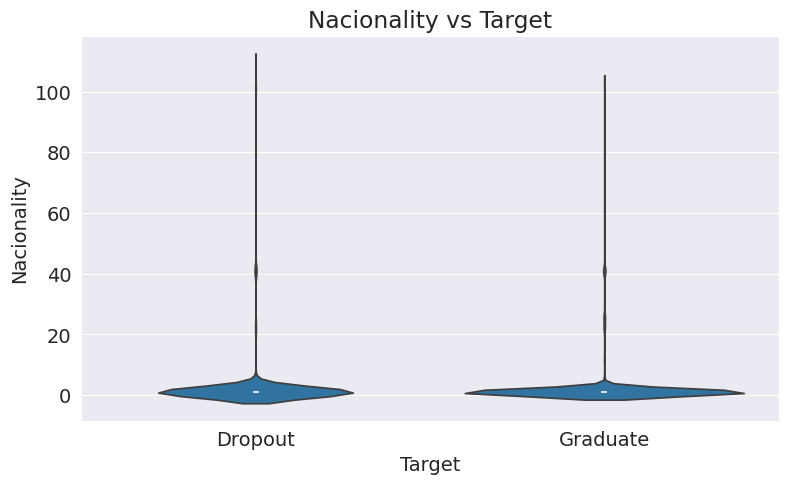

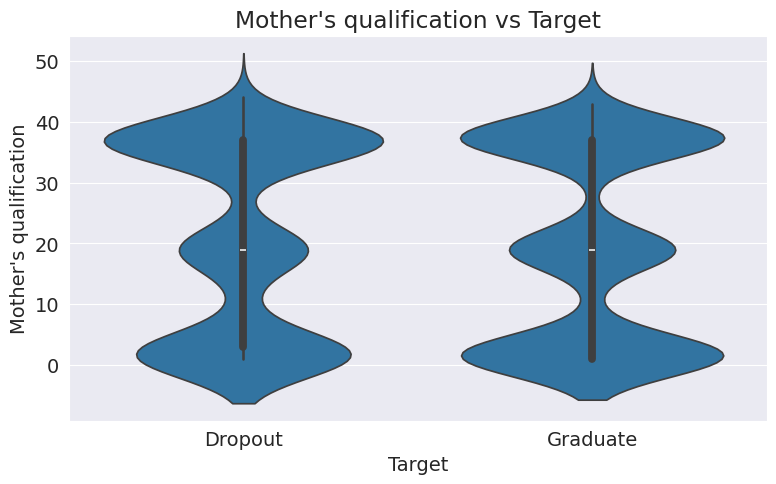

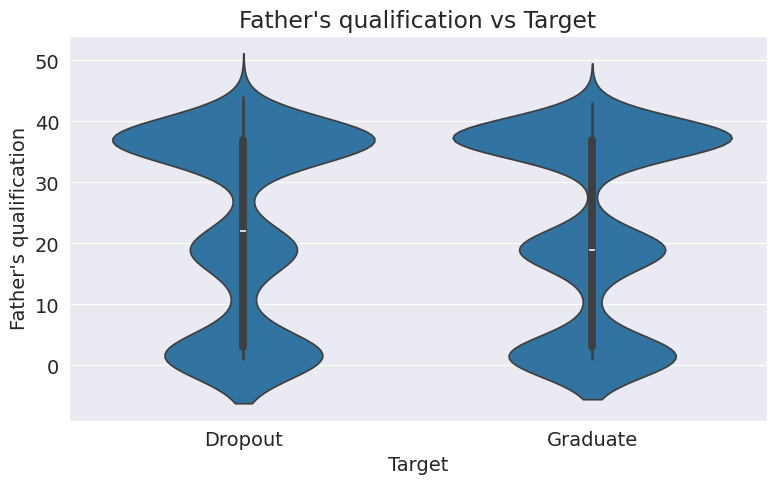

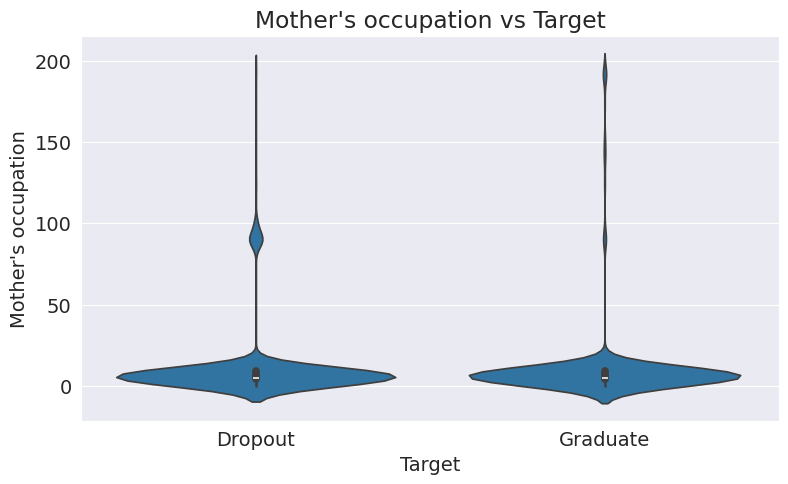

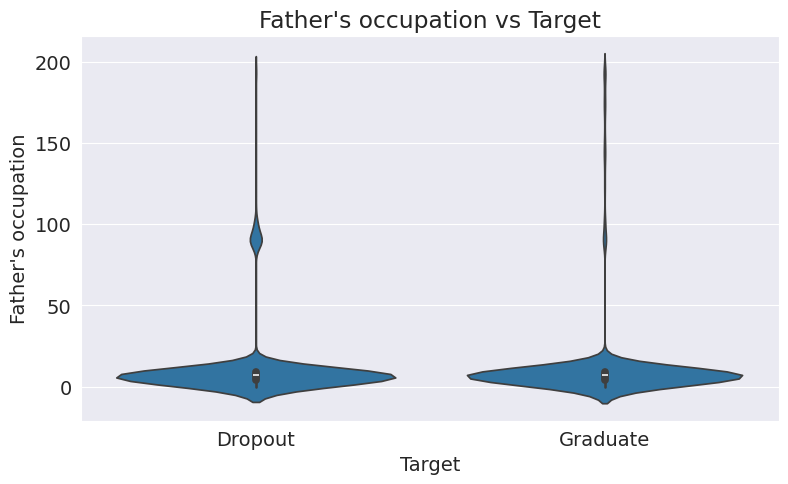

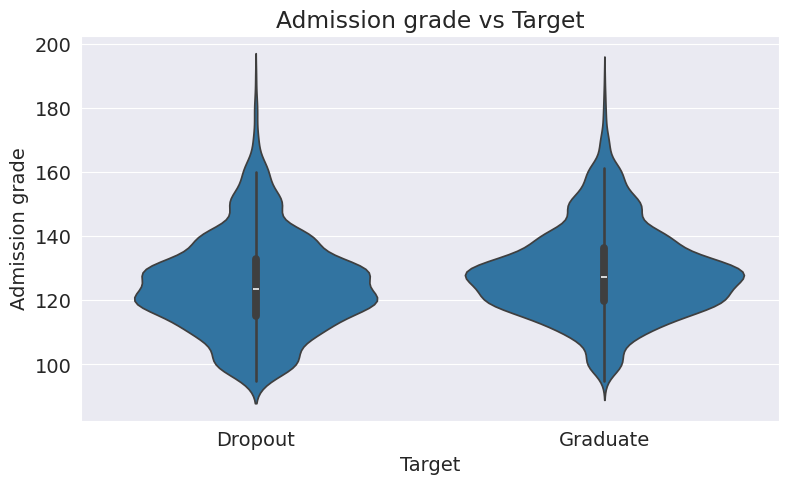

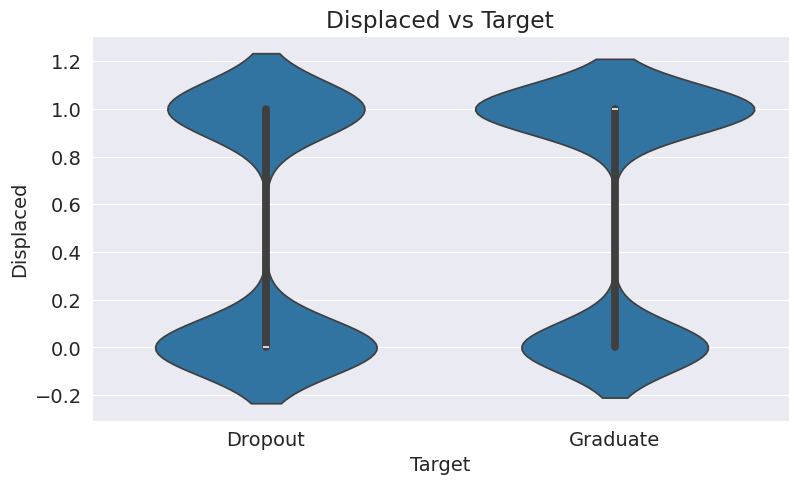

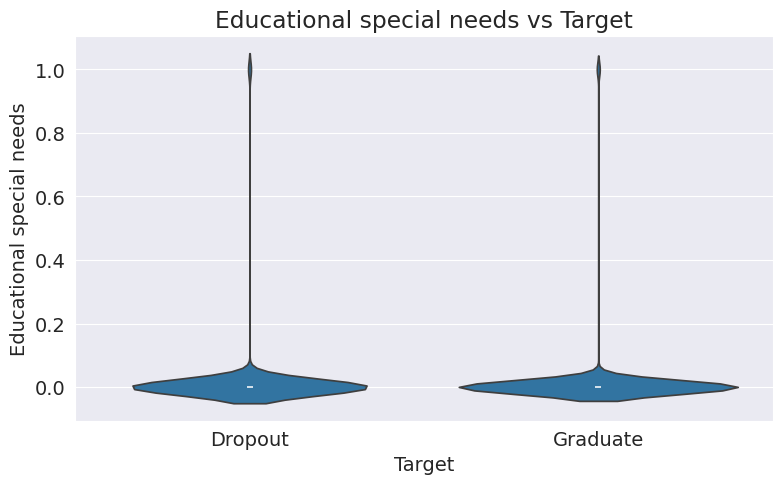

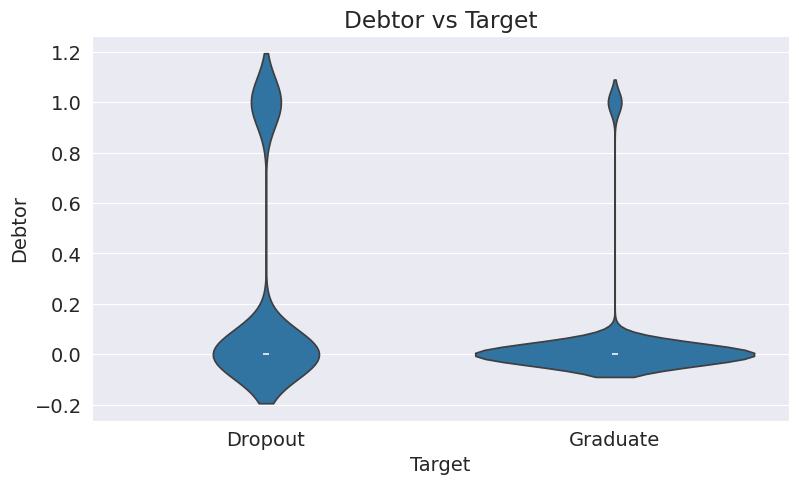

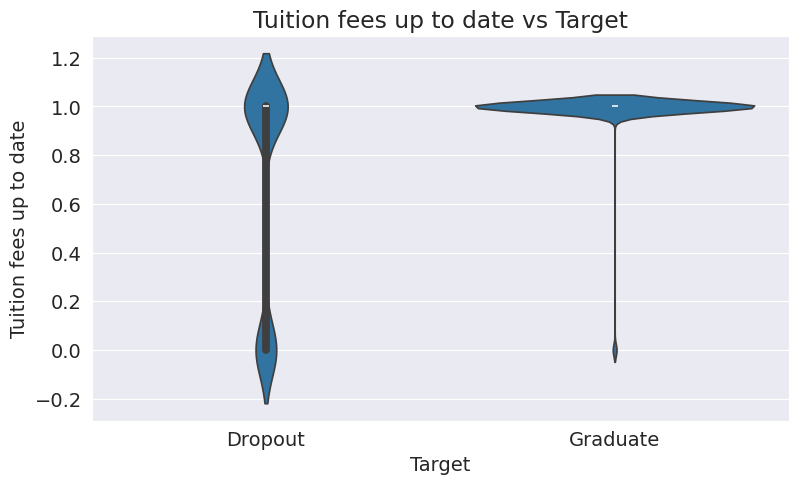

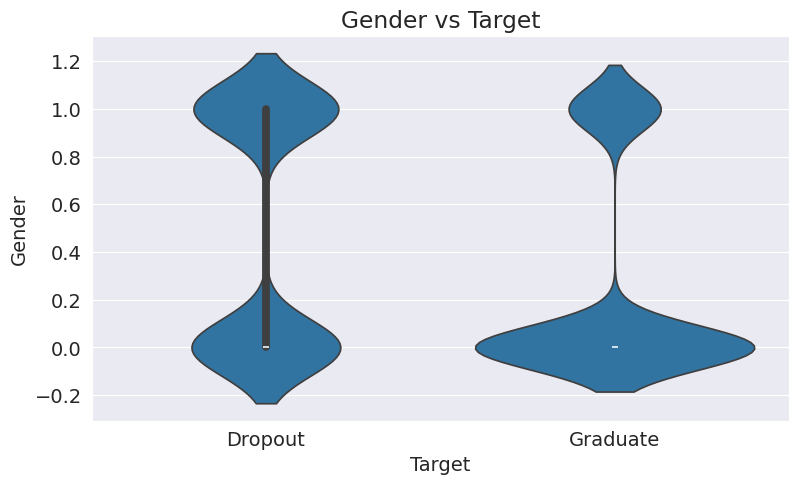

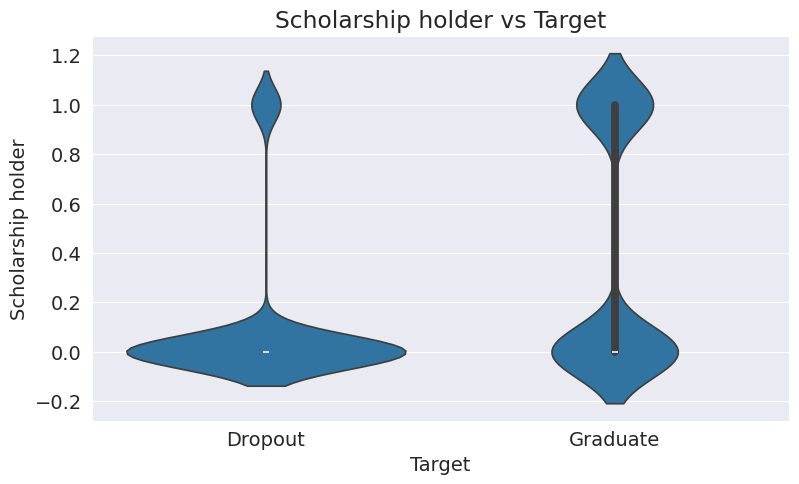

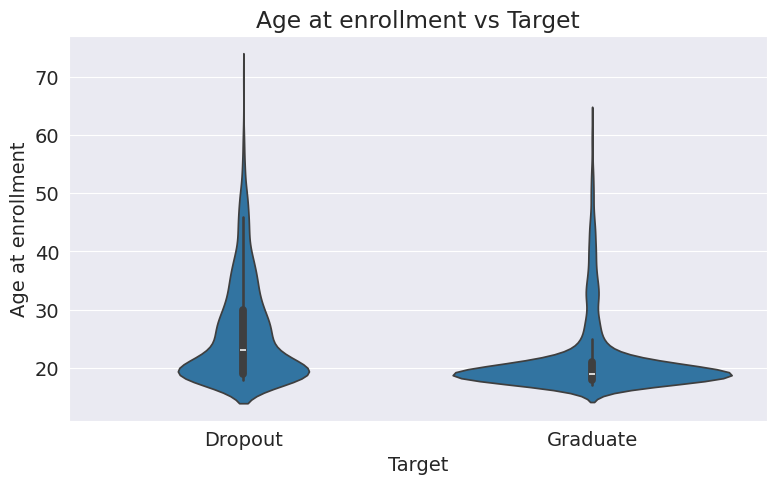

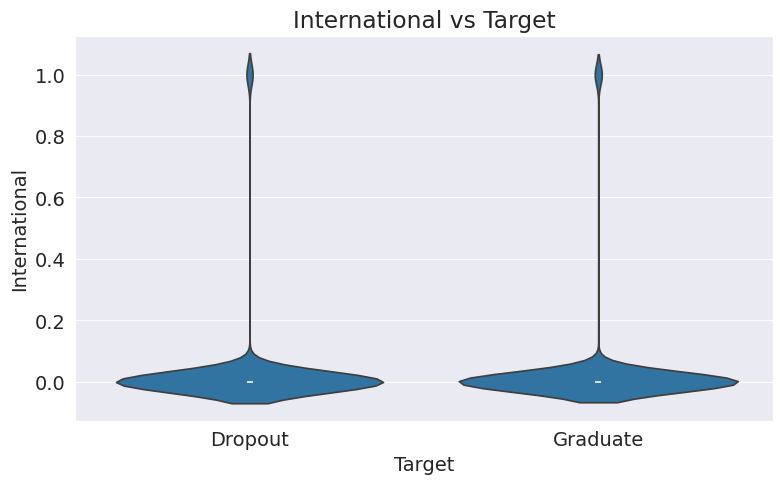

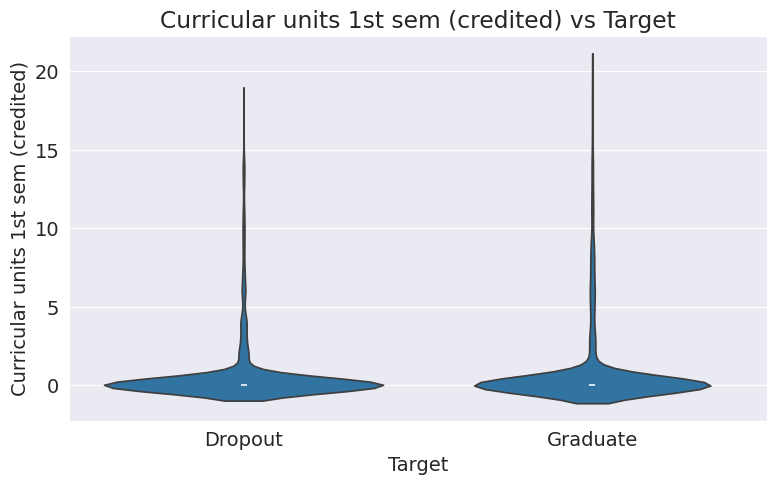

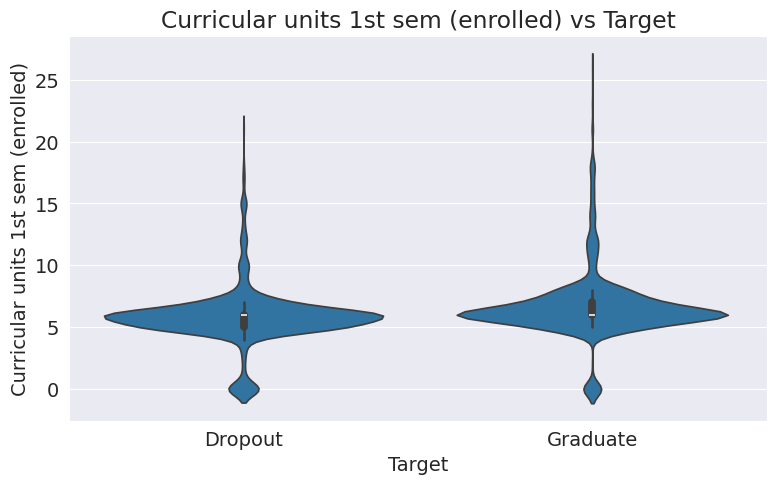

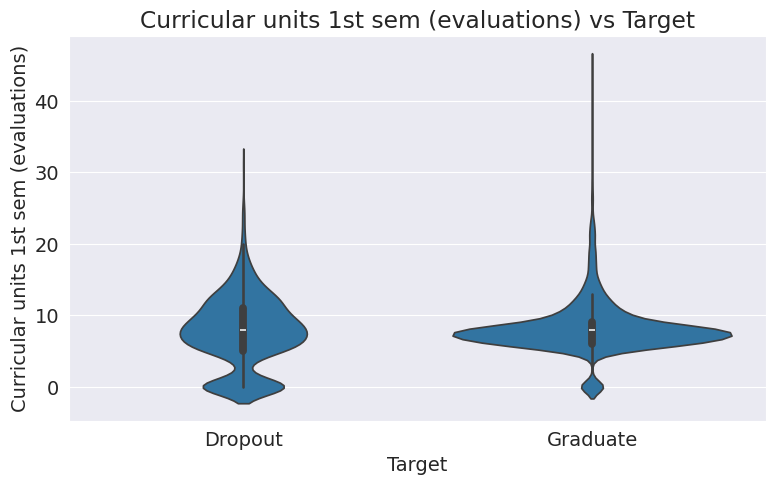

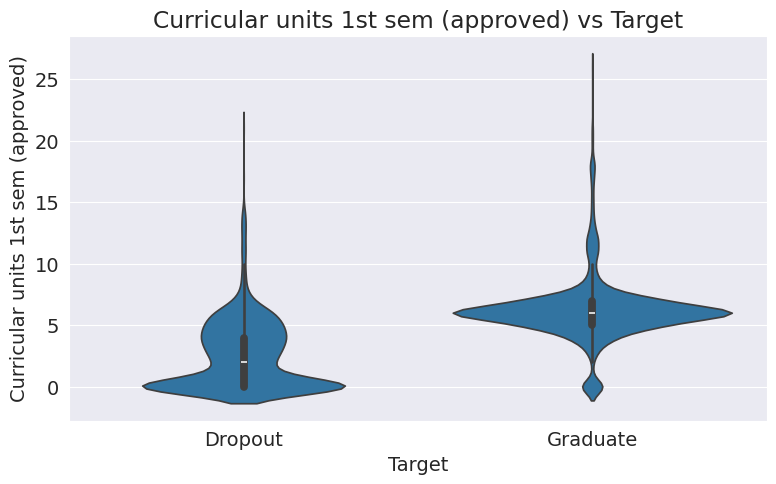

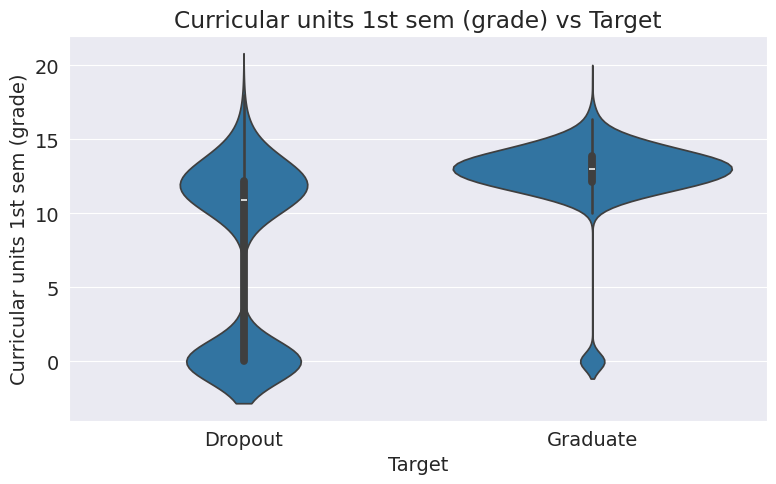

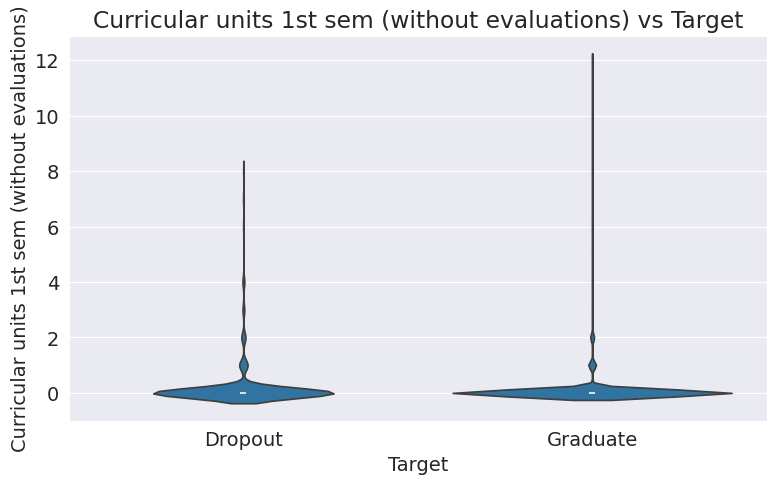

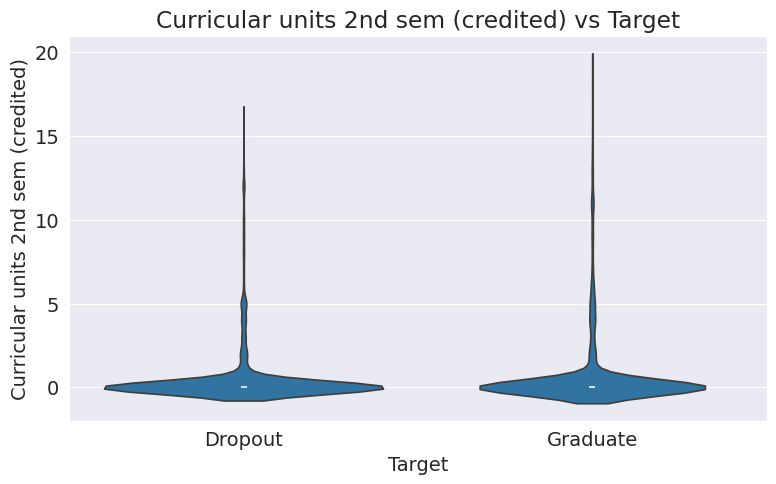

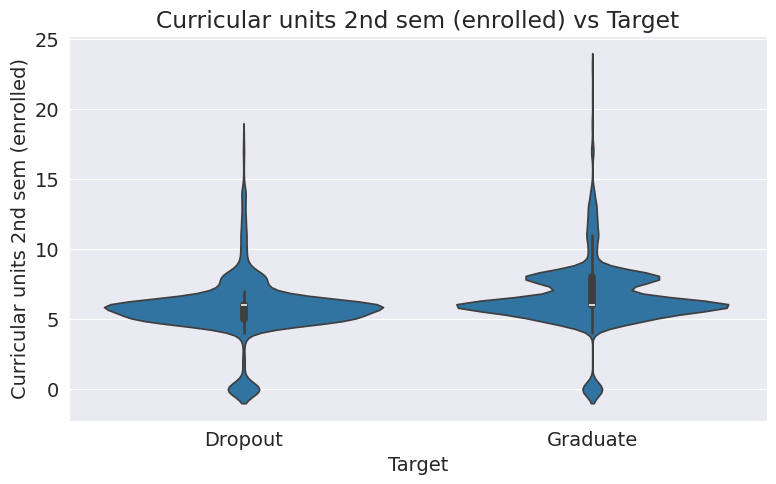

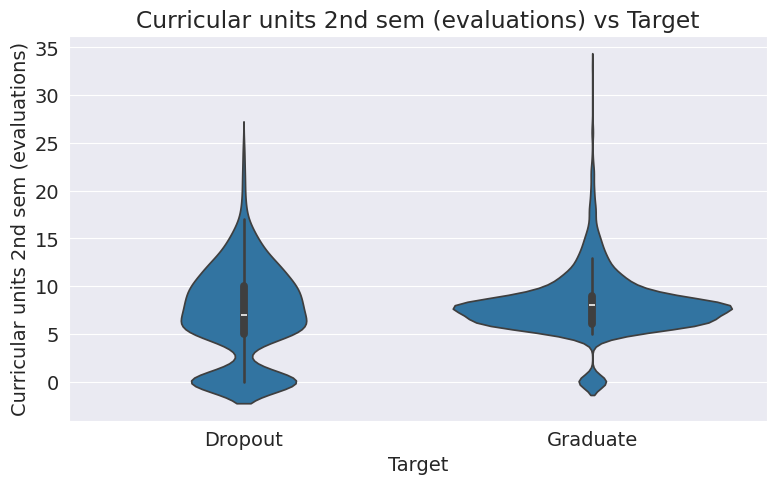

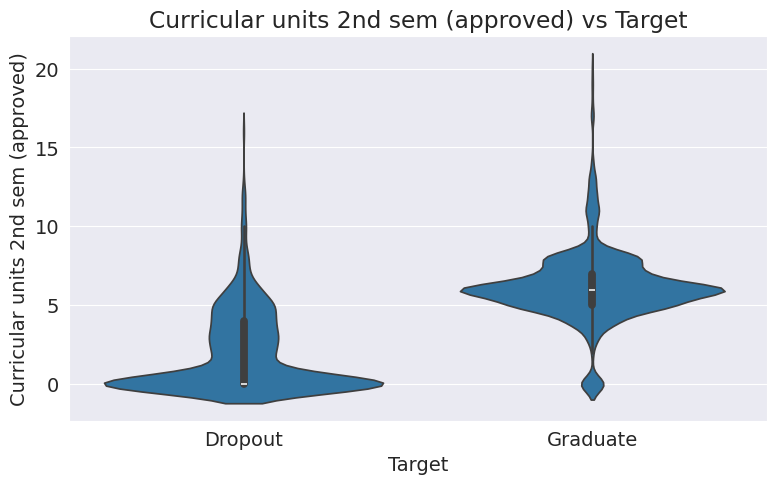

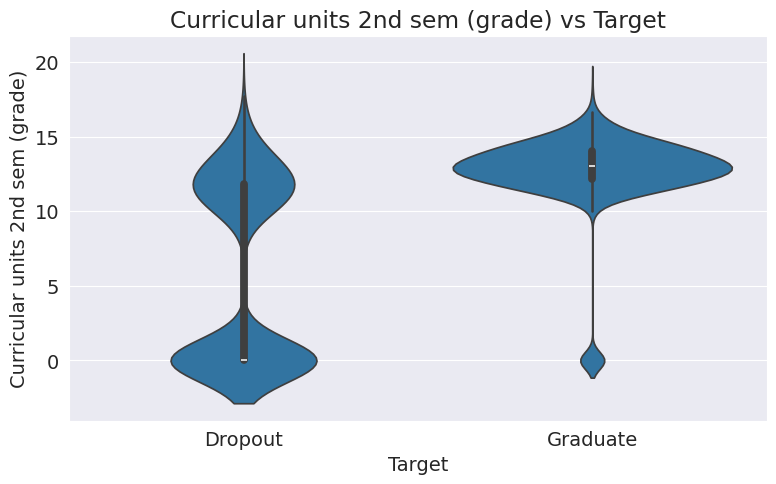

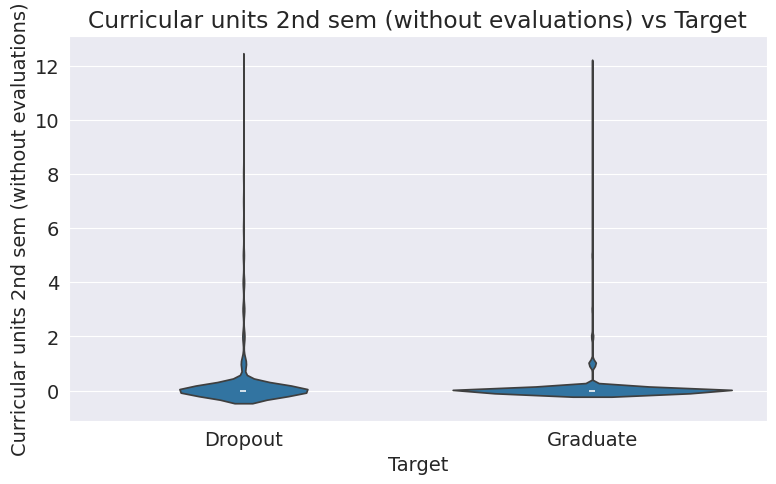

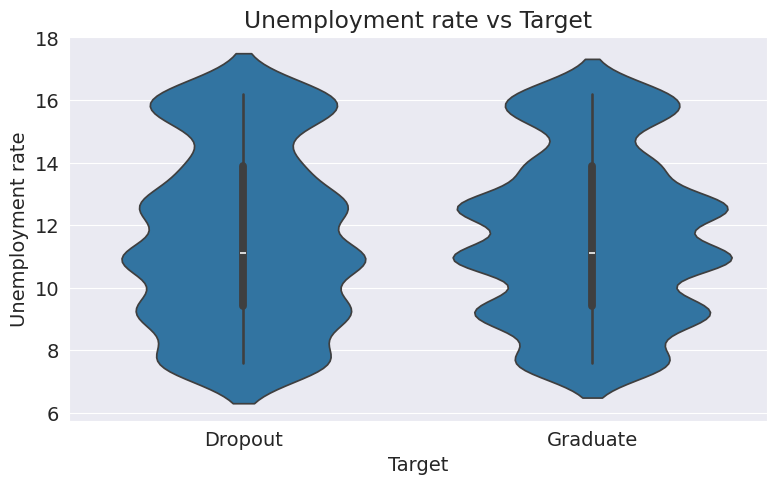

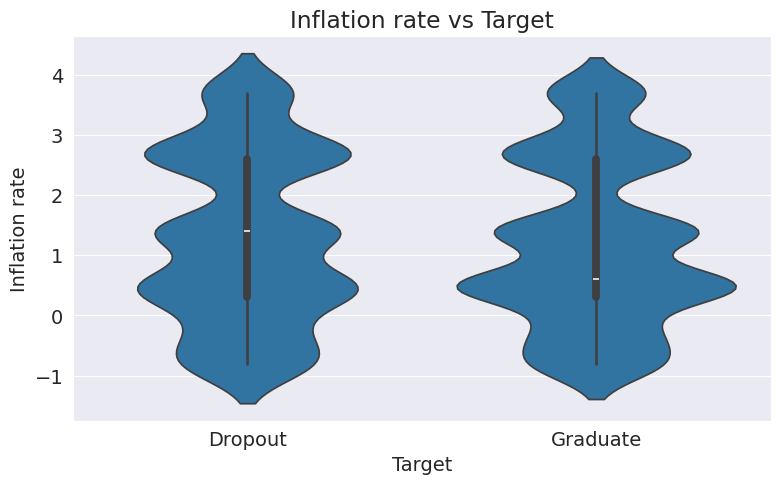

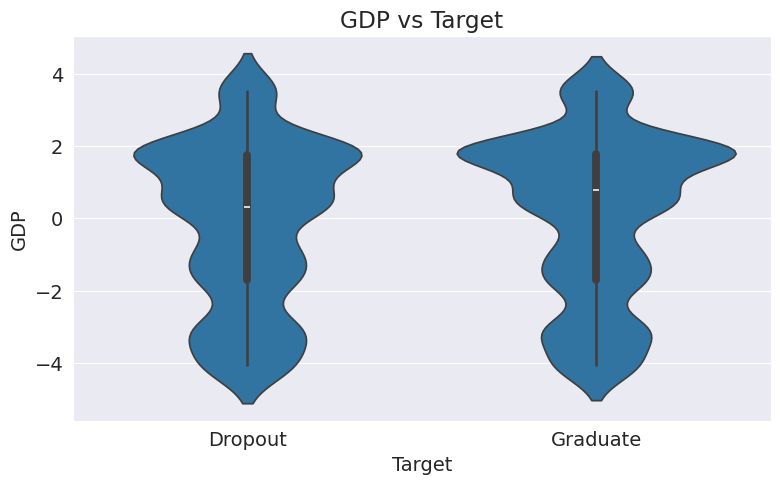

In [ ]:

# Visualize the relationship between numerical features and the target variable
for feature in numerical_features:
  plt.figure()
  sns.violinplot(x='Target', y=feature, data=dropout_df)
  plt.title(f'{feature} vs Target')
  plt.show()


In [ ]:
# Target Distribution on Scholarship holder
px.histogram(dropout_df, x='Target',
             color = 'Scholarship holder',
             color_discrete_sequence=['#065b92', '#f68c4e'],
             title='Target Distribution on Scholarship holder')

Key findings:
*   Dropout is higher for non-scholarships holders




In [ ]:
# Target distribution on Debtor
px.histogram(dropout_df, x='Target', color = 'Debtor', color_discrete_sequence=['#065b92', '#f68c4e'], title='Target Distribution on Debtor')

Key findings:
*   Dropout is higher for debtors than non-debtors

In [ ]:
# Target distribution on Sem 1 Grade
px.histogram(dropout_df, x='Curricular units 1st sem (grade)', color = 'Target', color_discrete_sequence=['#f68c4e', '#065b92'], title='Target Distribution on Sem 1 Grade')

Key findings:
*   Dropout is higher for students with sem 1 average grade of 0

In [ ]:
# Target distribution on Sem 2 Grade
px.histogram(dropout_df, x='Curricular units 2nd sem (grade)', color = 'Target', color_discrete_sequence=['#f68c4e', '#065b92'], title='Target Distribution on Sem 2 Grade')

Key findings:
*   Dropout is higher for students with sem 2 average grade of 0

In [ ]:
# Target distribution on Tuition fees up to date
px.histogram(dropout_df, x='Target', color = 'Tuition fees up to date', color_discrete_sequence=['#065b92', '#f68c4e'], title='Target Distribution on Tuition fees up to date')

Key findings:
*   There is a higher dropout for students with fees not up todate

In [ ]:
# convert target column to numerics and update the dataframe to a new variable name

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dropout_df['Target_Numeric'] = le.fit_transform(dropout_df['Target'])
dropout_df_updated_Target_Col = dropout_df.drop('Target', axis=1)


<ipython-input-22-1b81fc553494>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



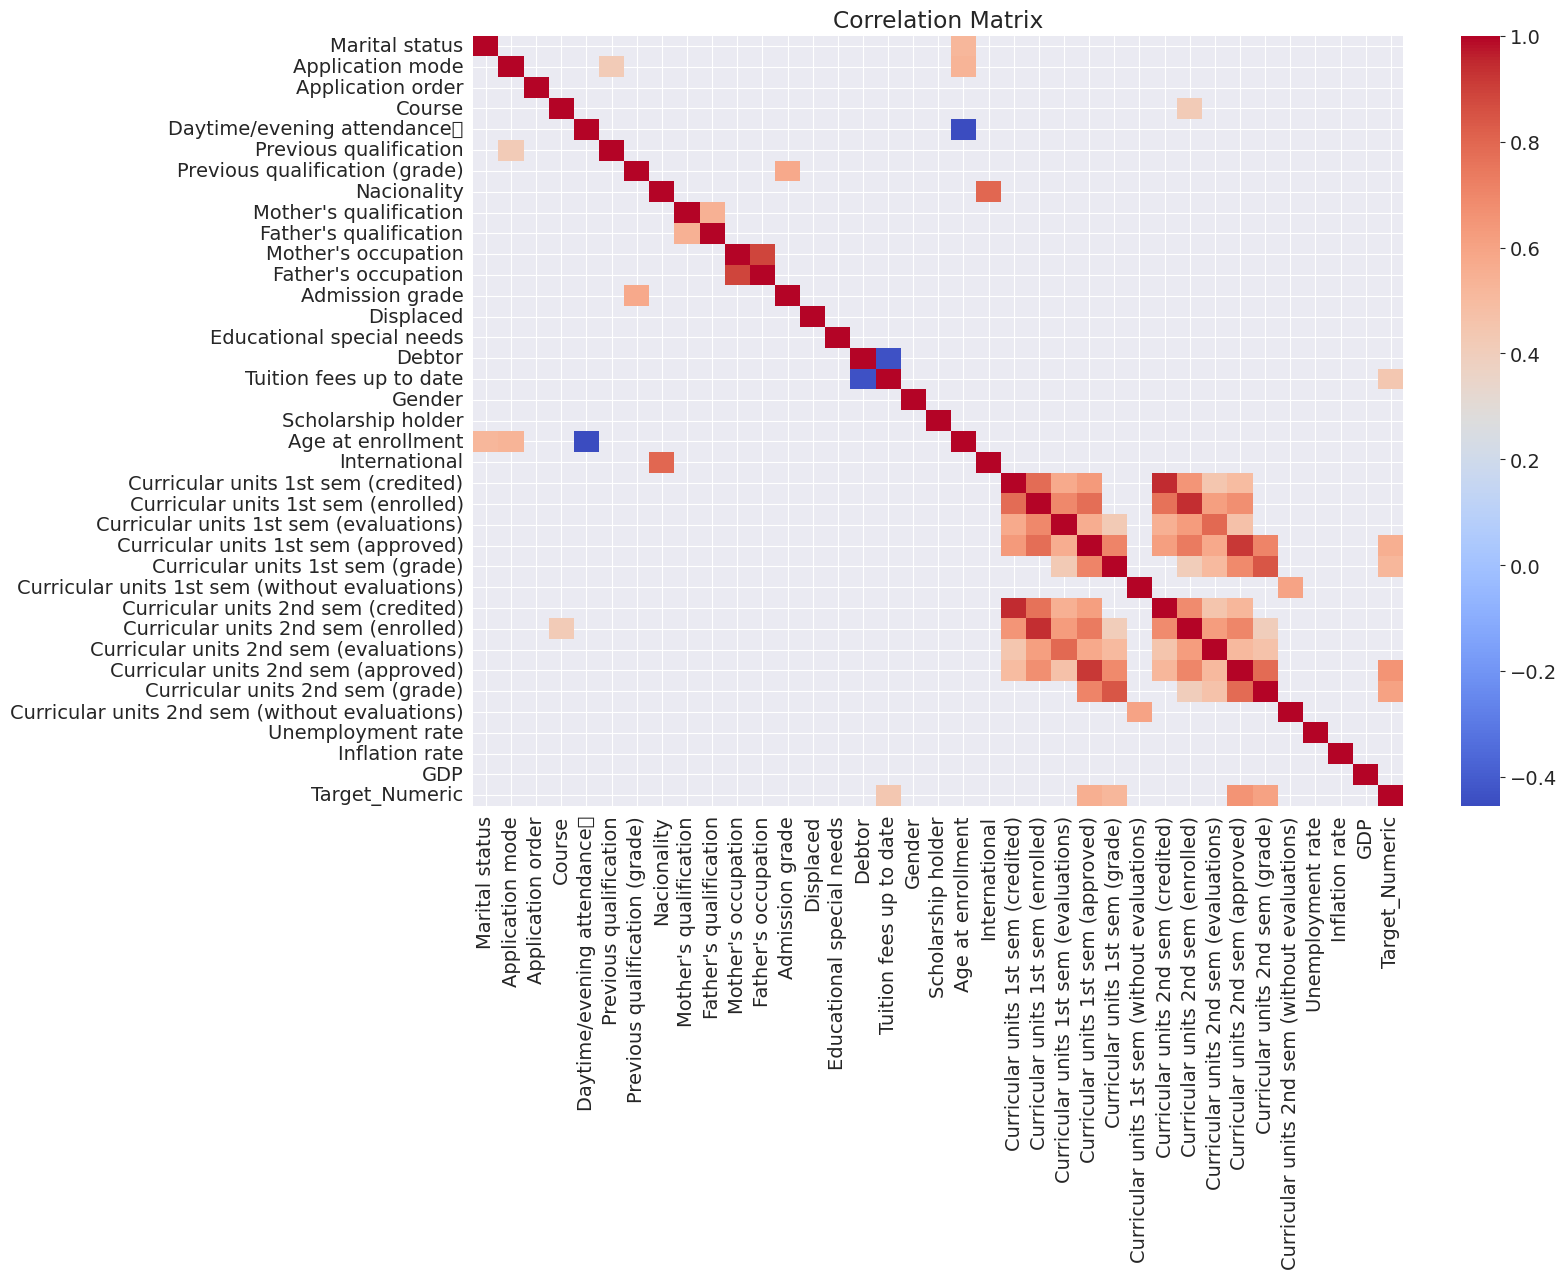

In [ ]:
# visual to show inter-feature relations

# Calculate the correlation matrix
corr_matrix = dropout_df_updated_Target_Col.corr()

# Unshade boxes with low correlation
mask = abs(corr_matrix) < 0.4

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



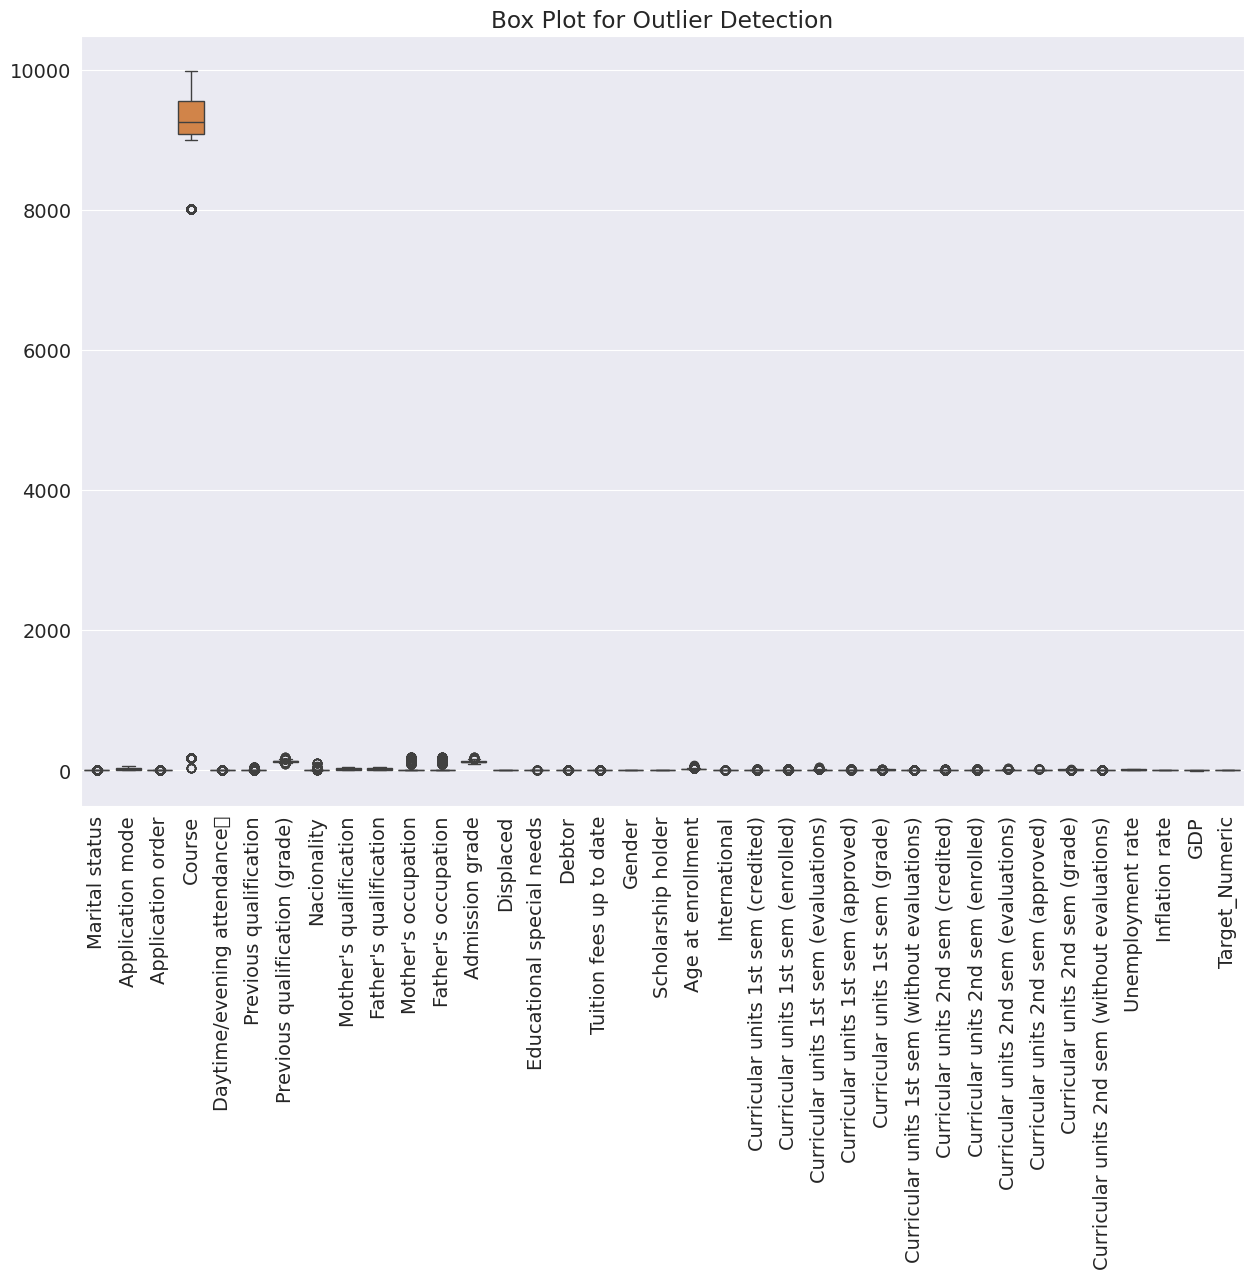

Outliers detected using Z-score (row, column):
 (array([   0,    5,    5, ..., 3628, 3629, 3629]), array([ 3, 19, 32, ...,  6,  7, 20]))

Number of outliers detected using IQR for each column:
 Marital status                                    431
Application mode                                    0
Application order                                 468
Course                                            381
Daytime/evening attendance\t                      408
Previous qualification                            611
Previous qualification (grade)                    146
Nacionality                                        86
Mother's qualification                              0
Father's qualification                              0
Mother's occupation                               137
Father's occupation                               134
Admission grade                                    71
Displaced                                           0
Educational special needs                         

In [ ]:
# prompt: detect outliers using z-score, IQR and box plot

import numpy as np
from scipy import stats

# Using Z-score
z_scores = np.abs(stats.zscore(dropout_df_updated_Target_Col))
threshold = 3
outliers_zscore = np.where(z_scores > threshold)

# Using IQR
Q1 = dropout_df_updated_Target_Col.quantile(0.25)
Q3 = dropout_df_updated_Target_Col.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((dropout_df_updated_Target_Col < (Q1 - 1.5 * IQR)) | (dropout_df_updated_Target_Col > (Q3 + 1.5 * IQR))).sum()

# Using Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=dropout_df_updated_Target_Col)
plt.title('Box Plot for Outlier Detection')
plt.xticks(rotation=90)
plt.show()

print("Outliers detected using Z-score (row, column):\n", outliers_zscore)
print("\nNumber of outliers detected using IQR for each column:\n", outliers_iqr)


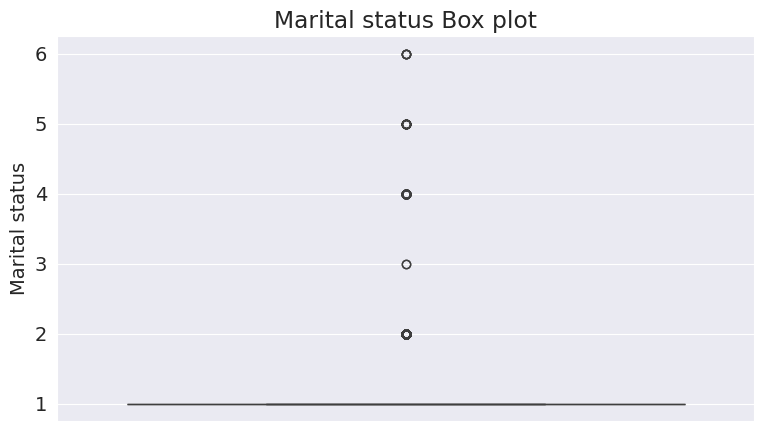

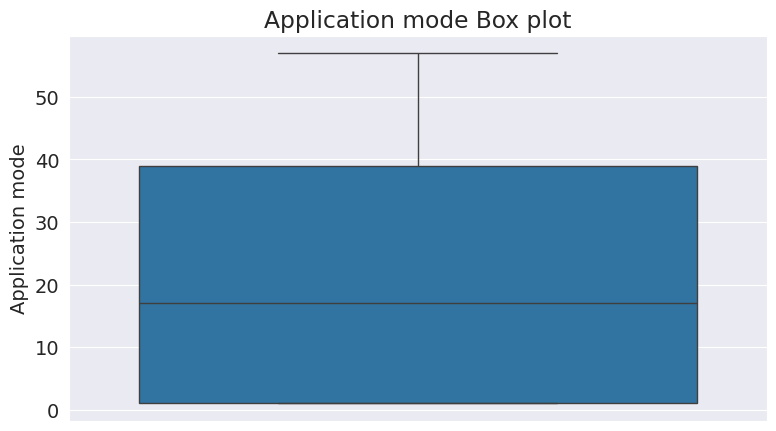

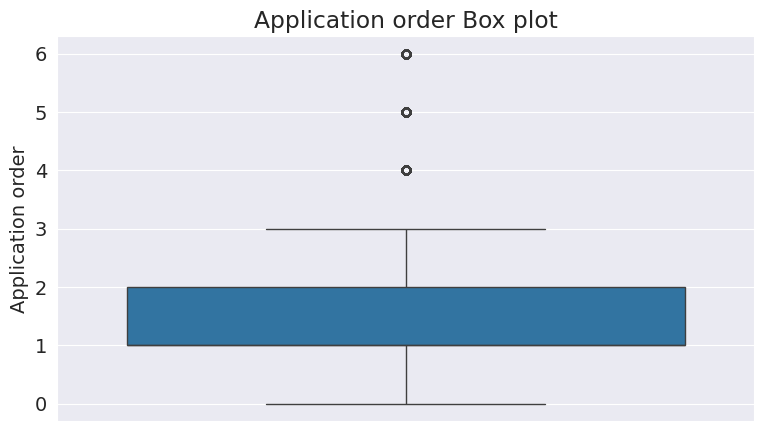

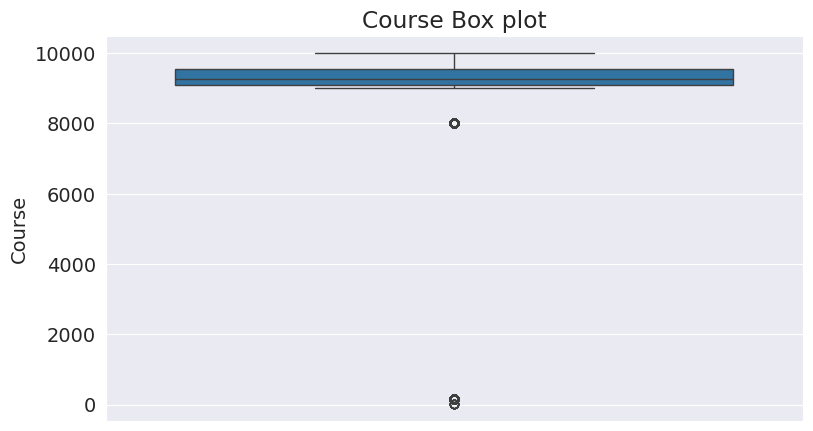

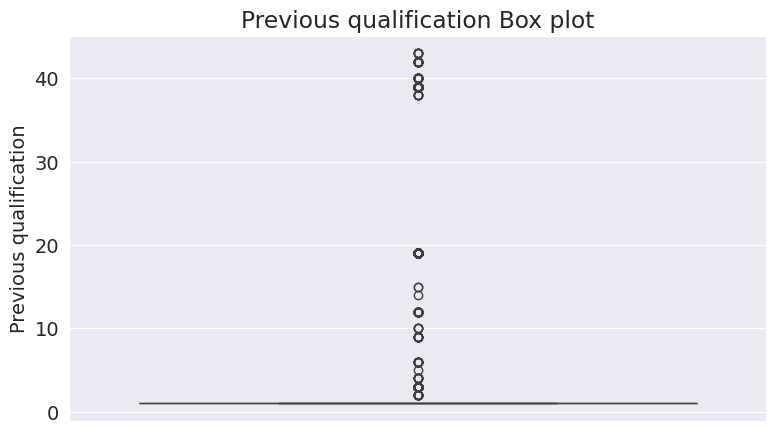

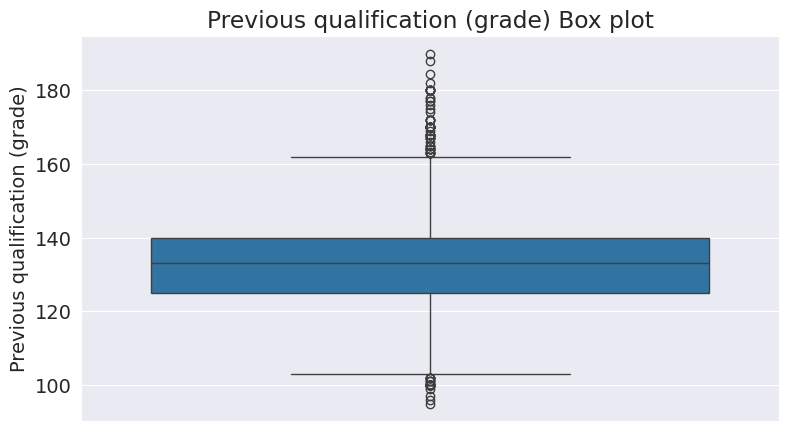

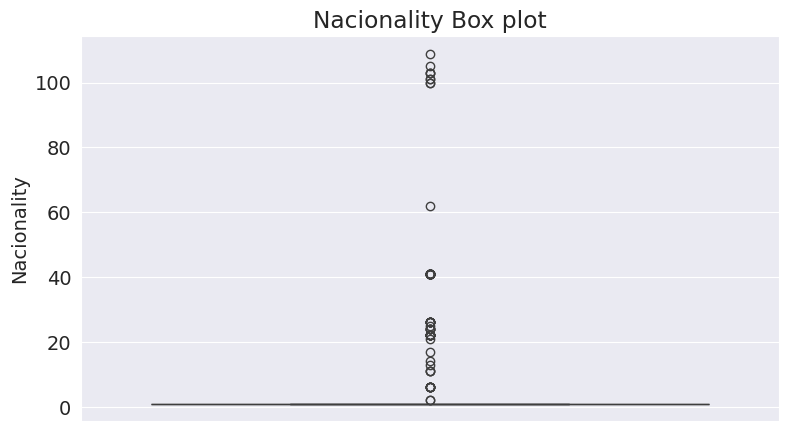

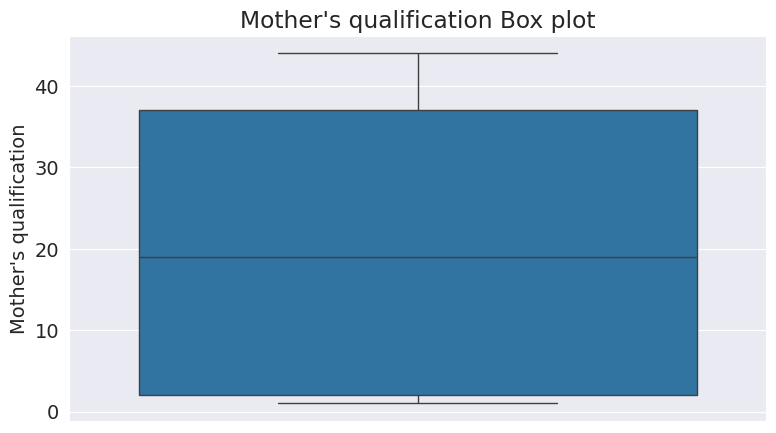

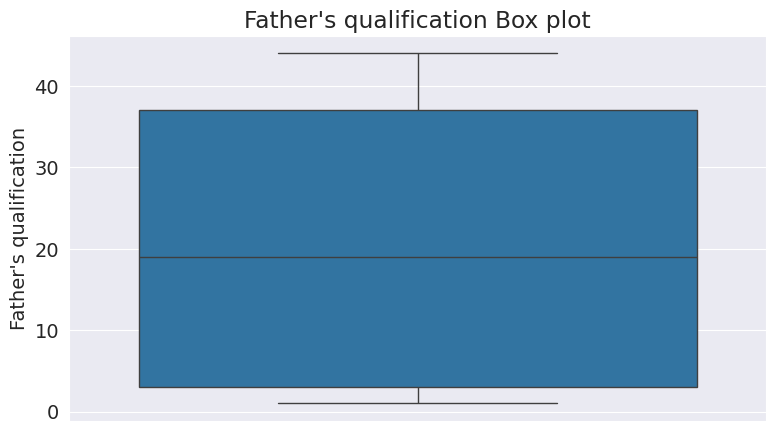

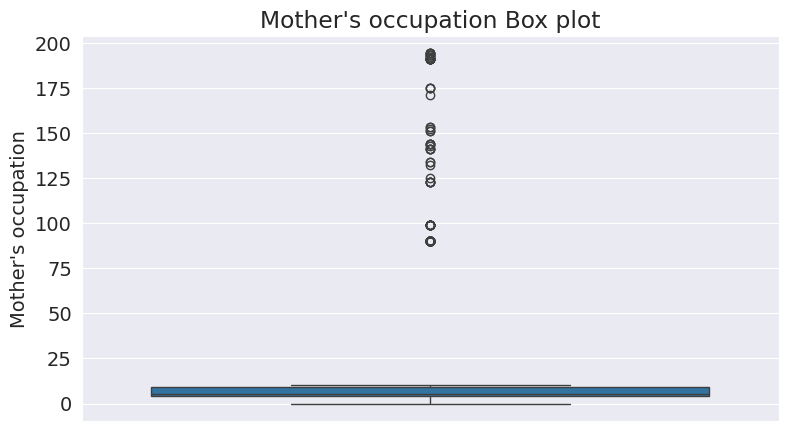

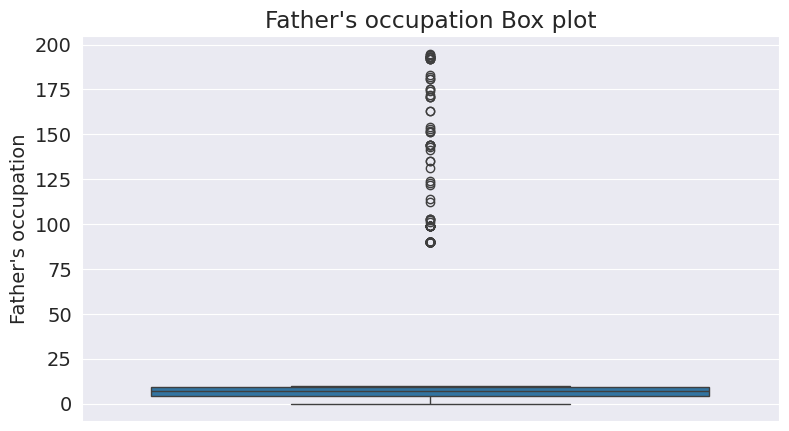

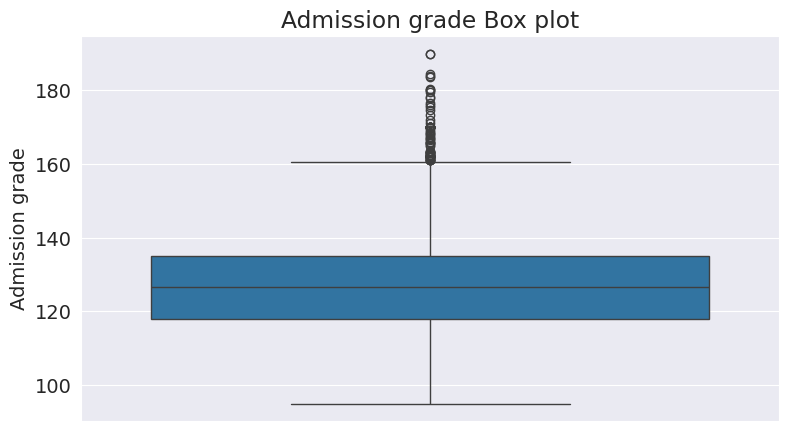

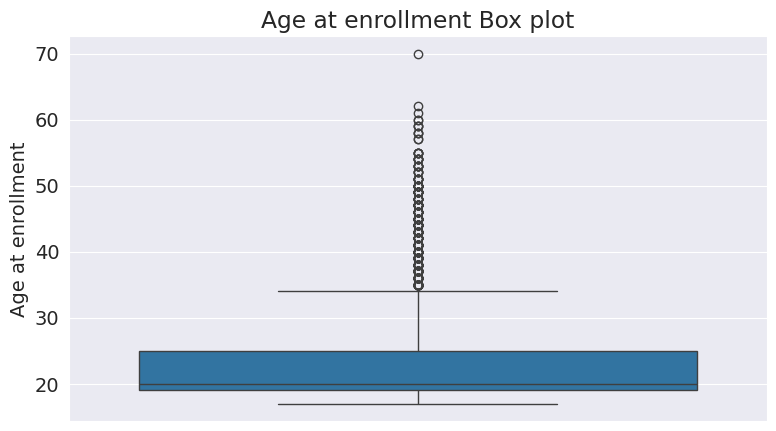

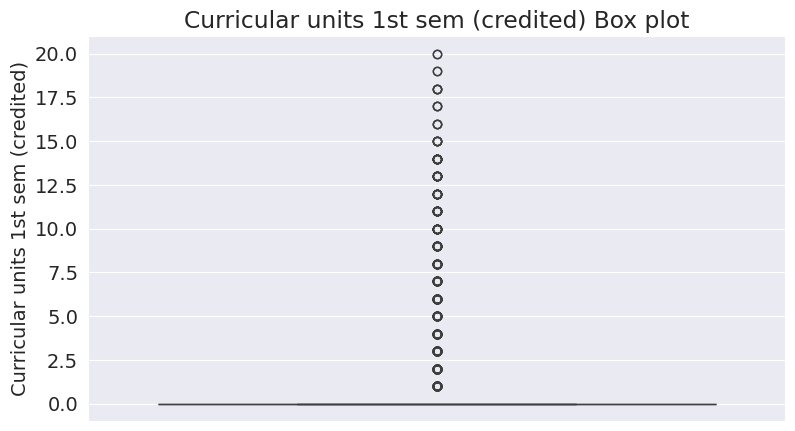

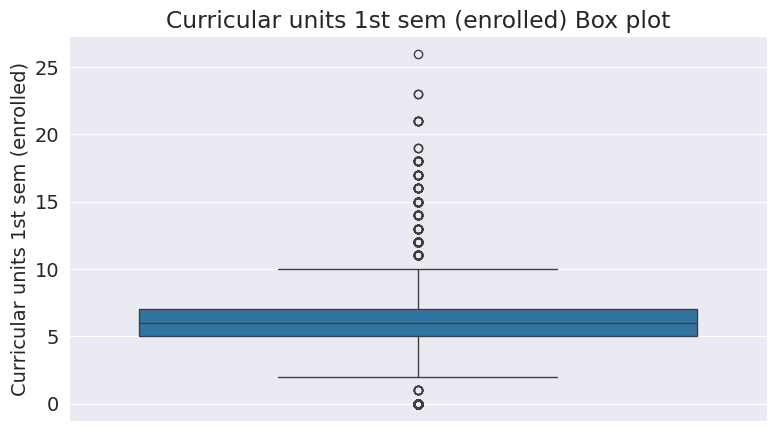

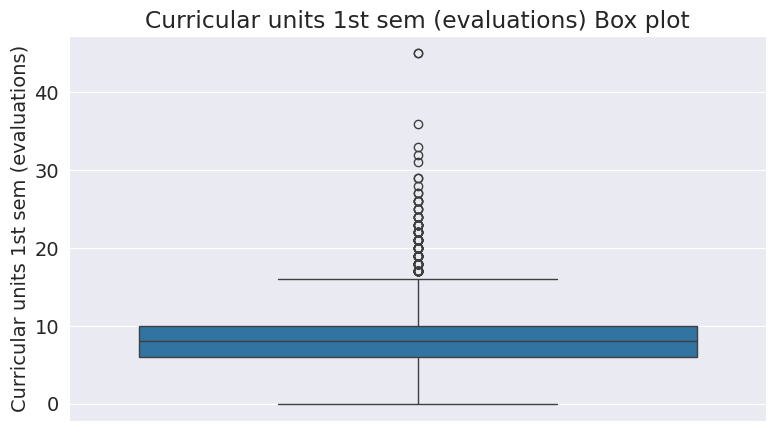

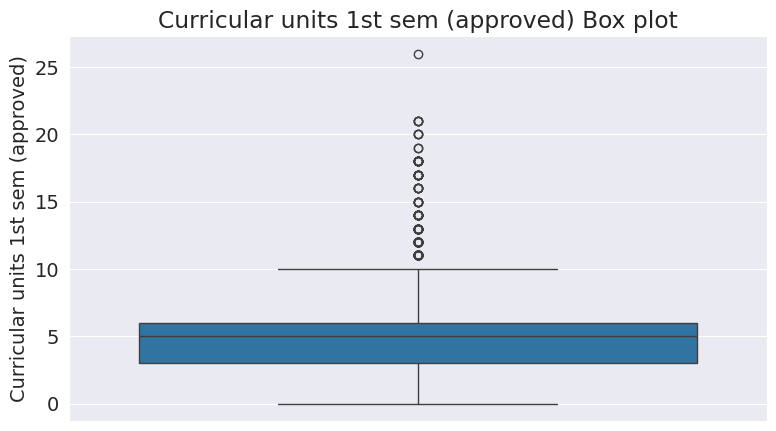

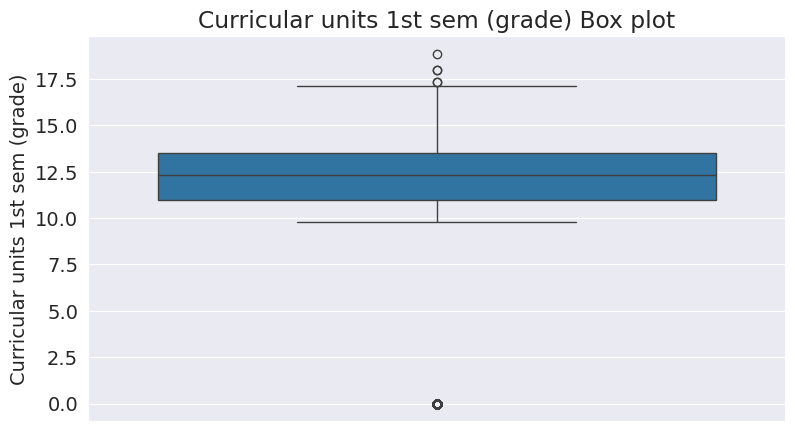

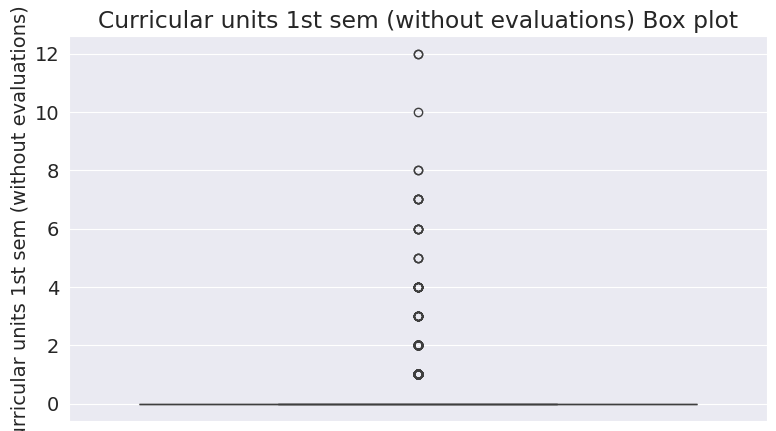

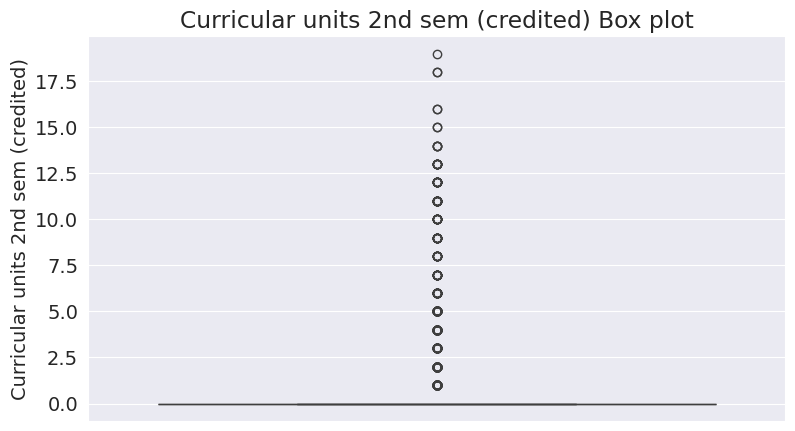

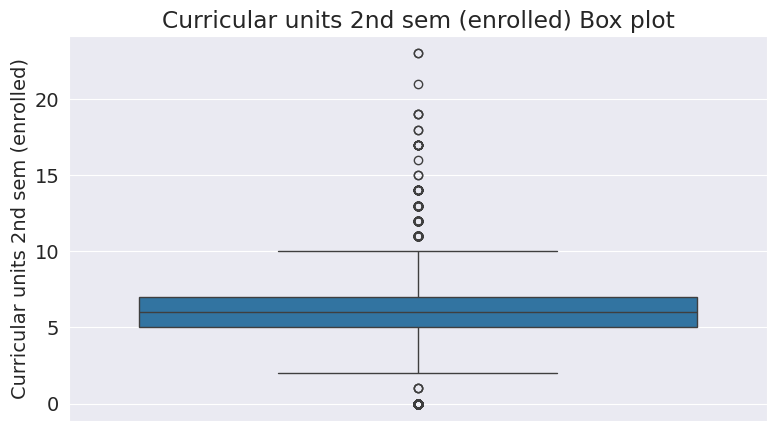

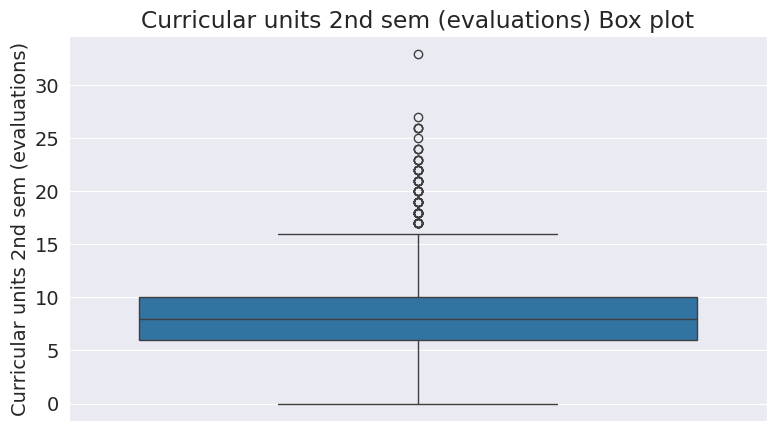

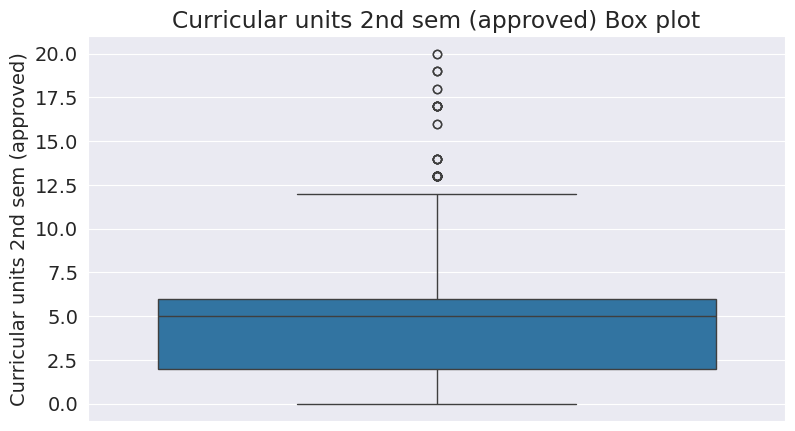

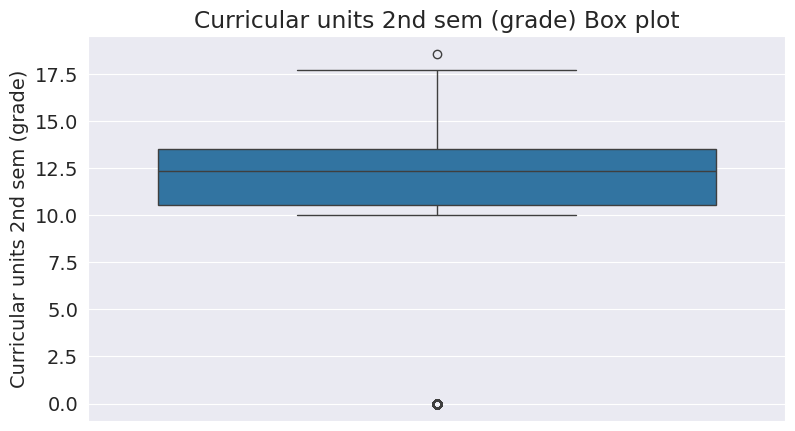

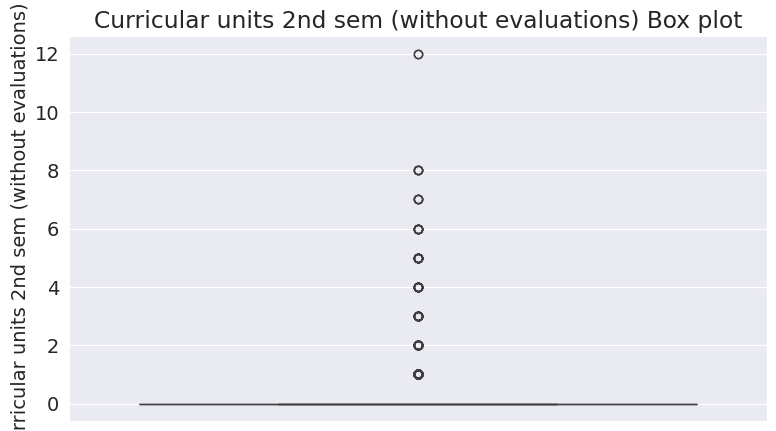

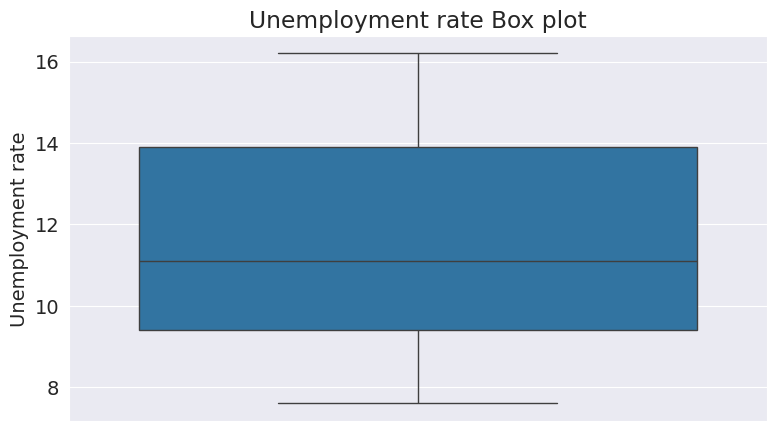

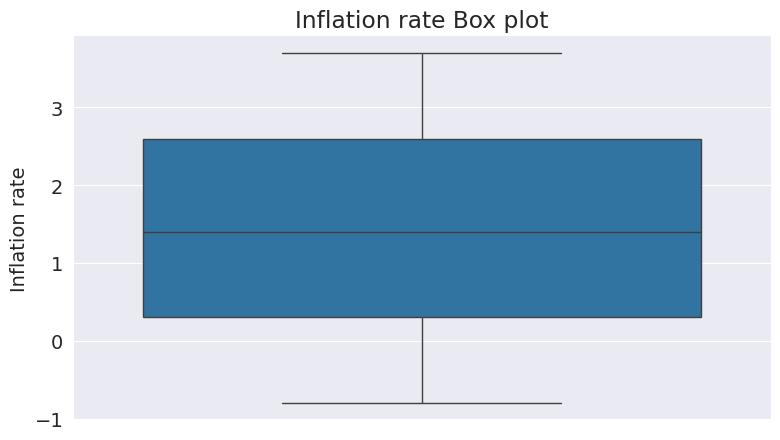

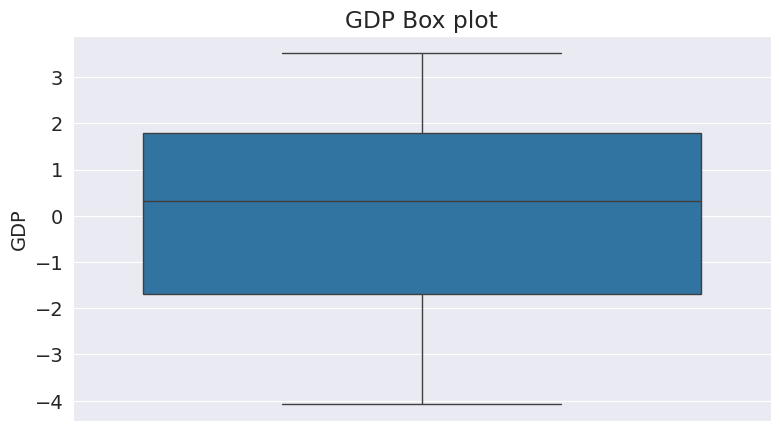

In [ ]:
# Visualize outliers in non-binary columns using boxplot

unique_count = dropout_df.nunique()
non_binary_cols = unique_count[unique_count > 2].index
#print(cols_needed)

for feature in non_binary_cols:
  plt.figure()
  sns.boxplot(dropout_df[feature])
  plt.title(f'{feature} Box plot')
  plt.show()

In [ ]:
# checking for duplicates
duplicates = dropout_df.duplicated()
duplicated_rows = dropout_df[duplicates]
print(duplicated_rows)

Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance	, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target, Target_Numeric]
Index: []

[0 rows x 38 columns]


Key findings:
*   No duplicates found




In [ ]:
dropout_df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (enrolled)  \
0                      12  ...                                    0   
1                       3  ...                                    6   
2                      37  ...                                    6   
3                      37  ...                                    6   
4                      38  ...                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  Target_Numeric  
0             1.4  1.74   Dropout               0  
1            -0.3  0.79  Graduate               1  
2             1.4  1.74   Dropout               0  
3            -0.8 -3.12  Graduate               1  
4            -0.3  0.79  Graduate               1  

[5 rows x 38 columns]

# Feature Engineering

## Normalization

In [ ]:
# prompt: Normalize numerical columns

from sklearn.preprocessing import MinMaxScaler

numerical_cols = dropout_df.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
dropout_df[numerical_cols] = scaler.fit_transform(dropout_df[numerical_cols])

dropout_df.head()


<ipython-input-28-14772fda381f>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Marital status  Application mode  Application order    Course  \
0             0.0          0.285714           0.833333  0.013858   
1             0.0          0.250000           0.166667  0.925989   
2             0.0          0.000000           0.833333  0.907512   
3             0.0          0.285714           0.333333  0.978108   
4             0.2          0.678571           0.166667  0.801466   

   Daytime/evening attendance\t  Previous qualification  \
0                           1.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           0.0                     0.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                        0.284211          0.0                0.418605   
1                        0.684211          0.0                0.000000   
2                        0.284211          0.0                0.837209   
3                        0.284211          0.0                0.860465   
4                        0.052632          0.0                0.837209   

   Father's qualification  ...  Curricular units 2nd sem (enrolled)  \
0                0.255814  ...                              0.00000   
1                0.046512  ...                              0.26087   
2                0.837209  ...                              0.26087   
3                0.837209  ...                              0.26087   
4                0.860465  ...                              0.26087   

   Curricular units 2nd sem (evaluations)  \
0                                0.000000   
1                                0.181818   
2                                0.000000   
3                                0.303030   
4                                0.181818   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                 0.00                          0.000000   
1                                 0.30                          0.735897   
2                                 0.00                          0.000000   
3                                 0.25                          0.667692   
4                                 0.30                          0.700000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           0.732558   
2                                             0.0           0.372093   
3                                             0.0           0.209302   
4                                             0.0           0.732558   

   Inflation rate       GDP    Target  Target_Numeric  
0        0.488889  0.766182   Dropout             0.0  
1        0.111111  0.640687  Graduate             1.0  
2        0.488889  0.766182   Dropout             0.0  
3        0.000000  0.124174  Graduate             1.0  
4        0.111111  0.640687  Graduate             1.0  

[5 rows x 38 columns]

## Standardization

In [ ]:
# prompt: standardize all columns

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
dropout_df[numerical_cols] = scaler.fit_transform(dropout_df[numerical_cols])

dropout_df.head(10)


<ipython-input-29-a9f9c3598d7f>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Marital status  Application mode  Application order    Course  \
0       -0.300686         -0.081917           2.436822 -4.197769   
1       -0.300686         -0.197149          -0.562471  0.193388   
2       -0.300686         -1.003777           2.436822  0.104434   
3       -0.300686         -0.081917           0.187353  0.444298   
4        1.330837          1.185642          -0.562471 -0.406087   
5        1.330837          1.185642          -0.562471  0.549689   
6       -0.300686         -1.003777          -0.562471  0.312317   
7       -0.300686         -0.024300           1.686999  0.193388   
8       -0.300686         -1.003777           0.937176  0.185653   
9       -0.300686         -1.003777          -0.562471  0.185653   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.355850               -0.352421   
1                      0.355850               -0.352421   
2                      0.355850               -0.352421   
3                      0.355850               -0.352421   
4                     -2.810171               -0.352421   
5                     -2.810171                1.443493   
6                      0.355850               -0.352421   
7                      0.355850               -0.352421   
8                      0.355850               -0.352421   
9                      0.355850               -0.352421   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.825034    -0.124214               -0.063288   
1                        2.045805    -0.124214               -1.218383   
2                       -0.825034    -0.124214                1.091807   
3                       -0.825034    -0.124214                1.155979   
4                       -2.487099    -0.124214                1.091807   
5                        0.013553    -0.124214                1.091807   
6                        0.685934    -0.124214               -0.063288   
7                       -1.051679    -0.124214                1.091807   
8                        0.308192     9.025746               -1.218383   
9                        0.383740    -0.124214               -1.218383   

   Father's qualification  ...  Curricular units 2nd sem (enrolled)  \
0               -0.692162  ...                            -2.782691   
1               -1.281423  ...                            -0.131002   
2                0.944677  ...                            -0.131002   
3                0.944677  ...                            -0.131002   
4                1.010150  ...                            -0.131002   
5                0.944677  ...                            -0.572950   
6                1.010150  ...                             0.752895   
7                0.944677  ...                            -0.572950   
8               -1.412370  ...                            -0.131002   
9               -0.233847  ...                            -0.131002   

   Curricular units 2nd sem (evaluations)  \
0                               -1.958586   
1                               -0.444817   
2                               -1.958586   
3                                0.564362   
4                               -0.444817   
5                                2.330425   
6                                0.059772   
7                               -0.697112   
8                               -0.192522   
9                                1.573541   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                            -1.429014                         -1.831085   
1                             0.468555                          0.662383   
2                            -1.429014                         -1.831085   
3                             0.152293                          0.431281   
4                             0.468555                          0.540750   
5                             0.152293                 

In [ ]:
# Drop the Target_Numeric column

dropout_df = dropout_df.drop('Target_Numeric', axis=1)

dropout_df.head()


Marital status  Application mode  Application order    Course  \
0       -0.300686         -0.081917           2.436822 -4.197769   
1       -0.300686         -0.197149          -0.562471  0.193388   
2       -0.300686         -1.003777           2.436822  0.104434   
3       -0.300686         -0.081917           0.187353  0.444298   
4        1.330837          1.185642          -0.562471 -0.406087   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.355850               -0.352421   
1                      0.355850               -0.352421   
2                      0.355850               -0.352421   
3                      0.355850               -0.352421   
4                     -2.810171               -0.352421   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.825034    -0.124214               -0.063288   
1                        2.045805    -0.124214               -1.218383   
2                       -0.825034    -0.124214                1.091807   
3                       -0.825034    -0.124214                1.155979   
4                       -2.487099    -0.124214                1.091807   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0               -0.692162  ...                            -0.287686   
1               -1.281423  ...                            -0.287686   
2                0.944677  ...                            -0.287686   
3                0.944677  ...                            -0.287686   
4                1.010150  ...                            -0.287686   

   Curricular units 2nd sem (enrolled)  \
0                            -2.782691   
1                            -0.131002   
2                            -0.131002   
3                            -0.131002   
4                            -0.131002   

   Curricular units 2nd sem (evaluations)  \
0                               -1.958586   
1                               -0.444817   
2                               -1.958586   
3                                0.564362   
4                               -0.444817   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                            -1.429014                         -1.831085   
1                             0.468555                          0.662383   
2                            -1.429014                         -1.831085   
3                             0.152293                          0.431281   
4                             0.468555                          0.540750   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                       -0.190148          -0.311312   
1                                       -0.190148           0.850919   
2                                       -0.190148          -0.311312   
3                                       -0.190148          -0.836191   
4                                       -0.190148           0.850919   

   Inflation rate       GDP    Target  
0        0.121615  0.774119   Dropout  
1       -1.106070  0.353704  Graduate  
2        0.121615  0.774119   Dropout  
3       -1.467154 -1.376634  Graduate  
4       -1.106070  0.353704  Graduate  

[5 rows x 37 columns]

In [ ]:
#Encode the target column 1=dropout and 0=graduate

dropout_df['Target_Encoded'] = dropout_df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

dropout_df.head()

Marital status  Application mode  Application order    Course  \
0       -0.300686         -0.081917           2.436822 -4.197769   
1       -0.300686         -0.197149          -0.562471  0.193388   
2       -0.300686         -1.003777           2.436822  0.104434   
3       -0.300686         -0.081917           0.187353  0.444298   
4        1.330837          1.185642          -0.562471 -0.406087   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.355850               -0.352421   
1                      0.355850               -0.352421   
2                      0.355850               -0.352421   
3                      0.355850               -0.352421   
4                     -2.810171               -0.352421   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.825034    -0.124214               -0.063288   
1                        2.045805    -0.124214               -1.218383   
2                       -0.825034    -0.124214                1.091807   
3                       -0.825034    -0.124214                1.155979   
4                       -2.487099    -0.124214                1.091807   

   Father's qualification  ...  Curricular units 2nd sem (enrolled)  \
0               -0.692162  ...                            -2.782691   
1               -1.281423  ...                            -0.131002   
2                0.944677  ...                            -0.131002   
3                0.944677  ...                            -0.131002   
4                1.010150  ...                            -0.131002   

   Curricular units 2nd sem (evaluations)  \
0                               -1.958586   
1                               -0.444817   
2                               -1.958586   
3                                0.564362   
4                               -0.444817   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                            -1.429014                         -1.831085   
1                             0.468555                          0.662383   
2                            -1.429014                         -1.831085   
3                             0.152293                          0.431281   
4                             0.468555                          0.540750   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                       -0.190148          -0.311312   
1                                       -0.190148           0.850919   
2                                       -0.190148          -0.311312   
3                                       -0.190148          -0.836191   
4                                       -0.190148           0.850919   

   Inflation rate       GDP    Target  Target_Encoded  
0        0.121615  0.774119   Dropout               1  
1       -1.106070  0.353704  Graduate               0  
2        0.121615  0.774119   Dropout               1  
3       -1.467154 -1.376634  Graduate               0  
4       -1.106070  0.353704  Graduate               0  

[5 rows x 38 columns]

In [ ]:
# Drop Target column

df = dropout_df.drop('Target', axis=1)

df.head()


Marital status  Application mode  Application order    Course  \
0       -0.300686         -0.081917           2.436822 -4.197769   
1       -0.300686         -0.197149          -0.562471  0.193388   
2       -0.300686         -1.003777           2.436822  0.104434   
3       -0.300686         -0.081917           0.187353  0.444298   
4        1.330837          1.185642          -0.562471 -0.406087   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.355850               -0.352421   
1                      0.355850               -0.352421   
2                      0.355850               -0.352421   
3                      0.355850               -0.352421   
4                     -2.810171               -0.352421   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.825034    -0.124214               -0.063288   
1                        2.045805    -0.124214               -1.218383   
2                       -0.825034    -0.124214                1.091807   
3                       -0.825034    -0.124214                1.155979   
4                       -2.487099    -0.124214                1.091807   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0               -0.692162  ...                            -0.287686   
1               -1.281423  ...                            -0.287686   
2                0.944677  ...                            -0.287686   
3                0.944677  ...                            -0.287686   
4                1.010150  ...                            -0.287686   

   Curricular units 2nd sem (enrolled)  \
0                            -2.782691   
1                            -0.131002   
2                            -0.131002   
3                            -0.131002   
4                            -0.131002   

   Curricular units 2nd sem (evaluations)  \
0                               -1.958586   
1                               -0.444817   
2                               -1.958586   
3                                0.564362   
4                               -0.444817   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                            -1.429014                         -1.831085   
1                             0.468555                          0.662383   
2                            -1.429014                         -1.831085   
3                             0.152293                          0.431281   
4                             0.468555                          0.540750   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                       -0.190148          -0.311312   
1                                       -0.190148           0.850919   
2                                       -0.190148          -0.311312   
3                                       -0.190148          -0.836191   
4                                       -0.190148           0.850919   

   Inflation rate       GDP  Target_Encoded  
0        0.121615  0.774119               1  
1       -1.106070  0.353704               0  
2        0.121615  0.774119               1  
3       -1.467154 -1.376634               0  
4       -1.106070  0.353704               0  

[5 rows x 37 columns]

Feature ranking:
1. Curricular units 2nd sem (approved) (0.169284)
2. Tuition fees up to date (0.034711)
3. Curricular units 1st sem (enrolled) (0.005647)
4. Course (0.005372)
5. Curricular units 2nd sem (enrolled) (0.004959)
6. Admission grade (0.003168)
7. Application mode (0.003030)
8. Previous qualification (grade) (0.002066)
9. Scholarship holder (0.002066)
10. Curricular units 2nd sem (grade) (0.001928)
11. Curricular units 1st sem (approved) (0.001928)
12. Curricular units 1st sem (evaluations) (0.001928)
13. Displaced (0.001791)
14. Curricular units 2nd sem (credited) (0.001515)
15. GDP (0.001377)
16. Debtor (0.001377)
17. Curricular units 1st sem (credited) (0.001377)
18. Father's occupation (0.001240)
19. Curricular units 1st sem (grade) (0.000964)
20. Unemployment rate (0.000413)
21. Previous qualification (0.000138)
22. Mother's qualification (0.000138)
23. International (0.000000)
24. Daytime/evening attendance	 (0.000000)
25. Nacionality (0.000000)
26. Educational special

<ipython-input-33-5443e7e8ff2e>:36: UserWarning:

Glyph 9 (	) missing from current font.

<ipython-input-33-5443e7e8ff2e>:36: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



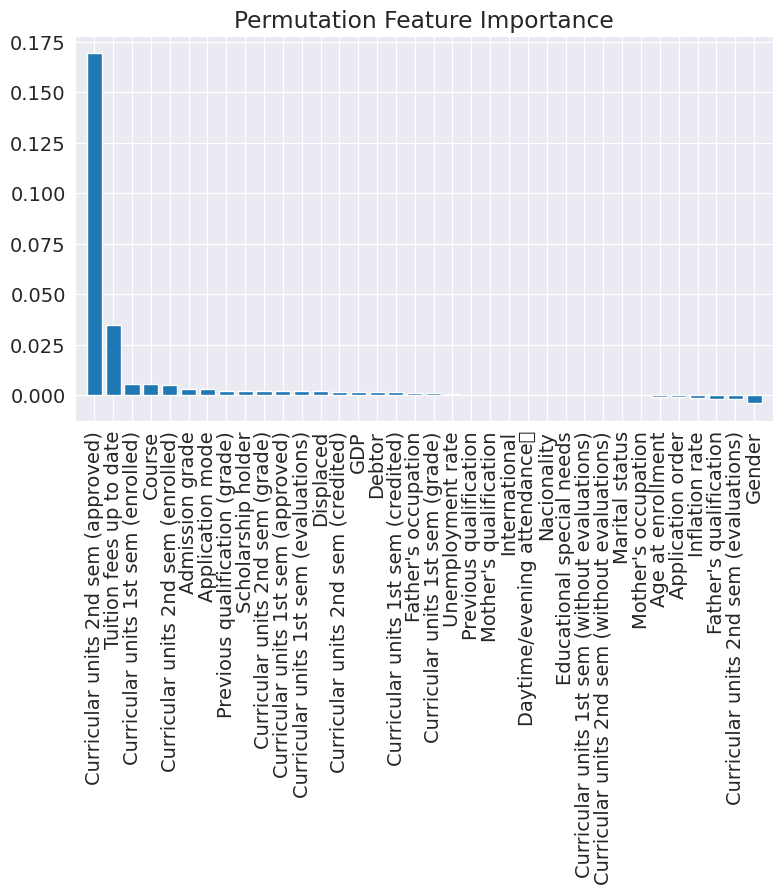

In [ ]:
# Feature importance using Permutation Feature Importance

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X = df.drop('Target_Encoded', axis=1)
y = df['Target_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Perform Permutation Feature Importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[indices[i]], importances[indices[i]]))

# Plot feature importances
plt.figure()
plt.title("Permutation Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


Feature ranking:
1. Curricular units 2nd sem (approved) (0.235950)
2. Tuition fees up to date (0.029063)
3. Curricular units 1st sem (approved) (0.016804)
4. Curricular units 1st sem (enrolled) (0.005234)
5. Course (0.004821)
6. Debtor (0.003857)
7. Curricular units 1st sem (evaluations) (0.002893)
8. Scholarship holder (0.002755)
9. Father's qualification (0.002479)
10. Application mode (0.002066)
11. Curricular units 1st sem (credited) (0.001791)
12. Curricular units 2nd sem (grade) (0.001653)
13. GDP (0.001515)
14. Nacionality (0.001377)
15. Curricular units 1st sem (grade) (0.001102)
16. Previous qualification (grade) (0.000826)
17. Mother's qualification (0.000413)
18. International (0.000000)
19. Educational special needs (0.000000)
20. Daytime/evening attendance	 (-0.000138)
21. Previous qualification (-0.000275)
22. Curricular units 2nd sem (credited) (-0.000275)
23. Admission grade (-0.000551)
24. Curricular units 2nd sem (without evaluations) (-0.000689)
25. Curricular units 

<ipython-input-34-4c3b04c45d80>:29: UserWarning:

Glyph 9 (	) missing from current font.

<ipython-input-34-4c3b04c45d80>:29: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



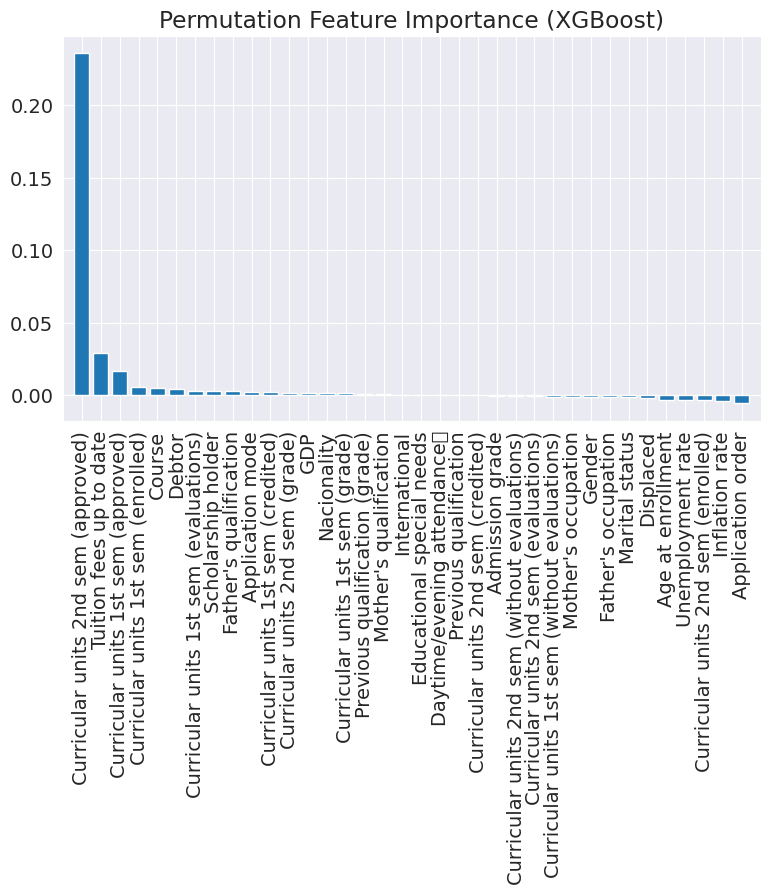

In [ ]:
# Permutation Feature Importance using xgboost

import xgboost as xgb

# Train an XGBoost Classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Perform Permutation Feature Importance
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[indices[i]], importances[indices[i]]))

# Plot feature importances
plt.figure()
plt.title("Permutation Feature Importance (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
# Create a new dataframe with the Permutated important features

important_features_df = df[[
"Admission grade",
"Age at enrollment",
"Application mode",
"Course",
"Curricular units 1st sem (approved)",
"Curricular units 1st sem (credited)",
"Curricular units 1st sem (enrolled)",
"Curricular units 1st sem (evaluations)",
"Curricular units 1st sem (grade)",
"Curricular units 1st sem (without evaluations)",
"Curricular units 2nd sem (approved)",
"Debtor",
"Father's occupation",
"Father's qualification",
"GDP",
"Mother's occupation",
"Mother's qualification",
"Nacionality",
"Previous qualification (grade)",
"Scholarship holder",
"Tuition fees up to date",
"Target_Encoded"
]]

important_features_df.head()


Admission grade  Age at enrollment  Application mode    Course  \
0         0.000415          -0.442212         -0.081917 -4.197769   
1         1.040849          -0.569976         -0.197149  0.193388   
2        -0.170709          -0.569976         -1.003777  0.104434   
3        -0.526647          -0.442212         -0.081917  0.444298   
4         0.972400           2.751894          1.185642 -0.406087   

   Curricular units 1st sem (approved)  Curricular units 1st sem (credited)  \
0                            -1.480034                            -0.304517   
1                             0.373306                            -0.304517   
2                            -1.480034                            -0.304517   
3                             0.373306                            -0.304517   
4                             0.064416                            -0.304517   

   Curricular units 1st sem (enrolled)  \
0                            -2.465538   
1                            -0.131288   
2                            -0.131288   
3                            -0.131288   
4                            -0.131288   

   Curricular units 1st sem (evaluations)  Curricular units 1st sem (grade)  \
0                               -1.883107                         -2.083224   
1                               -0.483214                          0.685217   
2                               -1.883107                         -2.083224   
3                               -0.016583                          0.572219   
4                                0.216733                          0.355641   

   Curricular units 1st sem (without evaluations)  ...  Father's occupation  \
0                                       -0.189871  ...            -0.057274   
1                                       -0.189871  ...            -0.325136   
2                                       -0.189871  ...            -0.057274   
3                                       -0.189871  ...            -0.325136   
4                                       -0.189871  ...            -0.057274   

   Father's qualification       GDP  Mother's occupation  \
0               -0.692162  0.774119            -0.220421   
1               -1.281423  0.353704            -0.306212   
2                0.944677  0.774119            -0.048839   
3                0.944677 -1.376634            -0.220421   
4                1.010150  0.353704            -0.048839   

   Mother's qualification  Nacionality  Previous qualification (grade)  \
0               -0.063288    -0.124214                       -0.825034   
1               -1.218383    -0.124214                        2.045805   
2                1.091807    -0.124214                       -0.825034   
3                1.155979    -0.124214                       -0.825034   
4                1.091807    -0.124214                       -2.487099   

   Scholarship holder  Tuition fees up to date  Target_Encoded  
0           -0.603447                 0.393167               1  
1           -0.603447                -2.543450               0  
2           -0.603447                -2.543450               1  
3           -0.603447                 0.393167               0  
4           -0.603447                 0.393167               0  

[5 rows x 22 columns]

In [ ]:
# class balancing target column using SMOTE

from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = important_features_df.drop('Target_Encoded', axis=1)
y = important_features_df['Target_Encoded']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Target_Encoded'] = y_resampled

balanced_df.head()


Admission grade  Age at enrollment  Application mode    Course  \
0         0.000415          -0.442212         -0.081917 -4.197769   
1         1.040849          -0.569976         -0.197149  0.193388   
2        -0.170709          -0.569976         -1.003777  0.104434   
3        -0.526647          -0.442212         -0.081917  0.444298   
4         0.972400           2.751894          1.185642 -0.406087   

   Curricular units 1st sem (approved)  Curricular units 1st sem (credited)  \
0                            -1.480034                            -0.304517   
1                             0.373306                            -0.304517   
2                            -1.480034                            -0.304517   
3                             0.373306                            -0.304517   
4                             0.064416                            -0.304517   

   Curricular units 1st sem (enrolled)  \
0                            -2.465538   
1                            -0.131288   
2                            -0.131288   
3                            -0.131288   
4                            -0.131288   

   Curricular units 1st sem (evaluations)  Curricular units 1st sem (grade)  \
0                               -1.883107                         -2.083224   
1                               -0.483214                          0.685217   
2                               -1.883107                         -2.083224   
3                               -0.016583                          0.572219   
4                                0.216733                          0.355641   

   Curricular units 1st sem (without evaluations)  ...  Father's occupation  \
0                                       -0.189871  ...            -0.057274   
1                                       -0.189871  ...            -0.325136   
2                                       -0.189871  ...            -0.057274   
3                                       -0.189871  ...            -0.325136   
4                                       -0.189871  ...            -0.057274   

   Father's qualification       GDP  Mother's occupation  \
0               -0.692162  0.774119            -0.220421   
1               -1.281423  0.353704            -0.306212   
2                0.944677  0.774119            -0.048839   
3                0.944677 -1.376634            -0.220421   
4                1.010150  0.353704            -0.048839   

   Mother's qualification  Nacionality  Previous qualification (grade)  \
0               -0.063288    -0.124214                       -0.825034   
1               -1.218383    -0.124214                        2.045805   
2                1.091807    -0.124214                       -0.825034   
3                1.155979    -0.124214                       -0.825034   
4                1.091807    -0.124214                       -2.487099   

   Scholarship holder  Tuition fees up to date  Target_Encoded  
0           -0.603447                 0.393167               1  
1           -0.603447                -2.543450               0  
2           -0.603447                -2.543450               1  
3           -0.603447                 0.393167               0  
4           -0.603447                 0.393167               0  

[5 rows x 22 columns]

In [ ]:
# Verifying if data was balanced
balanced_df.Target_Encoded.value_counts()

Target_Encoded
1    2209
0    2209
Name: count, dtype: int64

### Findings:
*   Number of dropout has been balanced to match number of Graduate class




In [ ]:
# prompt: Build a hybrid model with Random Forest and XGboost as base model and a voting classifier to merge their predictions using hard voting

from sklearn.ensemble import VotingClassifier

# Split the balanced data into training and testing sets
X = balanced_df.drop('Target_Encoded', axis=1)
y = balanced_df['Target_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
rf = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()

# Create a VotingClassifier with hard voting
hybrid_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb_model)], voting='hard')

# Fit the hybrid model
hybrid_model.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [ ]:
# Hybrid Model with hyperparameter tunning for the base model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_
print("Best parameters for Random Forest:", best_rf_params)

# Initialize Random Forest with best parameters
rf_best = RandomForestClassifier(**best_rf_params)


# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters for XGBoost
best_xgb_params = xgb_grid_search.best_params_
print("Best parameters for XGBoost:", best_xgb_params)

# Initialize XGBoost with best parameters
xgb_best = xgb.XGBClassifier(**best_xgb_params)

# Create a VotingClassifier with hard voting and best models
hybrid_model = VotingClassifier(estimators=[('rf', rf_best), ('xgb', xgb_best)], voting='hard')

# Fit the hybrid model
hybrid_model.fit(X_train, y_train)


Best parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


VotingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=15)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [ ]:
# prompt: Show the weights for each feature in the hybrid model and the mathematical formula for each base model

# Access individual models within the VotingClassifier
rf_model = hybrid_model.estimators_[0]
xgb_model = hybrid_model.estimators_[1]

# Get feature importances for Random Forest
rf_importances = rf_model.feature_importances_
print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, rf_importances):
  print(f"{feature}: {importance}")

# Get feature importances for XGBoost
xgb_importances = xgb_model.feature_importances_
print("\nXGBoost Feature Importances:")
for feature, importance in zip(X.columns, xgb_importances):
  print(f"{feature}: {importance}")

# Mathematical formula for Random Forest
print("\nMathematical Formula for Random Forest:")
print("Prediction = Majority vote of individual decision trees")

# Mathematical formula for XGBoost
print("\nMathematical Formula for XGBoost:")
print("Prediction = Sum of weighted decision trees (boosting)")


Random Forest Feature Importances:
Admission grade: 0.03589046553888443
Age at enrollment: 0.04211304778771967
Application mode: 0.02834321136977315
Course: 0.03476110878917573
Curricular units 1st sem (approved): 0.18089907149175832
Curricular units 1st sem (credited): 0.009991776301944914
Curricular units 1st sem (enrolled): 0.029897639260825507
Curricular units 1st sem (evaluations): 0.032733505361417184
Curricular units 1st sem (grade): 0.08208125747829646
Curricular units 1st sem (without evaluations): 0.00472315782940284
Curricular units 2nd sem (approved): 0.29646515100753346
Debtor: 0.012947683973285938
Father's occupation: 0.02088503202231713
Father's qualification: 0.018212676629247554
GDP: 0.022410495553912998
Mother's occupation: 0.018441310141663916
Mother's qualification: 0.016548242855290468
Nacionality: 0.001654722503339182
Previous qualification (grade): 0.02875164903053706
Scholarship holder: 0.023359625712863652
Tuition fees up to date: 0.058889169360810525

XGBoost 

<ipython-input-44-956b82a7a924>:9: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



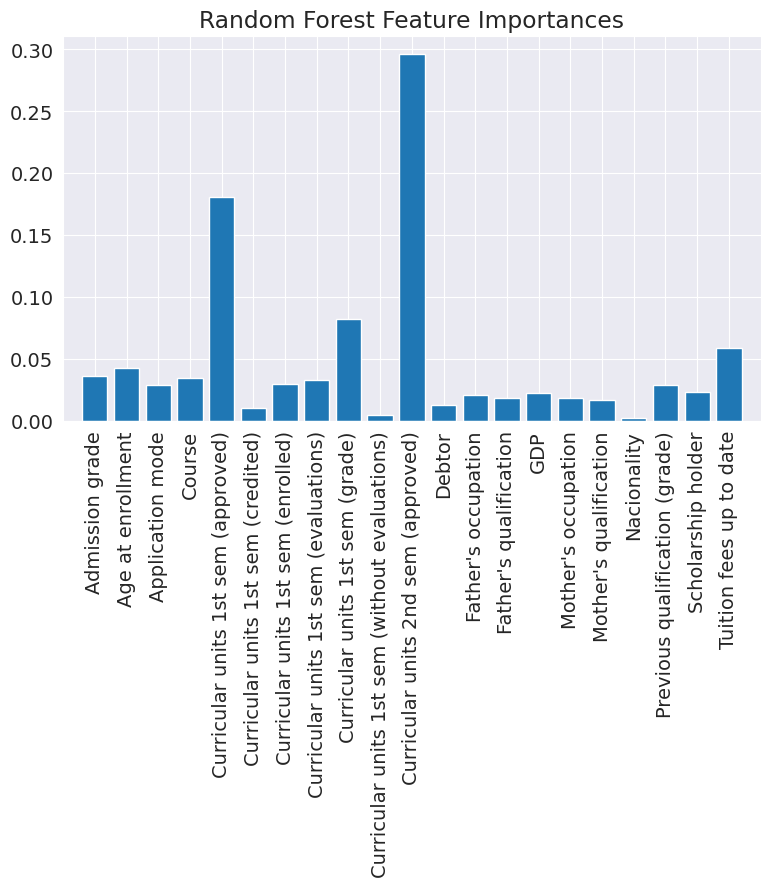

<ipython-input-44-956b82a7a924>:18: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



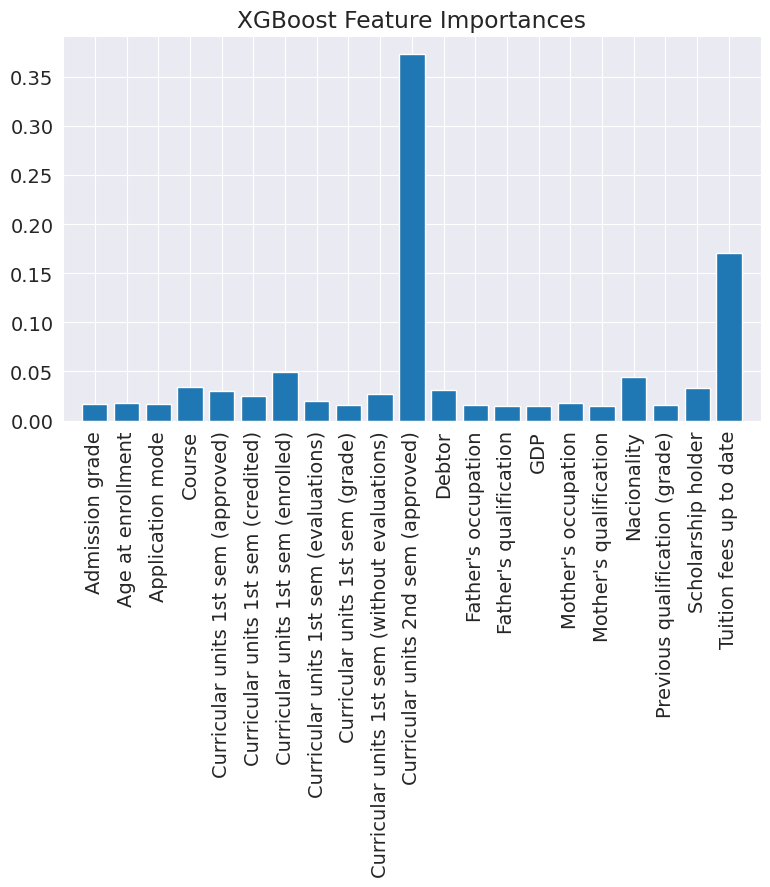

In [ ]:
# prompt: Visualize the weights for each feature in the hybrid model and the mathematical formula for each base model

# Plot feature importances for Random Forest
plt.figure()
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), rf_importances, align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Plot feature importances for XGBoost
plt.figure()
plt.title("XGBoost Feature Importances")
plt.bar(range(X.shape[1]), xgb_importances, align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model using: a Confusion Matrix, Accuracy, Precision, Recall, F1 Score, and Area Under the ROC Curve (AUC-ROC).

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = hybrid_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# AUC-ROC
#y_pred_proba = hybrid_model.predict_proba(X_test)[:, 1]
#auc_roc = roc_auc_score(y_test, y_pred_proba)
#print("AUC-ROC:", auc_roc)


Confusion Matrix:
 [[451  13]
 [ 54 366]]
Accuracy: 0.9242081447963801
Precision: 0.9656992084432717
Recall: 0.8714285714285714
F1 Score: 0.916145181476846
